# Summarize recorded interactions

In [1]:
# Import some useful modules
import json
import sys
import networkx
import pandas
import numpy

import matplotlib.pyplot as plotter
from pathlib import Path
from IPython.display import display, HTML

Specify the RESULTS_DIR used for recording interactions

In [2]:
# USE ABSOLUTE PATHS HERE!!!
DATA_DIR = Path("/home/ashinde/PhD/CaffineBravery/results/results_l3_control/")
DATA_FILES = list(DATA_DIR.iterdir())

for _file in DATA_FILES:
    print(f"Using {_file}")

Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/973843173_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/769132147_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/790094605_defl1_active_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/1048712791_defl1_passive_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/1909398279_attl2_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/426019904_defl3_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.0.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.1.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.2.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.3.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.4.json
Using 

In [3]:
# Common utility function for reading JSON from a file
def load_json(fname):

    data = None

    with open(fname) as f:
        data = json.load(f)

    return data

---
Take a look at the policy graphs of the agents

In [4]:
# Draw policy graphs
import graphviz


def get_edge_map(edges):
    start = 0
    edge_map = {}
    multi_edge_map = {}
    
    for src, children in edges.items():
        for obs, child in children.items():
            
            # index this observation if not already done
            if obs not in edge_map.keys():
                edge_map[obs] = start
                start += 1
                
            # Add obs to (src, dst) key
            if (src, child) not in multi_edge_map.keys():
                multi_edge_map[(src, child)] = [edge_map[obs]]
            
            else:
                _l = multi_edge_map[(src, child)]
                _l.append(edge_map[obs])
                multi_edge_map[(src, child)] = _l
                
    return edge_map, multi_edge_map


def get_graphviz_graph(json_data):
    
    # initialize empty graph
    G = graphviz.Digraph()
    
    nodes = json_data["nodes"]
    edges = json_data["edges"]
    
    edge_map, multi_edge_map = get_edge_map(edges)
    print(f"Edge map is:")
    for e, i in edge_map.items():
        print(f"{i}:{e}")

    for k, v in nodes.items():
        l = v["act"] + "_start" if "start" in v.keys() else v["act"]
        G.node(k, label=l, fontsize="12")
        
    for s, t in multi_edge_map.keys():
        G.edge(s, t, label=str(multi_edge_map[(s, t)]))
        
    return G

---
## Plot policy graphs

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_control/973843173_attl0_pol_graph.json
Edge map is:
0:[(HostObs, none), (ActionResult, failure)]
1:[(HostObs, none), (ActionResult, success)]
2:[(HostObs, user_files), (ActionResult, failure)]
3:[(HostObs, user_files), (ActionResult, success)]


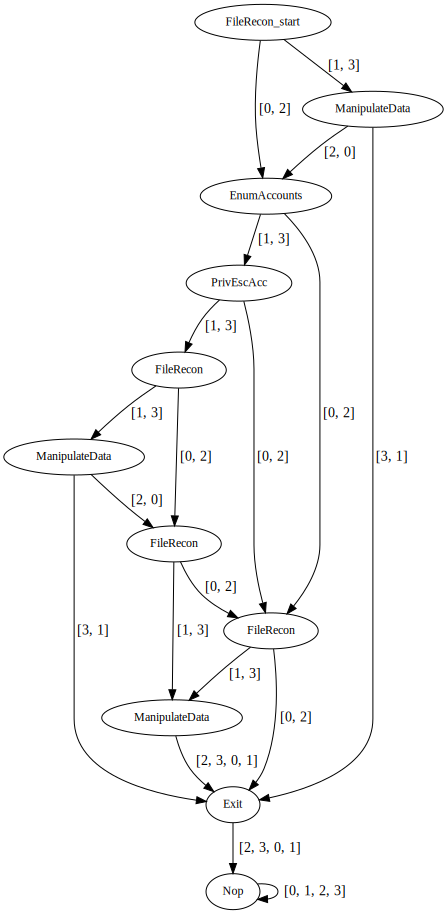

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_control/769132147_attl0_pol_graph.json
Edge map is:
0:[(HostObs, user_files), (ActionResult, failure)]
1:[(HostObs, user_files), (ActionResult, success)]
2:[(HostObs, none), (ActionResult, failure)]
3:[(HostObs, none), (ActionResult, success)]


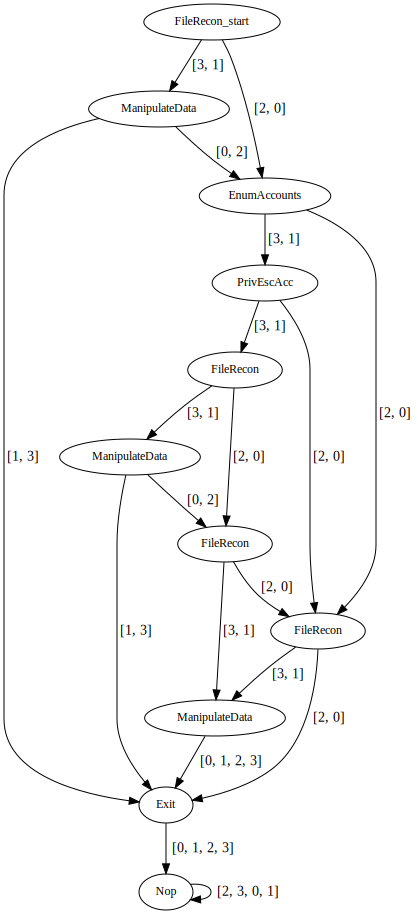

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_control/790094605_defl1_active_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, login_activity)]
3:[(EndPtAlerts, none)]


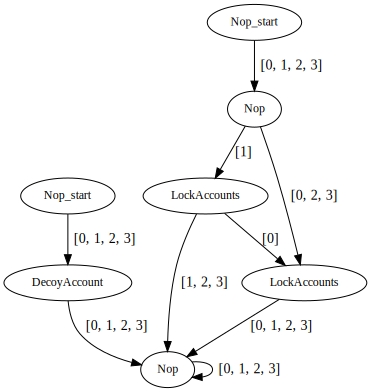

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_control/1048712791_defl1_passive_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, login_activity)]
3:[(EndPtAlerts, none)]


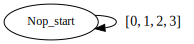

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_control/1909398279_attl2_pol_graph.json
Edge map is:
0:[(HostObs, user_files), (ActionResult, failure)]
1:[(HostObs, user_files), (ActionResult, success)]
2:[(HostObs, none), (ActionResult, failure)]
3:[(HostObs, none), (ActionResult, success)]


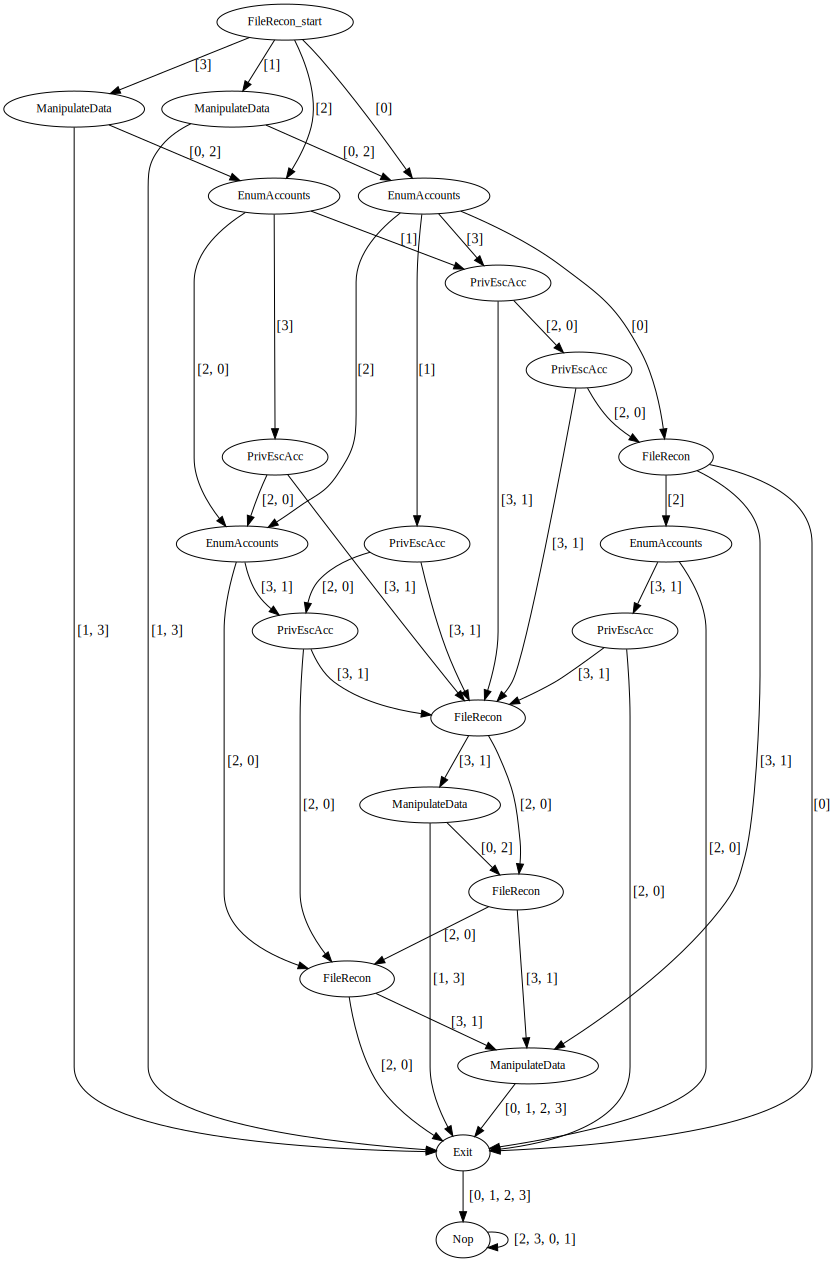

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_control/426019904_defl3_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, login_activity)]
3:[(EndPtAlerts, none)]


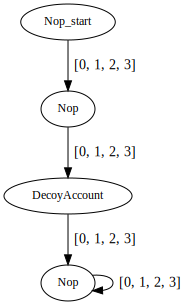

In [5]:
GRAPH_FILES = list(filter(lambda x: "pol_graph" in x.parts[-1], DATA_FILES))

for g in GRAPH_FILES:
    print(f"Displaying {g}")
    data = load_json(g)
    G = get_graphviz_graph(data)
    display(G)

---
Summarize the actual interactions

In [6]:
# Get the trace files
TRACE_FILES = list(filter(lambda x: "trace" in x.parts[-1], DATA_FILES))

for _file in TRACE_FILES:
    print(f"Using trace from {_file}")


Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.0.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.1.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.2.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.3.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.4.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.5.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.6.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.7.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.8.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.9.json


+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                             none
2                               1.0                        file_enum
3                               1.0                   login_activity
4                               1.0                        file_enum
5                               1.0                        file_enum
6                               1.0                       file_write
7                               1.0                             none
8                               1.0                             none
9                               1.0                        file_enum

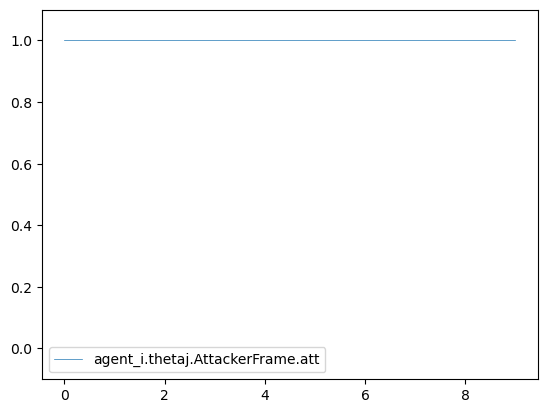

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.436364                        0.563636   
3                         0.532045                        0.467955   
4                         0.555721                        0.444279   
5                         0.594251                        0.405749   
6                         0.555731                        0.444269   
7                         0.555745                        0.444255   
8                         0.555745                        0.444255   
9                         0.555745                        0.444255   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                   user_files                           failure  
1                         none                           failure  
2                   user_files                           success  
3                   user_files                           success  
4                         none                           failure  
5                   user_files                           success  
6                         none                           success  
7                   user_files                           failure  
8                         none                           success  
9                         none                           failure

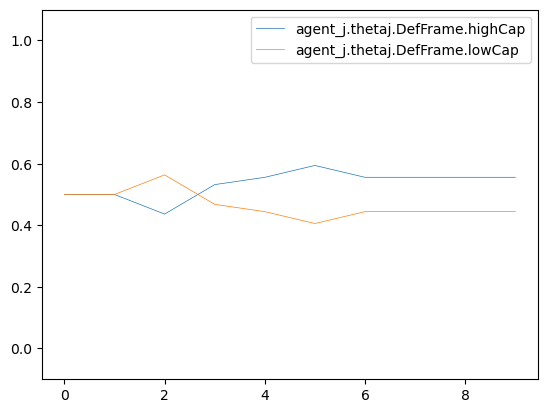

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action  agent_j.action
0                 1.0                  0.0            Nop       FileRecon
1                 1.0                  0.0            Nop    EnumAccounts
2                 1.0                  0.0   DecoyAccount    EnumAccounts
3                 1.0                  0.0            Nop      PrivEscAcc
4                 1.0                  0.0            Nop       FileRecon
5                 1.0                  0.0            Nop       FileRecon
6                 0.0                  1.0            Nop  ManipulateData
7                 0.0                  1.0            Nop            Exit
8                 0.0                  1.0            Nop             Nop
9                 0.0                  1.0            Nop             Nop

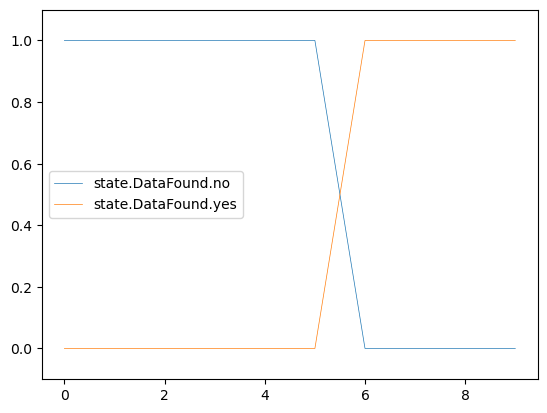

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action  agent_j.action  \
0              1.000000               0.000000            Nop       FileRecon   
1              1.000000               0.000000            Nop    EnumAccounts   
2              1.000000               0.000000   DecoyAccount    EnumAccounts   
3              1.000000               0.000000            Nop      PrivEscAcc   
4              1.000000               0.000000            Nop       FileRecon   
5              0.348685               0.651315            Nop       FileRecon   
6              0.227283               0.772717            Nop  ManipulateData   
7              0.051476               0.948524            Nop            Exit   
8              0.049206               0.950794            Nop             Nop   
9              0.049111               0.950889            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                             none  
2                        file_enum  
3                   login_activity  
4                        file_enum  
5                        file_enum  
6                       file_write  
7                             none  
8                             none  
9                        file_enum

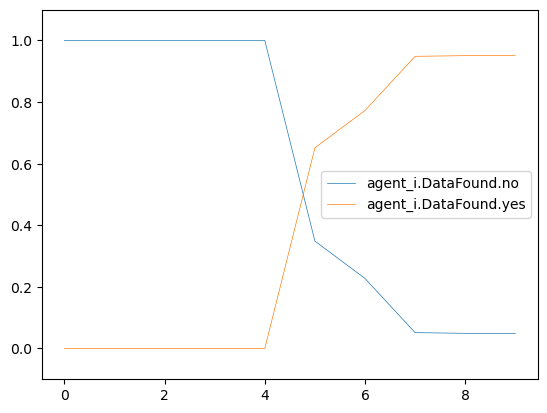

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action agent_i.action  \
0              1.000000               0.000000       FileRecon            Nop   
1              0.976974               0.023026    EnumAccounts            Nop   
2              0.976974               0.023026    EnumAccounts   DecoyAccount   
3              0.976974               0.023026      PrivEscAcc            Nop   
4              0.976974               0.023026       FileRecon            Nop   
5              0.956106               0.043894       FileRecon            Nop   
6              0.380731               0.619269  ManipulateData            Nop   
7              0.000615               0.999385            Exit            Nop   
8              0.000615               0.999385             Nop            Nop   
9              0.000615               0.999385             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                   user_files                           failure  
1                         none                           failure  
2                   user_files                           success  
3                   user_files                           success  
4                         none                           failure  
5                   user_files                           success  
6                         none                           success  
7                   user_files                           failure  
8                         none                           success  
9                         none                           failure

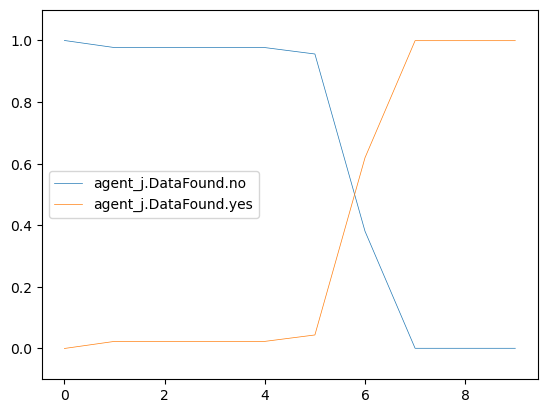

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action  \
0                    1.0                     0.0            Nop   
1                    1.0                     0.0            Nop   
2                    1.0                     0.0   DecoyAccount   
3                    1.0                     0.0            Nop   
4                    1.0                     0.0            Nop   
5                    1.0                     0.0            Nop   
6                    1.0                     0.0            Nop   
7                    0.0                     1.0            Nop   
8                    0.0                     1.0            Nop   
9                    0.0                     1.0            Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2    EnumAccounts  
3      PrivEscAcc  
4       FileRecon  
5       FileRecon  
6  ManipulateData  
7            Exit  
8             Nop  
9             Nop

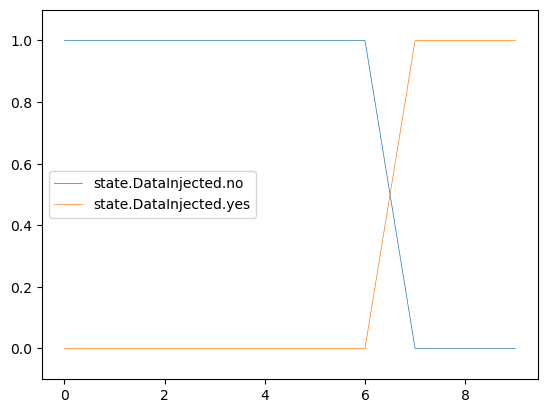

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                 1.000000                  0.000000            Nop   
1                 1.000000                  0.000000            Nop   
2                 1.000000                  0.000000   DecoyAccount   
3                 1.000000                  0.000000            Nop   
4                 1.000000                  0.000000            Nop   
5                 1.000000                  0.000000            Nop   
6                 0.801446                  0.198554            Nop   
7                 0.093724                  0.906276            Nop   
8                 0.053740                  0.946260            Nop   
9                 0.053322                  0.946678            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                             none  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                   login_activity  
4       FileRecon                        file_enum  
5       FileRecon                        file_enum  
6  ManipulateData                       file_write  
7            Exit                             none  
8             Nop                             none  
9             Nop                        file_enum

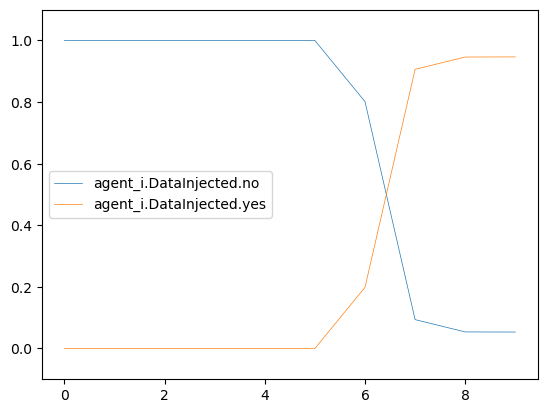

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000    EnumAccounts   
2                 1.000000                  0.000000    EnumAccounts   
3                 1.000000                  0.000000      PrivEscAcc   
4                 1.000000                  0.000000       FileRecon   
5                 1.000000                  0.000000       FileRecon   
6                 1.000000                  0.000000  ManipulateData   
7                 0.000615                  0.999385            Exit   
8                 0.000615                  0.999385             Nop   
9                 0.000615                  0.999385             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1            Nop                         none   
2   DecoyAccount                   user_files   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           success  
3                           success  
4                           failure  
5                           success  
6                           success  
7                           failure  
8                           success  
9                           failure

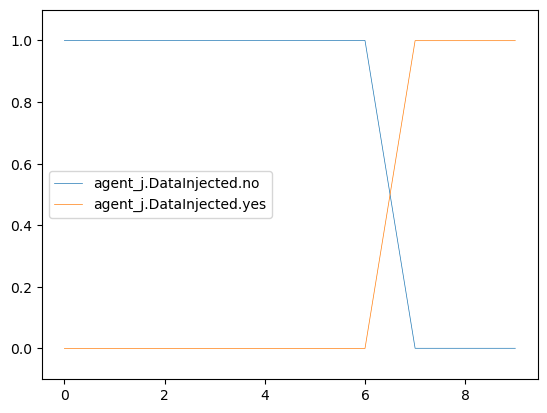

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0            Nop   
1                     0.0                     1.0            Nop   
2                     0.0                     1.0   DecoyAccount   
3                     0.0                     1.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2    EnumAccounts  
3      PrivEscAcc  
4       FileRecon  
5       FileRecon  
6  ManipulateData  
7            Exit  
8             Nop  
9             Nop

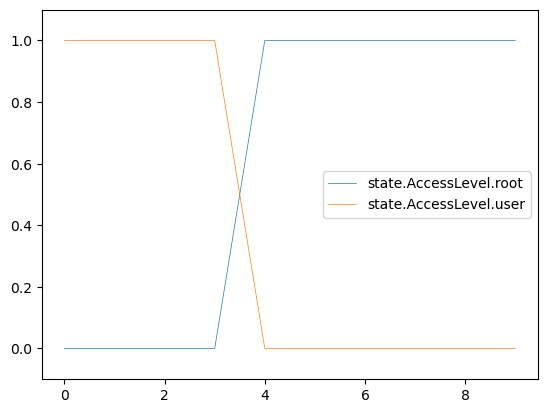

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                  0.000000                  1.000000            Nop   
1                  0.000000                  1.000000            Nop   
2                  0.000000                  1.000000   DecoyAccount   
3                  0.000000                  1.000000            Nop   
4                  0.863109                  0.136890            Nop   
5                  0.932461                  0.067539            Nop   
6                  0.962865                  0.037135            Nop   
7                  0.992849                  0.007151            Nop   
8                  0.992658                  0.007342            Nop   
9                  0.992655                  0.007345            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                             none  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                   login_activity  
4       FileRecon                        file_enum  
5       FileRecon                        file_enum  
6  ManipulateData                       file_write  
7            Exit                             none  
8             Nop                             none  
9             Nop                        file_enum

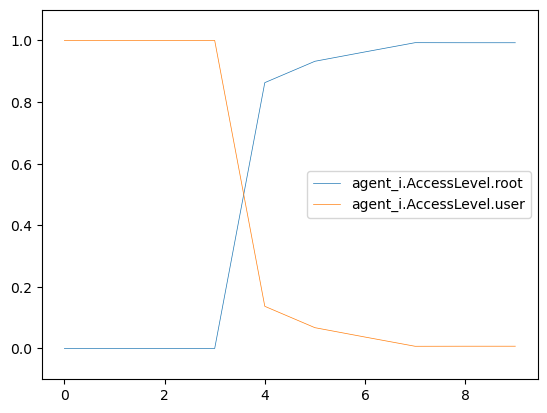

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000                  1.000000       FileRecon   
1                  0.000000                  1.000000    EnumAccounts   
2                  0.000000                  1.000000    EnumAccounts   
3                  0.000000                  1.000000      PrivEscAcc   
4                  0.999651                  0.000349       FileRecon   
5                  0.999645                  0.000355       FileRecon   
6                  0.999756                  0.000244  ManipulateData   
7                  0.999913                  0.000087            Exit   
8                  0.999913                  0.000087             Nop   
9                  0.999913                  0.000087             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1            Nop                         none   
2   DecoyAccount                   user_files   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           success  
3                           success  
4                           failure  
5                           success  
6                           success  
7                           failure  
8                           success  
9                           failure

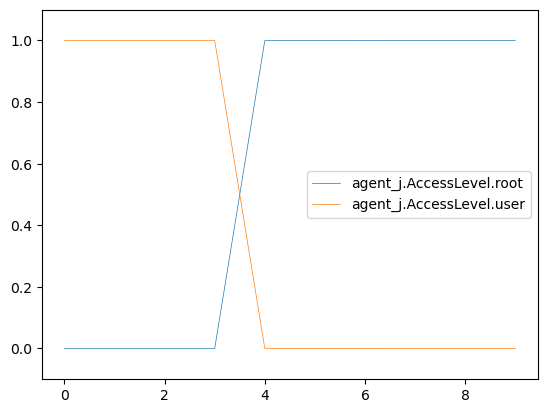

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action  agent_j.action
0                 0.0                  1.0            Nop       FileRecon
1                 0.0                  1.0            Nop    EnumAccounts
2                 0.0                  1.0   DecoyAccount    EnumAccounts
3                 0.0                  1.0            Nop      PrivEscAcc
4                 0.0                  1.0            Nop       FileRecon
5                 0.0                  1.0            Nop       FileRecon
6                 0.0                  1.0            Nop  ManipulateData
7                 0.0                  1.0            Nop            Exit
8                 1.0                  0.0            Nop             Nop
9                 1.0                  0.0            Nop             Nop

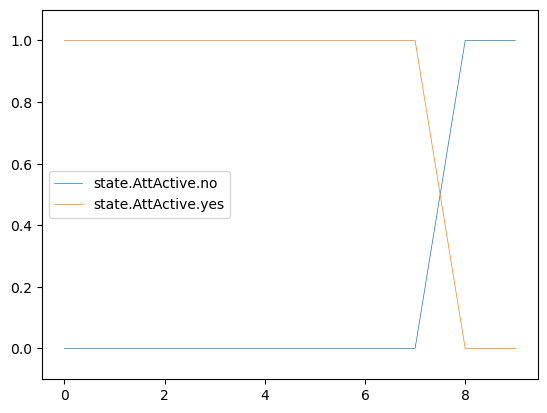

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action  agent_j.action  \
0              0.000000               1.000000            Nop       FileRecon   
1              0.000000               1.000000            Nop    EnumAccounts   
2              0.000000               1.000000   DecoyAccount    EnumAccounts   
3              0.000015               0.999984            Nop      PrivEscAcc   
4              0.004606               0.995394            Nop       FileRecon   
5              0.009687               0.990313            Nop       FileRecon   
6              0.017980               0.982020            Nop  ManipulateData   
7              0.053513               0.946487            Nop            Exit   
8              0.993675               0.006325            Nop             Nop   
9              0.999934               0.000066            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                             none  
2                        file_enum  
3                   login_activity  
4                        file_enum  
5                        file_enum  
6                       file_write  
7                             none  
8                             none  
9                        file_enum

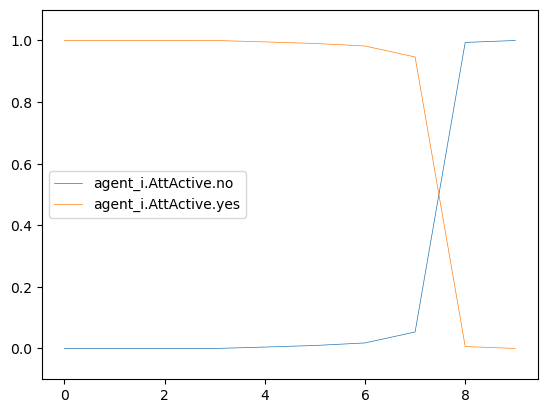

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action agent_i.action  \
0                   0.0                    1.0       FileRecon            Nop   
1                   0.0                    1.0    EnumAccounts            Nop   
2                   0.0                    1.0    EnumAccounts   DecoyAccount   
3                   0.0                    1.0      PrivEscAcc            Nop   
4                   0.0                    1.0       FileRecon            Nop   
5                   0.0                    1.0       FileRecon            Nop   
6                   0.0                    1.0  ManipulateData            Nop   
7                   0.0                    1.0            Exit            Nop   
8                   1.0                    0.0             Nop            Nop   
9                   1.0                    0.0             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                   user_files                           failure  
1                         none                           failure  
2                   user_files                           success  
3                   user_files                           success  
4                         none                           failure  
5                   user_files                           success  
6                         none                           success  
7                   user_files                           failure  
8                         none                           success  
9                         none                           failure

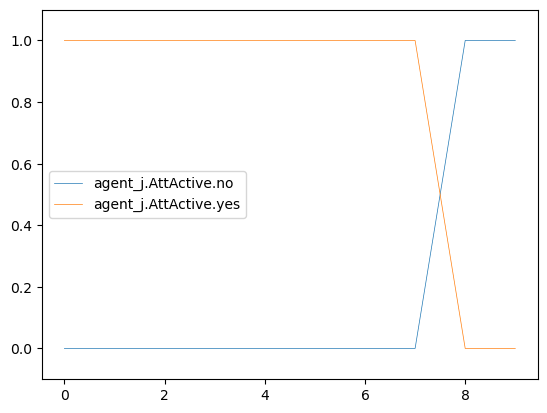

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action  agent_j.action  
0                      1.0            Nop       FileRecon  
1                      1.0            Nop    EnumAccounts  
2                      1.0   DecoyAccount    EnumAccounts  
3                      1.0            Nop      PrivEscAcc  
4                      1.0            Nop       FileRecon  
5                      1.0            Nop       FileRecon  
6                      1.0            Nop  ManipulateData  
7                      1.0            Nop            Exit  
8                      1.0            Nop             Nop  
9                      1.0            Nop             Nop

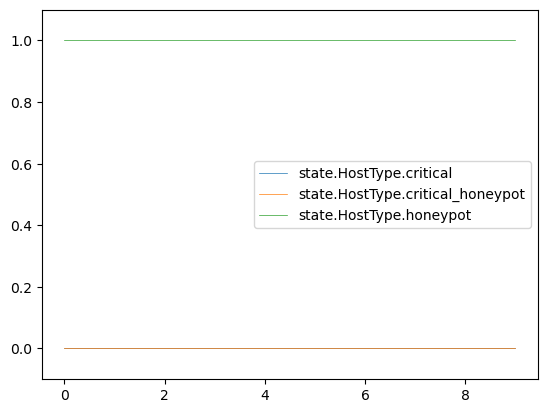

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action  agent_j.action  \
0                        1.0            Nop       FileRecon   
1                        1.0            Nop    EnumAccounts   
2                        1.0   DecoyAccount    EnumAccounts   
3                        1.0            Nop      PrivEscAcc   
4                        1.0            Nop       FileRecon   
5                        1.0            Nop       FileRecon   
6                        1.0            Nop  ManipulateData   
7                        1.0            Nop            Exit   
8                        1.0            Nop             Nop   
9                        1.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                             none  
2                        file_enum  
3                   login_activity  
4                        file_enum  
5                        file_enum  
6                       file_write  
7                             none  
8                             none  
9                        file_enum

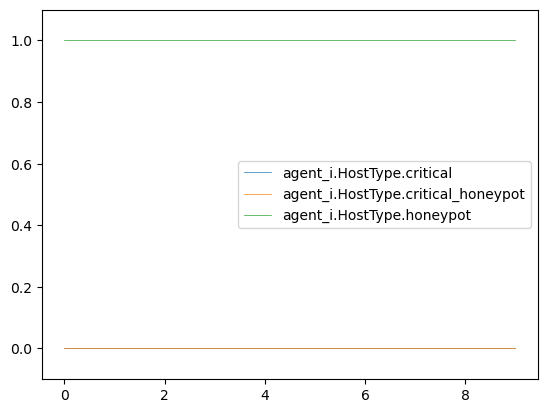

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                   0.500000                                 0.0   
1                   0.700000                                 0.0   
2                   0.563636                                 0.0   
3                   0.655137                                 0.0   
4                   0.600252                                 0.0   
5                   0.391573                                 0.0   
6                   0.600229                                 0.0   
7                   0.600196                                 0.0   
8                   0.600196                                 0.0   
9                   0.600196                                 0.0   

   agent_j.HostType.honeypot  agent_j.action agent_i.action  \
0                   0.500000       FileRecon            Nop   
1                   0.300000    EnumAccounts            Nop   
2                   0.436364    EnumAccounts   DecoyAccount   
3                   0.344863      PrivEscAcc            Nop   
4                   0.399748       FileRecon            Nop   
5                   0.608427       FileRecon            Nop   
6                   0.399770  ManipulateData            Nop   
7                   0.399804            Exit            Nop   
8                   0.399804             Nop            Nop   
9                   0.399804             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                   user_files                           failure  
1                         none                           failure  
2                   user_files                           success  
3                   user_files                           success  
4                         none                           failure  
5                   user_files                           success  
6                         none                           success  
7                   user_files                           failure  
8                         none                           success  
9                         none                           failure

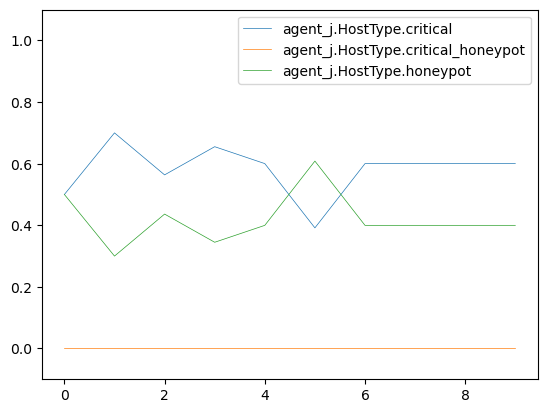

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action  agent_j.action
0                1.0                 0.0            Nop       FileRecon
1                1.0                 0.0            Nop    EnumAccounts
2                1.0                 0.0   DecoyAccount    EnumAccounts
3                0.0                 1.0            Nop      PrivEscAcc
4                0.0                 1.0            Nop       FileRecon
5                0.0                 1.0            Nop       FileRecon
6                0.0                 1.0            Nop  ManipulateData
7                0.0                 1.0            Nop            Exit
8                0.0                 1.0            Nop             Nop
9                0.0                 1.0            Nop             Nop

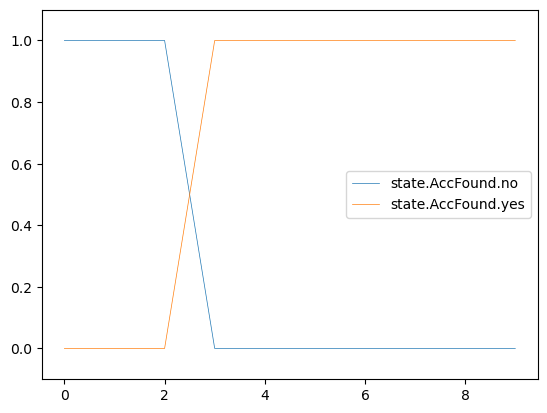

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action  agent_j.action  \
0             1.000000              0.000000            Nop       FileRecon   
1             1.000000              0.000000            Nop    EnumAccounts   
2             1.000000              0.000000   DecoyAccount    EnumAccounts   
3             0.365065              0.634935            Nop      PrivEscAcc   
4             0.110625              0.889375            Nop       FileRecon   
5             0.062670              0.937330            Nop       FileRecon   
6             0.025839              0.974162            Nop  ManipulateData   
7             0.006454              0.993546            Nop            Exit   
8             0.006692              0.993308            Nop             Nop   
9             0.006695              0.993305            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                             none  
2                        file_enum  
3                   login_activity  
4                        file_enum  
5                        file_enum  
6                       file_write  
7                             none  
8                             none  
9                        file_enum

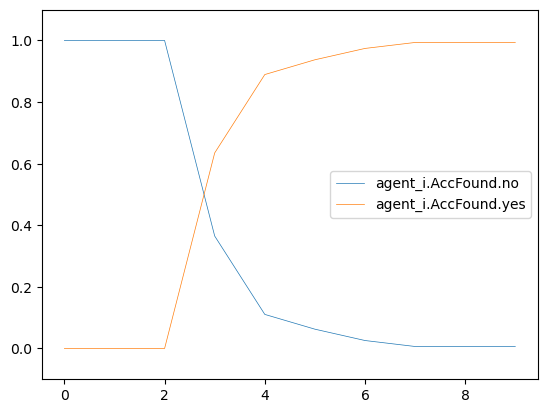

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action agent_i.action  \
0             1.000000              0.000000       FileRecon            Nop   
1             1.000000              0.000000    EnumAccounts            Nop   
2             0.920455              0.079545    EnumAccounts   DecoyAccount   
3             0.242497              0.757503      PrivEscAcc            Nop   
4             0.000327              0.999673       FileRecon            Nop   
5             0.000338              0.999662       FileRecon            Nop   
6             0.000228              0.999772  ManipulateData            Nop   
7             0.000081              0.999918            Exit            Nop   
8             0.000081              0.999919             Nop            Nop   
9             0.000081              0.999919             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                   user_files                           failure  
1                         none                           failure  
2                   user_files                           success  
3                   user_files                           success  
4                         none                           failure  
5                   user_files                           success  
6                         none                           success  
7                   user_files                           failure  
8                         none                           success  
9                         none                           failure

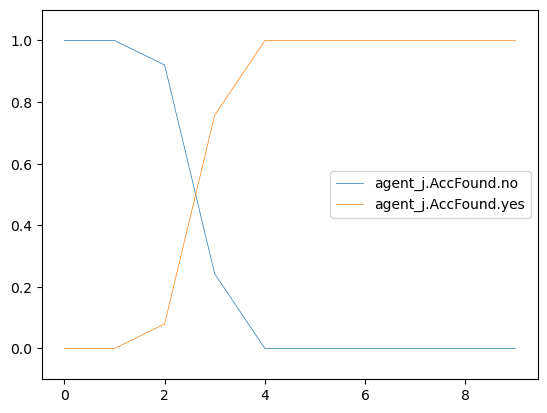

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action  agent_j.action
0                   1.0                    0.0            Nop       FileRecon
1                   1.0                    0.0            Nop    EnumAccounts
2                   1.0                    0.0   DecoyAccount    EnumAccounts
3                   0.0                    1.0            Nop      PrivEscAcc
4                   0.0                    1.0            Nop       FileRecon
5                   0.0                    1.0            Nop       FileRecon
6                   0.0                    1.0            Nop  ManipulateData
7                   0.0                    1.0            Nop            Exit
8                   0.0                    1.0            Nop             Nop
9                   0.0                    1.0            Nop             Nop

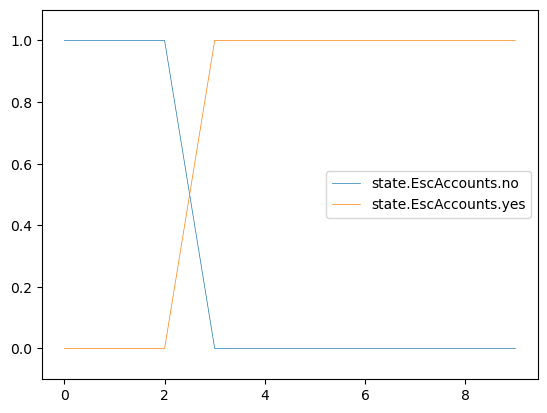

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0            Nop   
2                     1.0                      0.0   DecoyAccount   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                             none  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                   login_activity  
4       FileRecon                        file_enum  
5       FileRecon                        file_enum  
6  ManipulateData                       file_write  
7            Exit                             none  
8             Nop                             none  
9             Nop                        file_enum

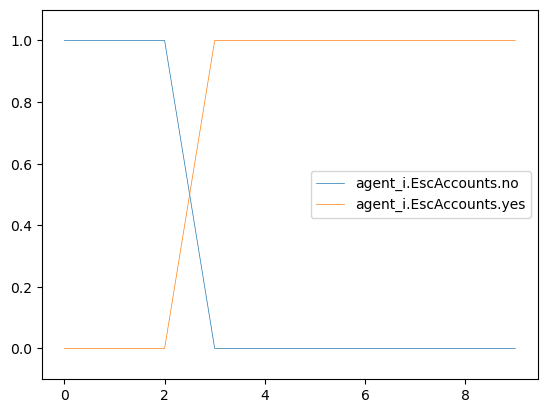

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.500000                 0.500000    EnumAccounts   
2                0.613636                 0.386364    EnumAccounts   
3                0.216175                 0.783825      PrivEscAcc   
4                0.000292                 0.999708       FileRecon   
5                0.000294                 0.999706       FileRecon   
6                0.000204                 0.999796  ManipulateData   
7                0.000073                 0.999927            Exit   
8                0.000073                 0.999927             Nop   
9                0.000073                 0.999927             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1            Nop                         none   
2   DecoyAccount                   user_files   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           success  
3                           success  
4                           failure  
5                           success  
6                           success  
7                           failure  
8                           success  
9                           failure

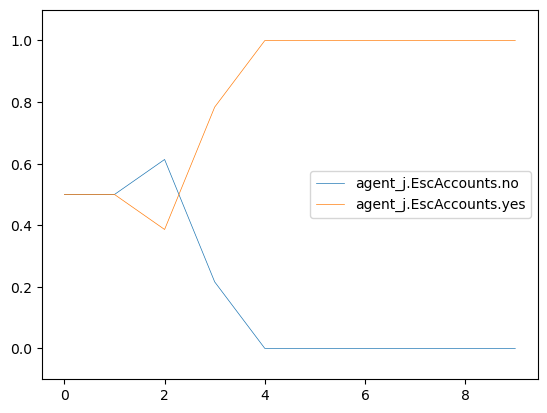

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action  agent_j.action
0                   1.0                   0.0            Nop       FileRecon
1                   1.0                   0.0            Nop    EnumAccounts
2                   1.0                   0.0   DecoyAccount    EnumAccounts
3                   1.0                   0.0            Nop      PrivEscAcc
4                   1.0                   0.0            Nop       FileRecon
5                   1.0                   0.0            Nop       FileRecon
6                   1.0                   0.0            Nop  ManipulateData
7                   1.0                   0.0            Nop            Exit
8                   1.0                   0.0            Nop             Nop
9                   1.0                   0.0            Nop             Nop

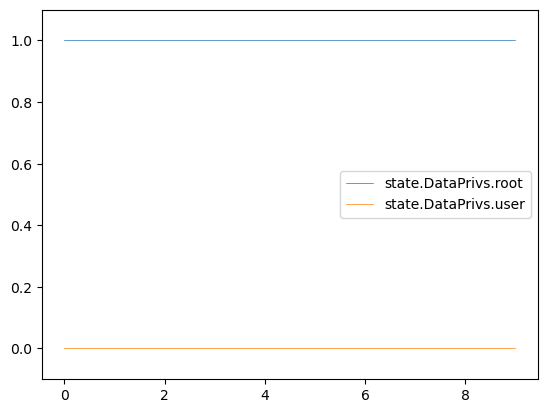

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0            Nop   
2                     1.0                     0.0   DecoyAccount   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                             none  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                   login_activity  
4       FileRecon                        file_enum  
5       FileRecon                        file_enum  
6  ManipulateData                       file_write  
7            Exit                             none  
8             Nop                             none  
9             Nop                        file_enum

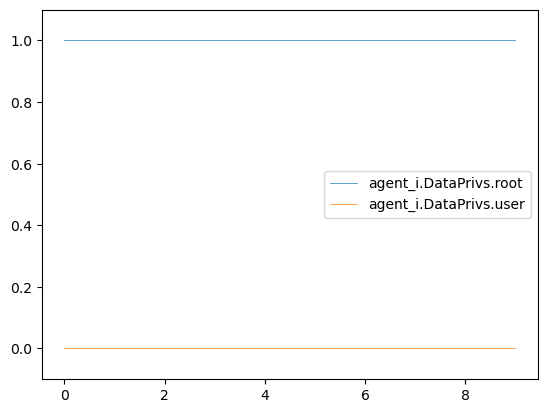

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000       FileRecon   
1                0.592105                0.407895    EnumAccounts   
2                0.592105                0.407895    EnumAccounts   
3                0.592105                0.407895      PrivEscAcc   
4                0.592105                0.407895       FileRecon   
5                0.551197                0.448803       FileRecon   
6                0.661623                0.338377  ManipulateData   
7                0.751652                0.248348            Exit   
8                0.751652                0.248348             Nop   
9                0.751652                0.248348             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1            Nop                         none   
2   DecoyAccount                   user_files   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           success  
3                           success  
4                           failure  
5                           success  
6                           success  
7                           failure  
8                           success  
9                           failure

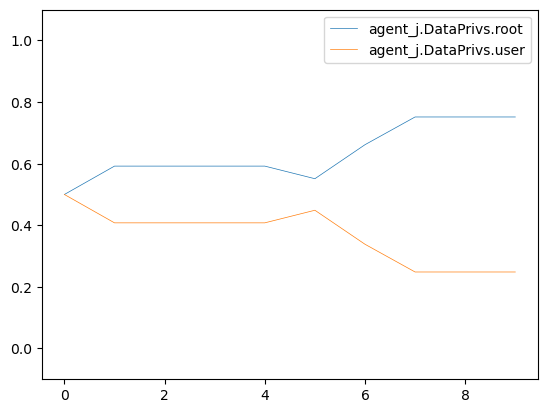

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action  agent_j.action
0                   0.0                    1.0            Nop       FileRecon
1                   0.0                    1.0            Nop    EnumAccounts
2                   0.0                    1.0   DecoyAccount    EnumAccounts
3                   0.0                    1.0            Nop      PrivEscAcc
4                   0.0                    1.0            Nop       FileRecon
5                   0.0                    1.0            Nop       FileRecon
6                   0.0                    1.0            Nop  ManipulateData
7                   0.0                    1.0            Nop            Exit
8                   0.0                    1.0            Nop             Nop
9                   0.0                    1.0            Nop             Nop

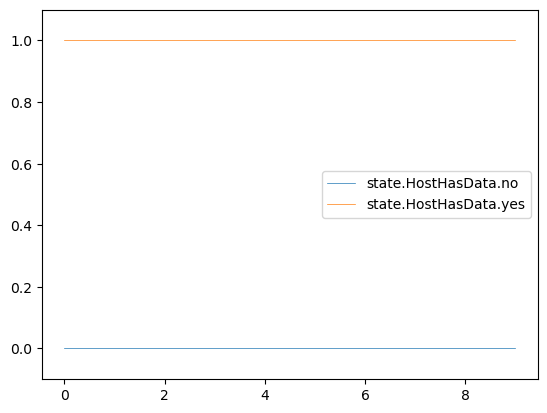

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0            Nop   
2                     0.0                      1.0   DecoyAccount   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                             none  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                   login_activity  
4       FileRecon                        file_enum  
5       FileRecon                        file_enum  
6  ManipulateData                       file_write  
7            Exit                             none  
8             Nop                             none  
9             Nop                        file_enum

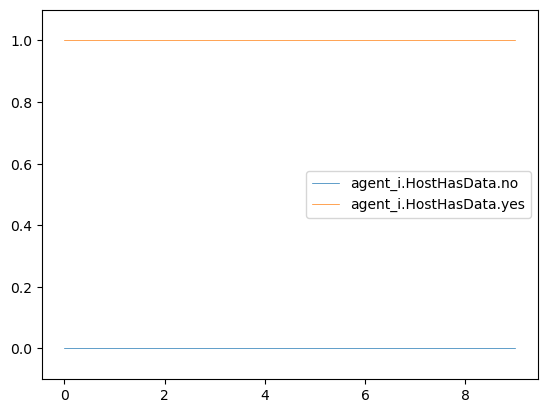

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.592105                 0.407895    EnumAccounts   
2                0.592105                 0.407895    EnumAccounts   
3                0.592105                 0.407895      PrivEscAcc   
4                0.592105                 0.407895       FileRecon   
5                0.800022                 0.199978       FileRecon   
6                0.359635                 0.640365  ManipulateData   
7                0.000581                 0.999419            Exit   
8                0.000581                 0.999419             Nop   
9                0.000581                 0.999419             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1            Nop                         none   
2   DecoyAccount                   user_files   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                         none   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           success  
3                           success  
4                           failure  
5                           success  
6                           success  
7                           failure  
8                           success  
9                           failure

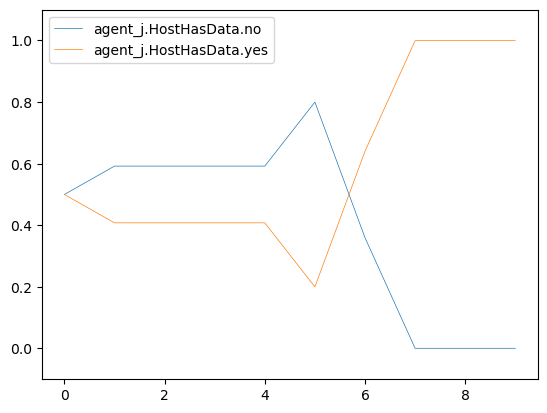

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                             none
1                               1.0                        file_enum
2                               1.0                        file_enum
3                               1.0                        file_enum
4                               1.0                             none
5                               1.0                             none
6                               1.0                             none
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

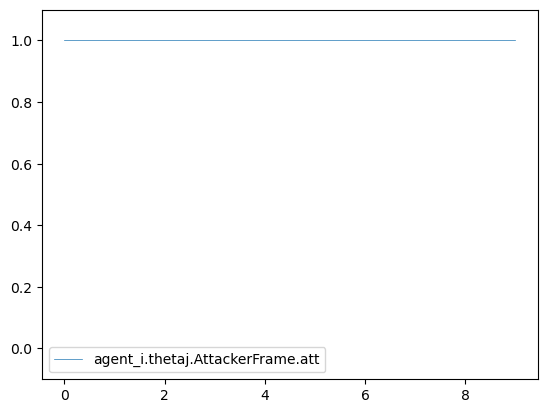

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.436364                        0.563636   
3                         0.311390                        0.688610   
4                         0.253098                        0.746902   
5                         0.253098                        0.746902   
6                         0.253098                        0.746902   
7                         0.253098                        0.746902   
8                         0.253098                        0.746902   
9                         0.253098                        0.746902   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                   user_files                           failure  
2                         none                           failure  
3                         none                           failure  
4                         none                           failure  
5                   user_files                           failure  
6                   user_files                           success  
7                         none                           success  
8                         none                           success  
9                   user_files                           success

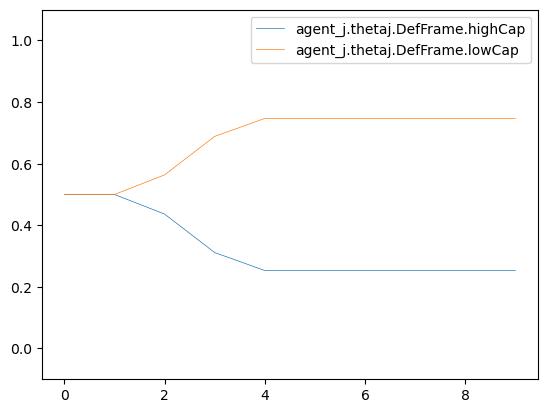

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action agent_j.action
0                 1.0                  0.0            Nop      FileRecon
1                 1.0                  0.0            Nop   EnumAccounts
2                 1.0                  0.0   DecoyAccount   EnumAccounts
3                 1.0                  0.0            Nop      FileRecon
4                 1.0                  0.0            Nop           Exit
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

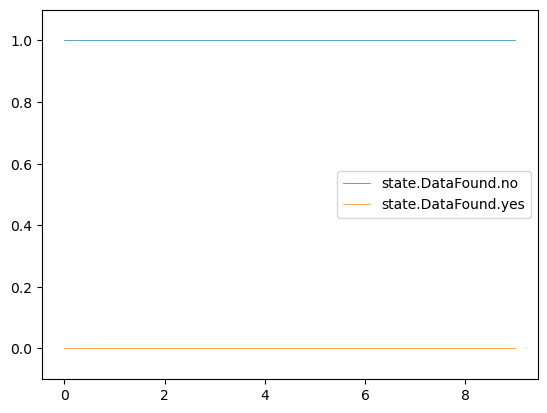

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action agent_j.action  \
0              1.000000               0.000000            Nop      FileRecon   
1              1.000000               0.000000            Nop   EnumAccounts   
2              1.000000               0.000000   DecoyAccount   EnumAccounts   
3              1.000000               0.000000            Nop      FileRecon   
4              1.000000               0.000000            Nop           Exit   
5              0.974471               0.025529            Nop            Nop   
6              0.993095               0.006905            Nop            Nop   
7              0.995903               0.004097            Nop            Nop   
8              0.996052               0.003948            Nop            Nop   
9              0.996058               0.003942            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                             none  
1                        file_enum  
2                        file_enum  
3                        file_enum  
4                             none  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

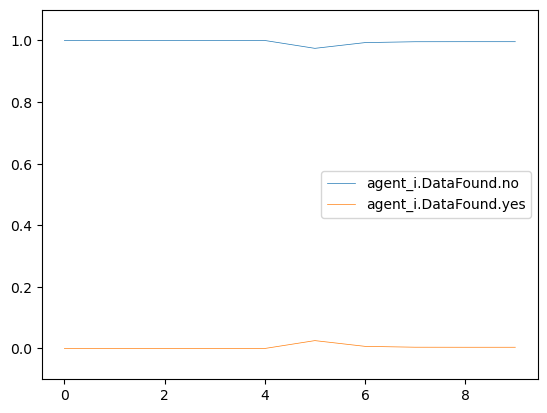

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action agent_i.action  \
0              1.000000               0.000000      FileRecon            Nop   
1              0.976974               0.023026   EnumAccounts            Nop   
2              0.976974               0.023026   EnumAccounts   DecoyAccount   
3              0.976974               0.023026      FileRecon            Nop   
4              0.989758               0.010242           Exit            Nop   
5              0.989758               0.010242            Nop            Nop   
6              0.989758               0.010242            Nop            Nop   
7              0.989758               0.010242            Nop            Nop   
8              0.989758               0.010242            Nop            Nop   
9              0.989758               0.010242            Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                   user_files                           failure  
2                         none                           failure  
3                         none                           failure  
4                         none                           failure  
5                   user_files                           failure  
6                   user_files                           success  
7                         none                           success  
8                         none                           success  
9                   user_files                           success

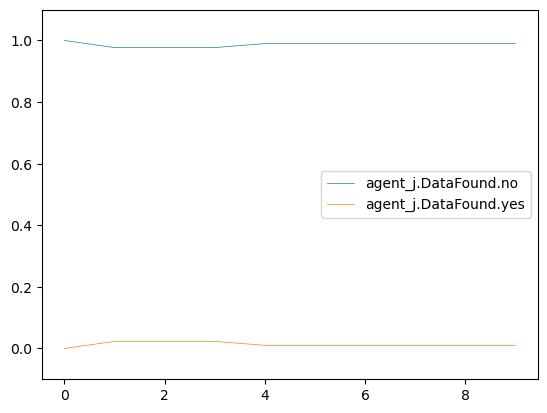

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action agent_j.action
0                    1.0                     0.0            Nop      FileRecon
1                    1.0                     0.0            Nop   EnumAccounts
2                    1.0                     0.0   DecoyAccount   EnumAccounts
3                    1.0                     0.0            Nop      FileRecon
4                    1.0                     0.0            Nop           Exit
5                    1.0                     0.0            Nop            Nop
6                    1.0                     0.0            Nop            Nop
7                    1.0                     0.0            Nop            Nop
8                    1.0                     0.0            Nop            Nop
9                    1.0                     0.0            Nop            Nop

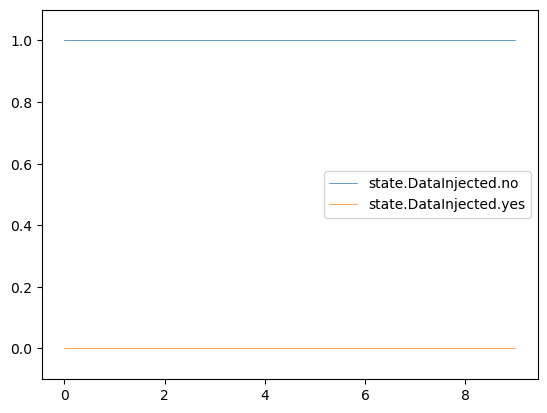

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                 1.000000                  0.000000            Nop   
1                 1.000000                  0.000000            Nop   
2                 1.000000                  0.000000   DecoyAccount   
3                 1.000000                  0.000000            Nop   
4                 1.000000                  0.000000            Nop   
5                 1.000000                  0.000000            Nop   
6                 0.996550                  0.003450            Nop   
7                 0.996092                  0.003908            Nop   
8                 0.996068                  0.003932            Nop   
9                 0.996067                  0.003933            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                             none  
1   EnumAccounts                        file_enum  
2   EnumAccounts                        file_enum  
3      FileRecon                        file_enum  
4           Exit                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

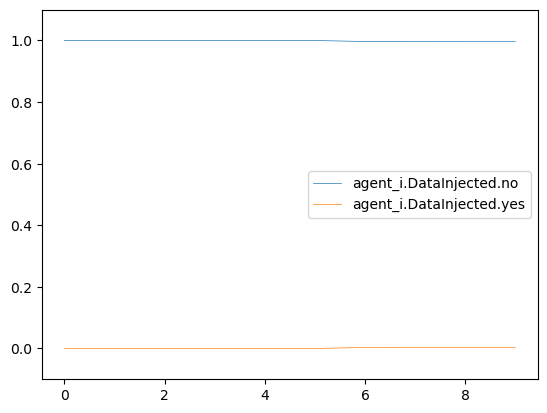

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                      1.0                       0.0      FileRecon   
1                      1.0                       0.0   EnumAccounts   
2                      1.0                       0.0   EnumAccounts   
3                      1.0                       0.0      FileRecon   
4                      1.0                       0.0           Exit   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                   user_files   
2   DecoyAccount                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                         none   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           failure  
3                           failure  
4                           failure  
5                           failure  
6                           success  
7                           success  
8                           success  
9                           success

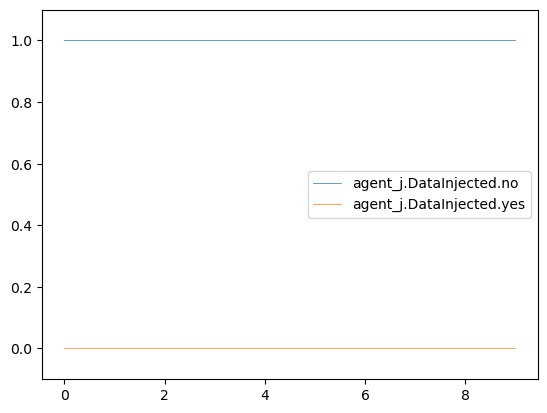

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0            Nop   
1                     0.0                     1.0            Nop   
2                     0.0                     1.0   DecoyAccount   
3                     0.0                     1.0            Nop   
4                     0.0                     1.0            Nop   
5                     0.0                     1.0            Nop   
6                     0.0                     1.0            Nop   
7                     0.0                     1.0            Nop   
8                     0.0                     1.0            Nop   
9                     0.0                     1.0            Nop   

  agent_j.action  
0      FileRecon  
1   EnumAccounts  
2   EnumAccounts  
3      FileRecon  
4           Exit  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

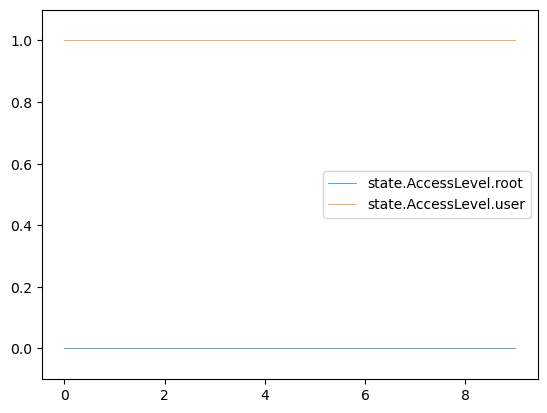

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                  0.000000                  1.000000            Nop   
1                  0.000000                  1.000000            Nop   
2                  0.000000                  1.000000   DecoyAccount   
3                  0.000000                  1.000000            Nop   
4                  0.176409                  0.823591            Nop   
5                  0.055847                  0.944153            Nop   
6                  0.008428                  0.991572            Nop   
7                  0.004205                  0.995795            Nop   
8                  0.004000                  0.996000            Nop   
9                  0.003994                  0.996006            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                             none  
1   EnumAccounts                        file_enum  
2   EnumAccounts                        file_enum  
3      FileRecon                        file_enum  
4           Exit                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

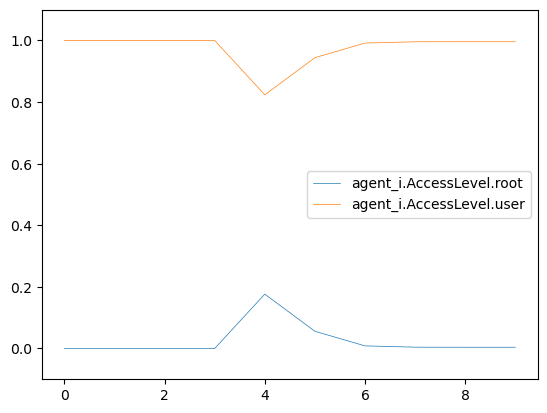

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                       0.0                       1.0      FileRecon   
1                       0.0                       1.0   EnumAccounts   
2                       0.0                       1.0   EnumAccounts   
3                       0.0                       1.0      FileRecon   
4                       0.0                       1.0           Exit   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                   user_files   
2   DecoyAccount                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                         none   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           failure  
3                           failure  
4                           failure  
5                           failure  
6                           success  
7                           success  
8                           success  
9                           success

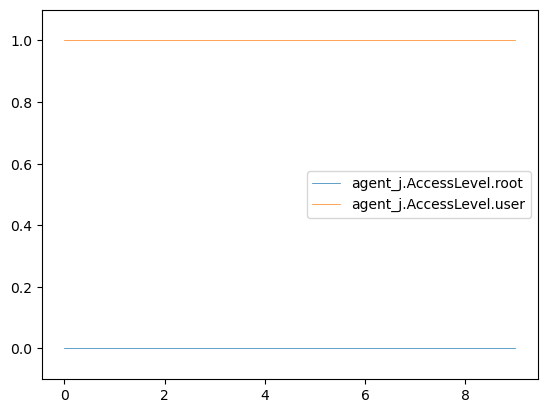

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action agent_j.action
0                 0.0                  1.0            Nop      FileRecon
1                 0.0                  1.0            Nop   EnumAccounts
2                 0.0                  1.0   DecoyAccount   EnumAccounts
3                 0.0                  1.0            Nop      FileRecon
4                 0.0                  1.0            Nop           Exit
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

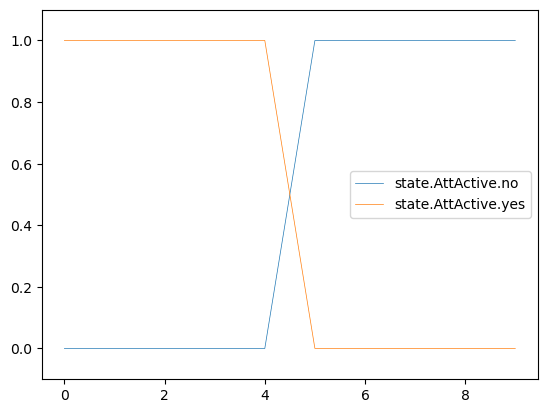

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action agent_j.action  \
0              0.000000               1.000000            Nop      FileRecon   
1              0.000000               1.000000            Nop   EnumAccounts   
2              0.000000               1.000000   DecoyAccount   EnumAccounts   
3              0.000002               0.999998            Nop      FileRecon   
4              0.007336               0.992664            Nop           Exit   
5              0.925469               0.074531            Nop            Nop   
6              0.991472               0.008528            Nop            Nop   
7              0.999285               0.000715            Nop            Nop   
8              0.999966               0.000034            Nop            Nop   
9              0.999999               0.000001            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                             none  
1                        file_enum  
2                        file_enum  
3                        file_enum  
4                             none  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

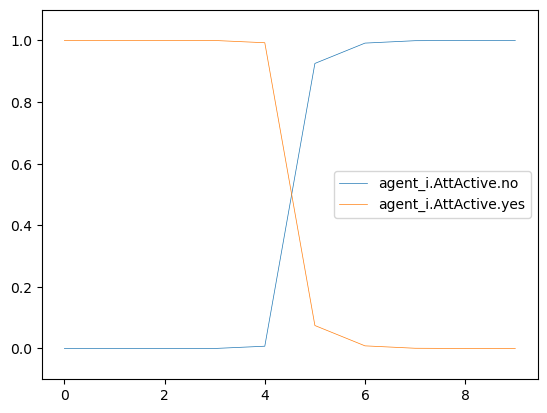

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action agent_i.action  \
0                   0.0                    1.0      FileRecon            Nop   
1                   0.0                    1.0   EnumAccounts            Nop   
2                   0.0                    1.0   EnumAccounts   DecoyAccount   
3                   0.0                    1.0      FileRecon            Nop   
4                   0.0                    1.0           Exit            Nop   
5                   1.0                    0.0            Nop            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                   user_files                           failure  
2                         none                           failure  
3                         none                           failure  
4                         none                           failure  
5                   user_files                           failure  
6                   user_files                           success  
7                         none                           success  
8                         none                           success  
9                   user_files                           success

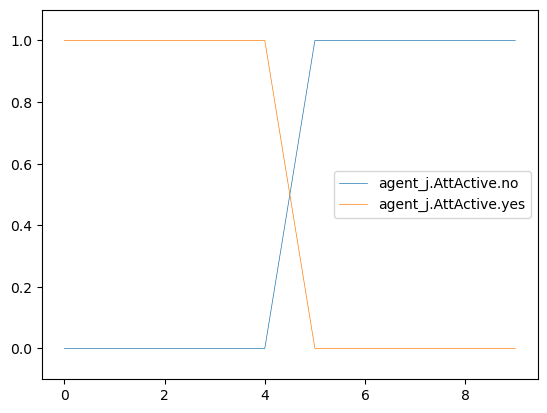

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action agent_j.action  
0                      1.0            Nop      FileRecon  
1                      1.0            Nop   EnumAccounts  
2                      1.0   DecoyAccount   EnumAccounts  
3                      1.0            Nop      FileRecon  
4                      1.0            Nop           Exit  
5                      1.0            Nop            Nop  
6                      1.0            Nop            Nop  
7                      1.0            Nop            Nop  
8                      1.0            Nop            Nop  
9                      1.0            Nop            Nop

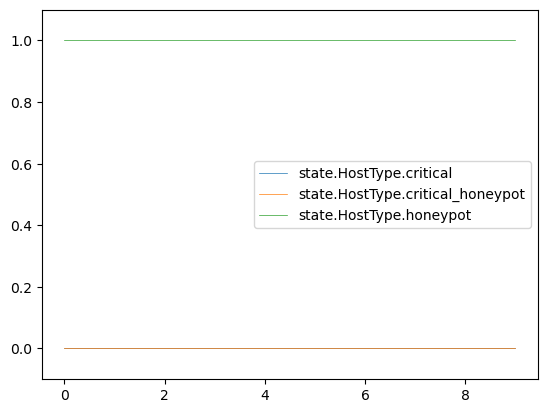

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action agent_j.action  \
0                        1.0            Nop      FileRecon   
1                        1.0            Nop   EnumAccounts   
2                        1.0   DecoyAccount   EnumAccounts   
3                        1.0            Nop      FileRecon   
4                        1.0            Nop           Exit   
5                        1.0            Nop            Nop   
6                        1.0            Nop            Nop   
7                        1.0            Nop            Nop   
8                        1.0            Nop            Nop   
9                        1.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                             none  
1                        file_enum  
2                        file_enum  
3                        file_enum  
4                             none  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

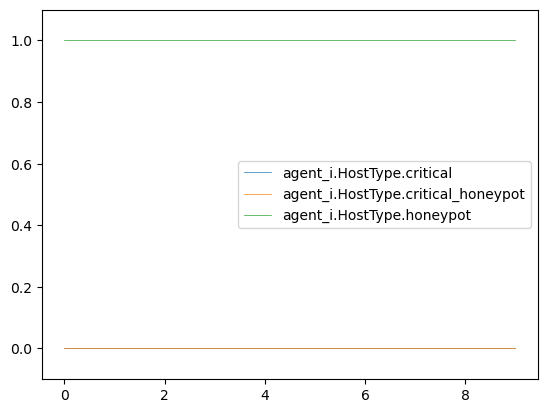

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                   0.500000                                 0.0   
1                   0.300000                                 0.0   
2                   0.563636                                 0.0   
3                   0.413166                                 0.0   
4                   0.231797                                 0.0   
5                   0.231797                                 0.0   
6                   0.231797                                 0.0   
7                   0.231797                                 0.0   
8                   0.231797                                 0.0   
9                   0.231797                                 0.0   

   agent_j.HostType.honeypot agent_j.action agent_i.action  \
0                   0.500000      FileRecon            Nop   
1                   0.700000   EnumAccounts            Nop   
2                   0.436364   EnumAccounts   DecoyAccount   
3                   0.586834      FileRecon            Nop   
4                   0.768203           Exit            Nop   
5                   0.768203            Nop            Nop   
6                   0.768203            Nop            Nop   
7                   0.768203            Nop            Nop   
8                   0.768203            Nop            Nop   
9                   0.768203            Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                   user_files                           failure  
2                         none                           failure  
3                         none                           failure  
4                         none                           failure  
5                   user_files                           failure  
6                   user_files                           success  
7                         none                           success  
8                         none                           success  
9                   user_files                           success

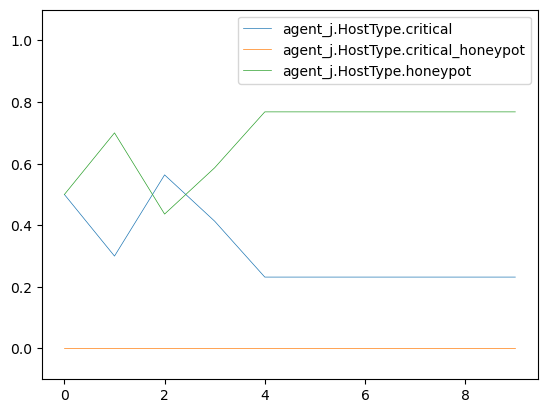

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action agent_j.action
0                1.0                 0.0            Nop      FileRecon
1                1.0                 0.0            Nop   EnumAccounts
2                1.0                 0.0   DecoyAccount   EnumAccounts
3                1.0                 0.0            Nop      FileRecon
4                1.0                 0.0            Nop           Exit
5                1.0                 0.0            Nop            Nop
6                1.0                 0.0            Nop            Nop
7                1.0                 0.0            Nop            Nop
8                1.0                 0.0            Nop            Nop
9                1.0                 0.0            Nop            Nop

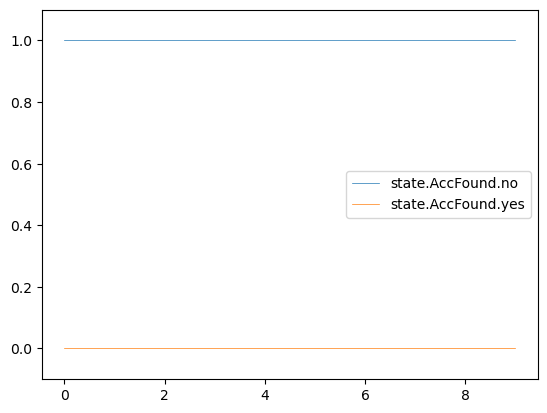

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action agent_j.action  \
0             1.000000              0.000000            Nop      FileRecon   
1             1.000000              0.000000            Nop   EnumAccounts   
2             1.000000              0.000000   DecoyAccount   EnumAccounts   
3             0.371711              0.628289            Nop      FileRecon   
4             0.584621              0.415379            Nop           Exit   
5             0.753280              0.246720            Nop            Nop   
6             0.791060              0.208940            Nop            Nop   
7             0.794448              0.205552            Nop            Nop   
8             0.794612              0.205388            Nop            Nop   
9             0.794617              0.205383            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                             none  
1                        file_enum  
2                        file_enum  
3                        file_enum  
4                             none  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

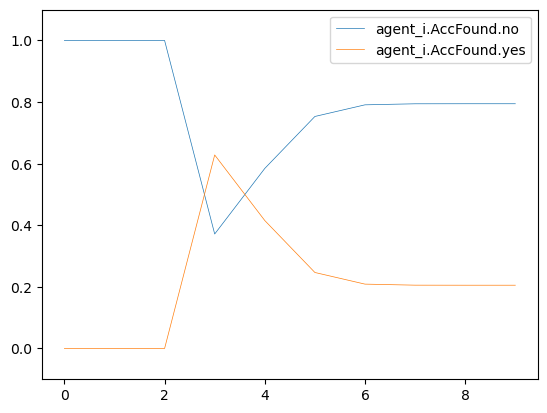

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action agent_i.action  \
0             1.000000              0.000000      FileRecon            Nop   
1             1.000000              0.000000   EnumAccounts            Nop   
2             0.920455              0.079545   EnumAccounts   DecoyAccount   
3             0.947013              0.052987      FileRecon            Nop   
4             0.939445              0.060555           Exit            Nop   
5             0.939445              0.060555            Nop            Nop   
6             0.939445              0.060555            Nop            Nop   
7             0.939445              0.060555            Nop            Nop   
8             0.939445              0.060555            Nop            Nop   
9             0.939445              0.060555            Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                   user_files                           failure  
2                         none                           failure  
3                         none                           failure  
4                         none                           failure  
5                   user_files                           failure  
6                   user_files                           success  
7                         none                           success  
8                         none                           success  
9                   user_files                           success

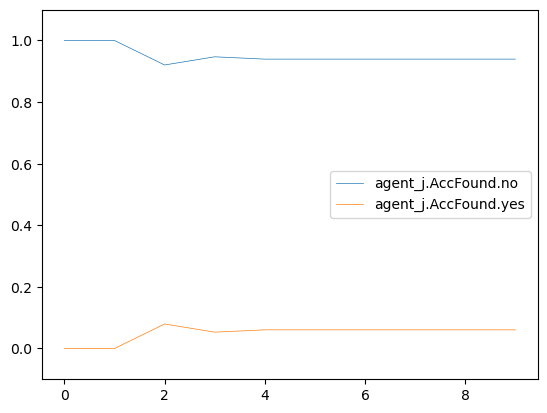

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action agent_j.action
0                   1.0                    0.0            Nop      FileRecon
1                   1.0                    0.0            Nop   EnumAccounts
2                   1.0                    0.0   DecoyAccount   EnumAccounts
3                   0.0                    1.0            Nop      FileRecon
4                   0.0                    1.0            Nop           Exit
5                   0.0                    1.0            Nop            Nop
6                   0.0                    1.0            Nop            Nop
7                   0.0                    1.0            Nop            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

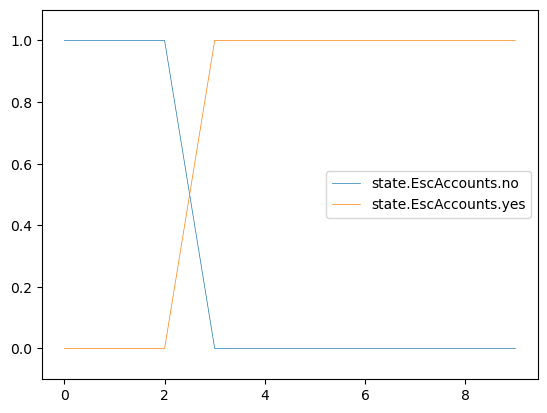

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0            Nop   
2                     1.0                      0.0   DecoyAccount   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                             none  
1   EnumAccounts                        file_enum  
2   EnumAccounts                        file_enum  
3      FileRecon                        file_enum  
4           Exit                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

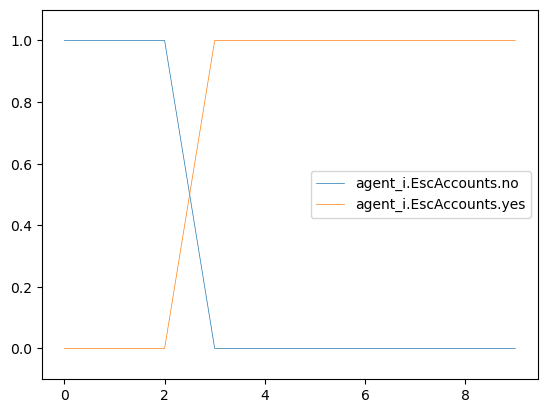

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                0.500000                 0.500000      FileRecon   
1                0.500000                 0.500000   EnumAccounts   
2                0.613636                 0.386364   EnumAccounts   
3                0.797872                 0.202128      FileRecon   
4                0.769002                 0.230998           Exit   
5                0.769002                 0.230998            Nop   
6                0.769002                 0.230998            Nop   
7                0.769002                 0.230998            Nop   
8                0.769002                 0.230998            Nop   
9                0.769002                 0.230998            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                   user_files   
2   DecoyAccount                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                         none   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           failure  
3                           failure  
4                           failure  
5                           failure  
6                           success  
7                           success  
8                           success  
9                           success

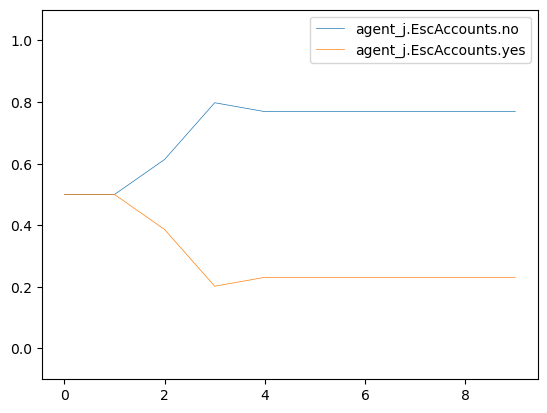

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action agent_j.action
0                   1.0                   0.0            Nop      FileRecon
1                   1.0                   0.0            Nop   EnumAccounts
2                   1.0                   0.0   DecoyAccount   EnumAccounts
3                   1.0                   0.0            Nop      FileRecon
4                   1.0                   0.0            Nop           Exit
5                   1.0                   0.0            Nop            Nop
6                   1.0                   0.0            Nop            Nop
7                   1.0                   0.0            Nop            Nop
8                   1.0                   0.0            Nop            Nop
9                   1.0                   0.0            Nop            Nop

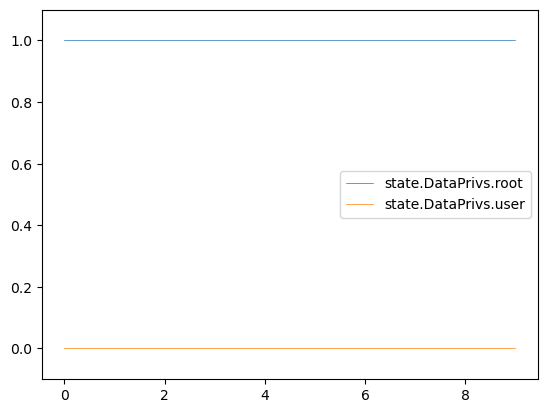

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0            Nop   
2                     1.0                     0.0   DecoyAccount   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                             none  
1   EnumAccounts                        file_enum  
2   EnumAccounts                        file_enum  
3      FileRecon                        file_enum  
4           Exit                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

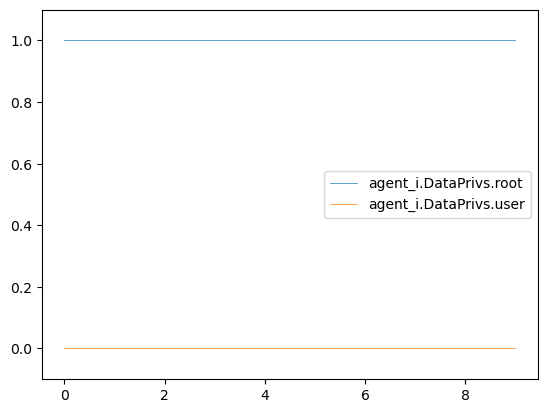

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                0.500000                0.500000      FileRecon   
1                0.592105                0.407895   EnumAccounts   
2                0.592105                0.407895   EnumAccounts   
3                0.592105                0.407895      FileRecon   
4                0.640620                0.359380           Exit   
5                0.640620                0.359380            Nop   
6                0.640620                0.359380            Nop   
7                0.640620                0.359380            Nop   
8                0.640620                0.359380            Nop   
9                0.640620                0.359380            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                   user_files   
2   DecoyAccount                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                         none   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           failure  
3                           failure  
4                           failure  
5                           failure  
6                           success  
7                           success  
8                           success  
9                           success

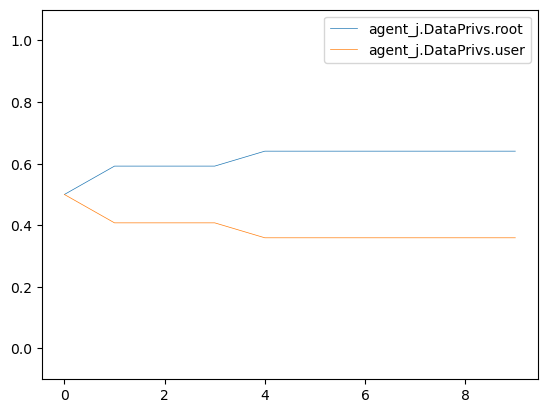

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action agent_j.action
0                   0.0                    1.0            Nop      FileRecon
1                   0.0                    1.0            Nop   EnumAccounts
2                   0.0                    1.0   DecoyAccount   EnumAccounts
3                   0.0                    1.0            Nop      FileRecon
4                   0.0                    1.0            Nop           Exit
5                   0.0                    1.0            Nop            Nop
6                   0.0                    1.0            Nop            Nop
7                   0.0                    1.0            Nop            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

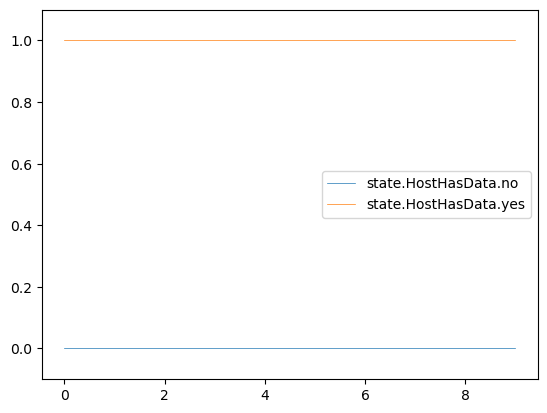

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0            Nop   
2                     0.0                      1.0   DecoyAccount   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                             none  
1   EnumAccounts                        file_enum  
2   EnumAccounts                        file_enum  
3      FileRecon                        file_enum  
4           Exit                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

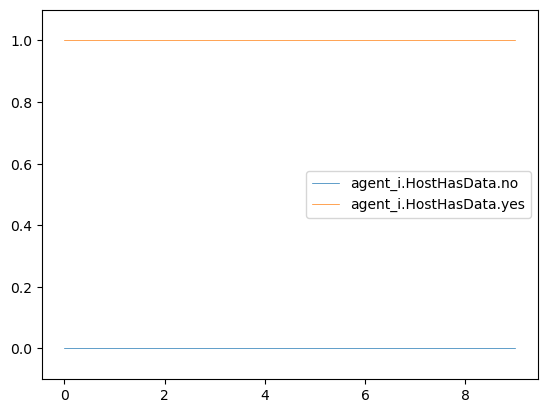

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                0.500000                 0.500000      FileRecon   
1                0.592105                 0.407895   EnumAccounts   
2                0.592105                 0.407895   EnumAccounts   
3                0.592105                 0.407895      FileRecon   
4                0.640620                 0.359380           Exit   
5                0.640620                 0.359380            Nop   
6                0.640620                 0.359380            Nop   
7                0.640620                 0.359380            Nop   
8                0.640620                 0.359380            Nop   
9                0.640620                 0.359380            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                   user_files   
2   DecoyAccount                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                         none   
8            Nop                         none   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           failure  
3                           failure  
4                           failure  
5                           failure  
6                           success  
7                           success  
8                           success  
9                           success

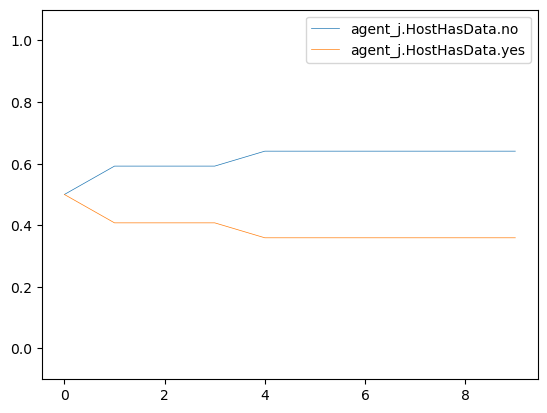

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                   login_activity
3                               1.0                        file_enum
4                               1.0                             none
5                               1.0                             none
6                               1.0                             none
7                               1.0                             none
8                               1.0                   login_activity
9                               1.0                        file_enum

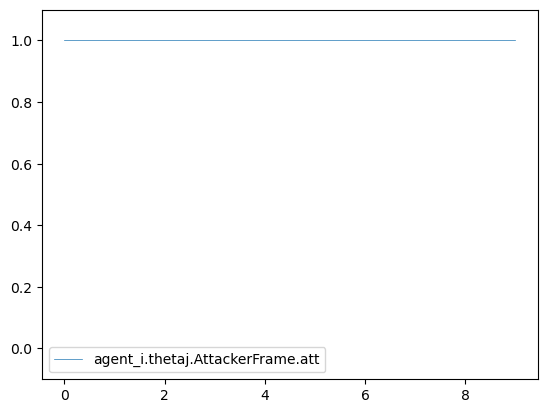

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.436364                        0.563636   
3                         0.433501                        0.566499   
4                         0.378386                        0.621614   
5                         0.378386                        0.621614   
6                         0.378386                        0.621614   
7                         0.378386                        0.621614   
8                         0.378386                        0.621614   
9                         0.378386                        0.621614   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                   user_files                           failure  
2                   user_files                           failure  
3                         none                           failure  
4                         none                           success  
5                         none                           success  
6                         none                           success  
7                   user_files                           success  
8                   user_files                           success  
9                   user_files                           success

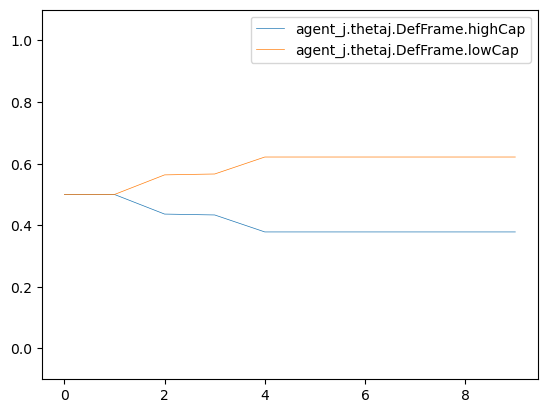

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action agent_j.action
0                 1.0                  0.0            Nop      FileRecon
1                 1.0                  0.0            Nop   EnumAccounts
2                 1.0                  0.0   DecoyAccount   EnumAccounts
3                 1.0                  0.0            Nop      FileRecon
4                 1.0                  0.0            Nop           Exit
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

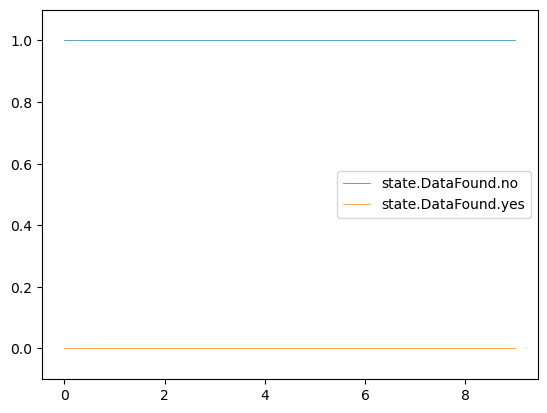

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action agent_j.action  \
0              1.000000               0.000000            Nop      FileRecon   
1              1.000000               0.000000            Nop   EnumAccounts   
2              1.000000               0.000000   DecoyAccount   EnumAccounts   
3              1.000000               0.000000            Nop      FileRecon   
4              1.000000               0.000000            Nop           Exit   
5              0.978502               0.021498            Nop            Nop   
6              0.983637               0.016363            Nop            Nop   
7              0.994319               0.005681            Nop            Nop   
8              0.994878               0.005122            Nop            Nop   
9              0.994871               0.005129            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                             none  
5                             none  
6                             none  
7                             none  
8                   login_activity  
9                        file_enum

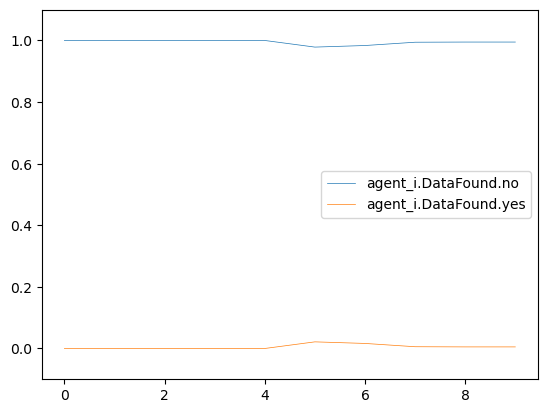

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action agent_i.action  \
0              1.000000               0.000000      FileRecon            Nop   
1              0.976974               0.023026   EnumAccounts            Nop   
2              0.976974               0.023026   EnumAccounts   DecoyAccount   
3              0.976974               0.023026      FileRecon            Nop   
4              0.989758               0.010242           Exit            Nop   
5              0.989758               0.010242            Nop            Nop   
6              0.989758               0.010242            Nop            Nop   
7              0.989758               0.010242            Nop            Nop   
8              0.989758               0.010242            Nop            Nop   
9              0.989758               0.010242            Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                   user_files                           failure  
2                   user_files                           failure  
3                         none                           failure  
4                         none                           success  
5                         none                           success  
6                         none                           success  
7                   user_files                           success  
8                   user_files                           success  
9                   user_files                           success

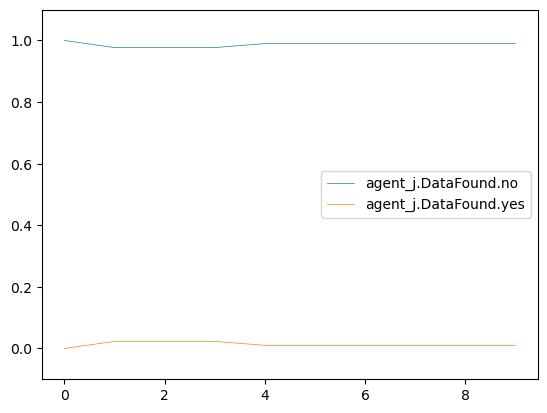

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action agent_j.action
0                    1.0                     0.0            Nop      FileRecon
1                    1.0                     0.0            Nop   EnumAccounts
2                    1.0                     0.0   DecoyAccount   EnumAccounts
3                    1.0                     0.0            Nop      FileRecon
4                    1.0                     0.0            Nop           Exit
5                    1.0                     0.0            Nop            Nop
6                    1.0                     0.0            Nop            Nop
7                    1.0                     0.0            Nop            Nop
8                    1.0                     0.0            Nop            Nop
9                    1.0                     0.0            Nop            Nop

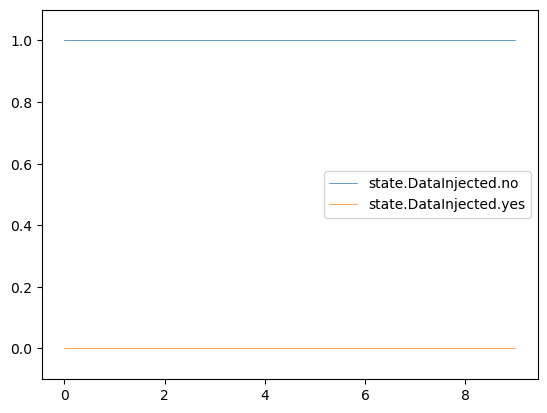

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                 1.000000                  0.000000            Nop   
1                 1.000000                  0.000000            Nop   
2                 1.000000                  0.000000   DecoyAccount   
3                 1.000000                  0.000000            Nop   
4                 1.000000                  0.000000            Nop   
5                 1.000000                  0.000000            Nop   
6                 0.996809                  0.003191            Nop   
7                 0.995033                  0.004967            Nop   
8                 0.994939                  0.005061            Nop   
9                 0.994892                  0.005108            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2   EnumAccounts                   login_activity  
3      FileRecon                        file_enum  
4           Exit                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                   login_activity  
9            Nop                        file_enum

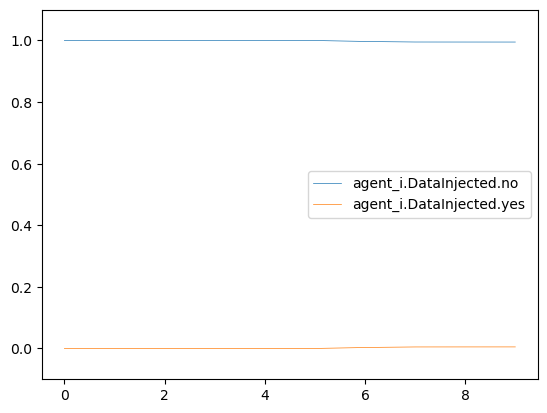

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                      1.0                       0.0      FileRecon   
1                      1.0                       0.0   EnumAccounts   
2                      1.0                       0.0   EnumAccounts   
3                      1.0                       0.0      FileRecon   
4                      1.0                       0.0           Exit   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                   user_files   
2   DecoyAccount                   user_files   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           failure  
3                           failure  
4                           success  
5                           success  
6                           success  
7                           success  
8                           success  
9                           success

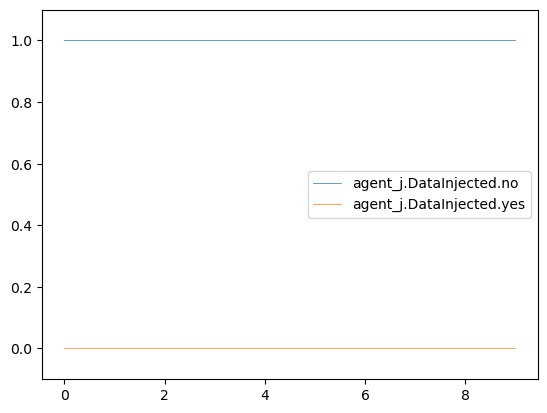

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0            Nop   
1                     0.0                     1.0            Nop   
2                     0.0                     1.0   DecoyAccount   
3                     0.0                     1.0            Nop   
4                     0.0                     1.0            Nop   
5                     0.0                     1.0            Nop   
6                     0.0                     1.0            Nop   
7                     0.0                     1.0            Nop   
8                     0.0                     1.0            Nop   
9                     0.0                     1.0            Nop   

  agent_j.action  
0      FileRecon  
1   EnumAccounts  
2   EnumAccounts  
3      FileRecon  
4           Exit  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

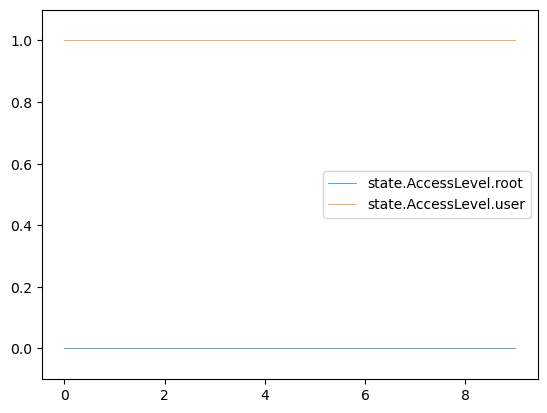

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                  0.000000                  1.000000            Nop   
1                  0.000000                  1.000000            Nop   
2                  0.000000                  1.000000   DecoyAccount   
3                  0.000000                  1.000000            Nop   
4                  0.092512                  0.907488            Nop   
5                  0.133468                  0.866532            Nop   
6                  0.022048                  0.977952            Nop   
7                  0.006176                  0.993824            Nop   
8                  0.005194                  0.994806            Nop   
9                  0.005194                  0.994806            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2   EnumAccounts                   login_activity  
3      FileRecon                        file_enum  
4           Exit                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                   login_activity  
9            Nop                        file_enum

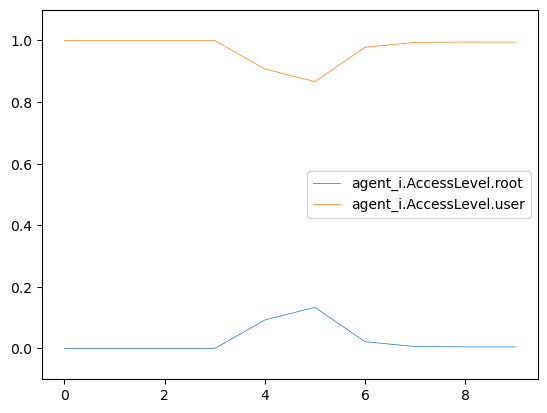

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                       0.0                       1.0      FileRecon   
1                       0.0                       1.0   EnumAccounts   
2                       0.0                       1.0   EnumAccounts   
3                       0.0                       1.0      FileRecon   
4                       0.0                       1.0           Exit   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                   user_files   
2   DecoyAccount                   user_files   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           failure  
3                           failure  
4                           success  
5                           success  
6                           success  
7                           success  
8                           success  
9                           success

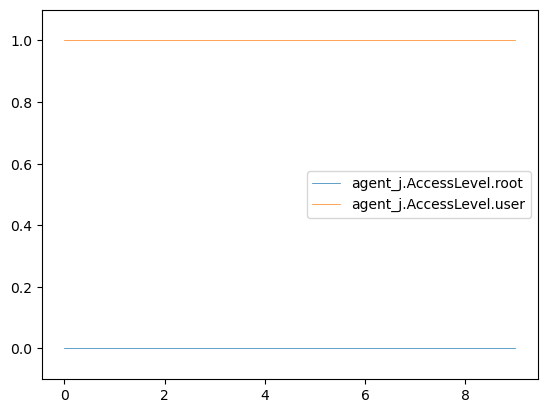

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action agent_j.action
0                 0.0                  1.0            Nop      FileRecon
1                 0.0                  1.0            Nop   EnumAccounts
2                 0.0                  1.0   DecoyAccount   EnumAccounts
3                 0.0                  1.0            Nop      FileRecon
4                 0.0                  1.0            Nop           Exit
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

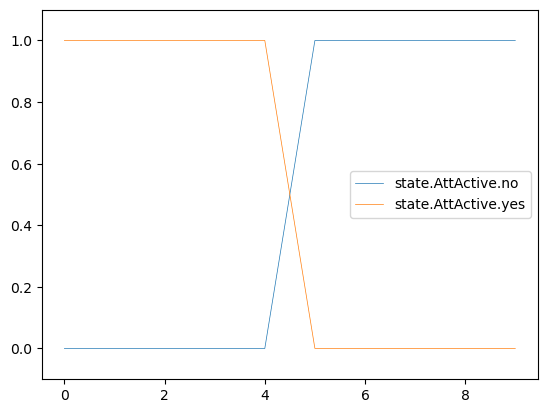

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action agent_j.action  \
0              0.000000               1.000000            Nop      FileRecon   
1              0.000000               1.000000            Nop   EnumAccounts   
2              0.000000               1.000000   DecoyAccount   EnumAccounts   
3              0.000010               0.999990            Nop      FileRecon   
4              0.003850               0.996150            Nop           Exit   
5              0.779352               0.220648            Nop            Nop   
6              0.974282               0.025718            Nop            Nop   
7              0.997080               0.002920            Nop            Nop   
8              0.999835               0.000165            Nop            Nop   
9              0.999940               0.000060            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                             none  
5                             none  
6                             none  
7                             none  
8                   login_activity  
9                        file_enum

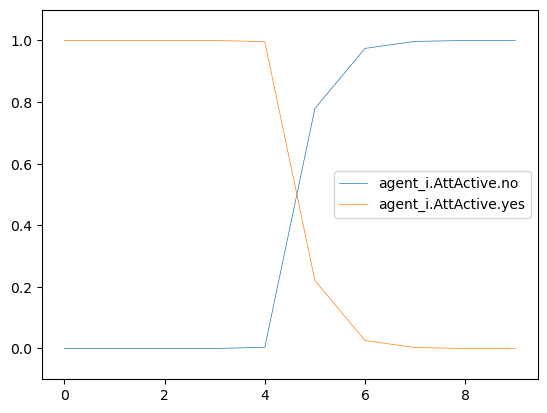

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action agent_i.action  \
0                   0.0                    1.0      FileRecon            Nop   
1                   0.0                    1.0   EnumAccounts            Nop   
2                   0.0                    1.0   EnumAccounts   DecoyAccount   
3                   0.0                    1.0      FileRecon            Nop   
4                   0.0                    1.0           Exit            Nop   
5                   1.0                    0.0            Nop            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                   user_files                           failure  
2                   user_files                           failure  
3                         none                           failure  
4                         none                           success  
5                         none                           success  
6                         none                           success  
7                   user_files                           success  
8                   user_files                           success  
9                   user_files                           success

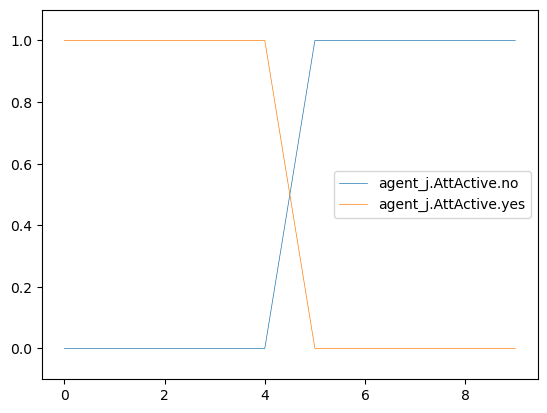

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action agent_j.action  
0                      1.0            Nop      FileRecon  
1                      1.0            Nop   EnumAccounts  
2                      1.0   DecoyAccount   EnumAccounts  
3                      1.0            Nop      FileRecon  
4                      1.0            Nop           Exit  
5                      1.0            Nop            Nop  
6                      1.0            Nop            Nop  
7                      1.0            Nop            Nop  
8                      1.0            Nop            Nop  
9                      1.0            Nop            Nop

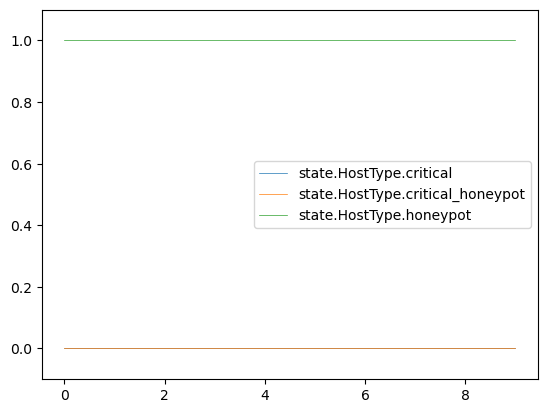

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action agent_j.action  \
0                        1.0            Nop      FileRecon   
1                        1.0            Nop   EnumAccounts   
2                        1.0   DecoyAccount   EnumAccounts   
3                        1.0            Nop      FileRecon   
4                        1.0            Nop           Exit   
5                        1.0            Nop            Nop   
6                        1.0            Nop            Nop   
7                        1.0            Nop            Nop   
8                        1.0            Nop            Nop   
9                        1.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                             none  
5                             none  
6                             none  
7                             none  
8                   login_activity  
9                        file_enum

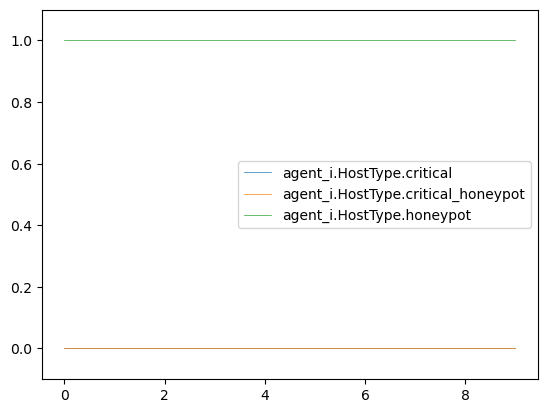

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                   0.500000                                 0.0   
1                   0.300000                                 0.0   
2                   0.563636                                 0.0   
3                   0.793098                                 0.0   
4                   0.621614                                 0.0   
5                   0.621614                                 0.0   
6                   0.621614                                 0.0   
7                   0.621614                                 0.0   
8                   0.621614                                 0.0   
9                   0.621614                                 0.0   

   agent_j.HostType.honeypot agent_j.action agent_i.action  \
0                   0.500000      FileRecon            Nop   
1                   0.700000   EnumAccounts            Nop   
2                   0.436364   EnumAccounts   DecoyAccount   
3                   0.206902      FileRecon            Nop   
4                   0.378386           Exit            Nop   
5                   0.378386            Nop            Nop   
6                   0.378386            Nop            Nop   
7                   0.378386            Nop            Nop   
8                   0.378386            Nop            Nop   
9                   0.378386            Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                   user_files                           failure  
2                   user_files                           failure  
3                         none                           failure  
4                         none                           success  
5                         none                           success  
6                         none                           success  
7                   user_files                           success  
8                   user_files                           success  
9                   user_files                           success

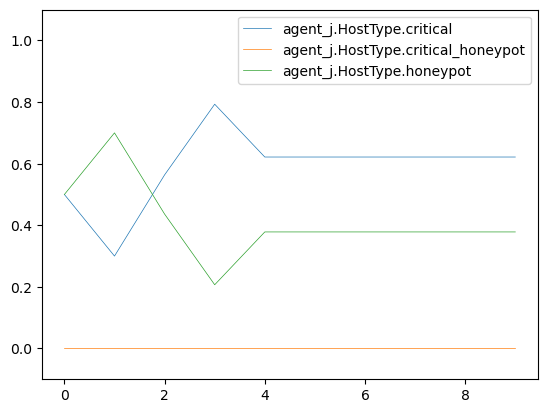

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action agent_j.action
0                1.0                 0.0            Nop      FileRecon
1                1.0                 0.0            Nop   EnumAccounts
2                1.0                 0.0   DecoyAccount   EnumAccounts
3                0.0                 1.0            Nop      FileRecon
4                0.0                 1.0            Nop           Exit
5                0.0                 1.0            Nop            Nop
6                0.0                 1.0            Nop            Nop
7                0.0                 1.0            Nop            Nop
8                0.0                 1.0            Nop            Nop
9                0.0                 1.0            Nop            Nop

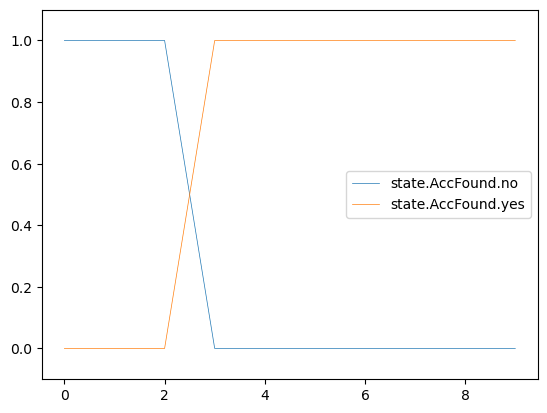

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action agent_j.action  \
0             1.000000              0.000000            Nop      FileRecon   
1             1.000000              0.000000            Nop   EnumAccounts   
2             1.000000              0.000000   DecoyAccount   EnumAccounts   
3             0.638338              0.361662            Nop      FileRecon   
4             0.492868              0.507132            Nop           Exit   
5             0.696192              0.303808            Nop            Nop   
6             0.781176              0.218824            Nop            Nop   
7             0.794741              0.205259            Nop            Nop   
8             0.795527              0.204473            Nop            Nop   
9             0.795527              0.204473            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                             none  
5                             none  
6                             none  
7                             none  
8                   login_activity  
9                        file_enum

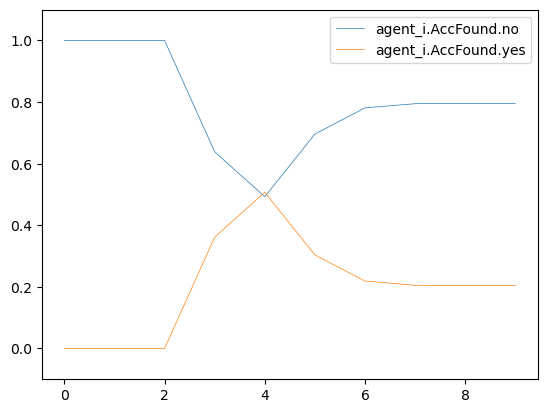

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action agent_i.action  \
0             1.000000              0.000000      FileRecon            Nop   
1             1.000000              0.000000   EnumAccounts            Nop   
2             0.920455              0.079545   EnumAccounts   DecoyAccount   
3             0.962867              0.037133      FileRecon            Nop   
4             0.955711              0.044289           Exit            Nop   
5             0.955711              0.044289            Nop            Nop   
6             0.955711              0.044289            Nop            Nop   
7             0.955711              0.044289            Nop            Nop   
8             0.955711              0.044289            Nop            Nop   
9             0.955711              0.044289            Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                   user_files                           failure  
2                   user_files                           failure  
3                         none                           failure  
4                         none                           success  
5                         none                           success  
6                         none                           success  
7                   user_files                           success  
8                   user_files                           success  
9                   user_files                           success

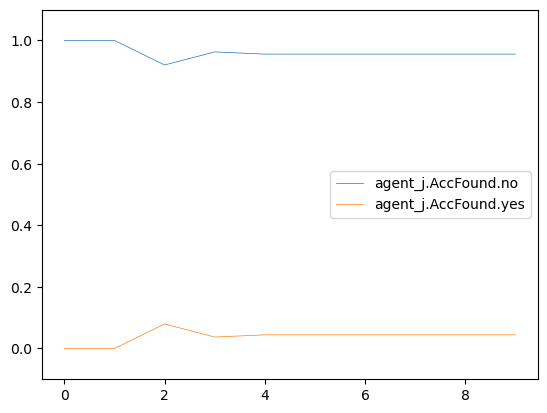

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action agent_j.action
0                   1.0                    0.0            Nop      FileRecon
1                   1.0                    0.0            Nop   EnumAccounts
2                   1.0                    0.0   DecoyAccount   EnumAccounts
3                   0.0                    1.0            Nop      FileRecon
4                   0.0                    1.0            Nop           Exit
5                   0.0                    1.0            Nop            Nop
6                   0.0                    1.0            Nop            Nop
7                   0.0                    1.0            Nop            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

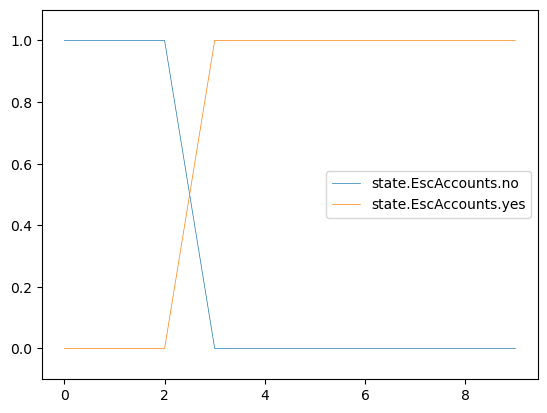

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0            Nop   
2                     1.0                      0.0   DecoyAccount   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2   EnumAccounts                   login_activity  
3      FileRecon                        file_enum  
4           Exit                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                   login_activity  
9            Nop                        file_enum

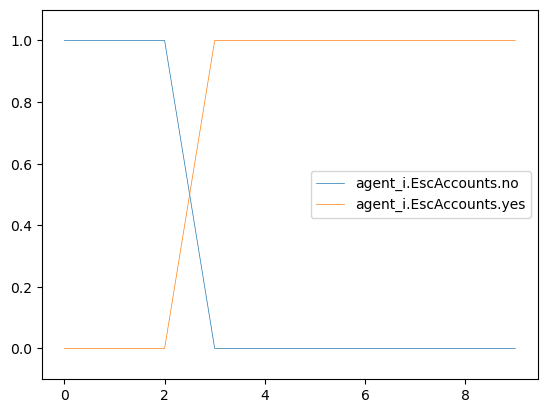

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                0.500000                 0.500000      FileRecon   
1                0.500000                 0.500000   EnumAccounts   
2                0.613636                 0.386364   EnumAccounts   
3                0.858350                 0.141650      FileRecon   
4                0.831053                 0.168947           Exit   
5                0.831053                 0.168947            Nop   
6                0.831053                 0.168947            Nop   
7                0.831053                 0.168947            Nop   
8                0.831053                 0.168947            Nop   
9                0.831053                 0.168947            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                   user_files   
2   DecoyAccount                   user_files   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           failure  
3                           failure  
4                           success  
5                           success  
6                           success  
7                           success  
8                           success  
9                           success

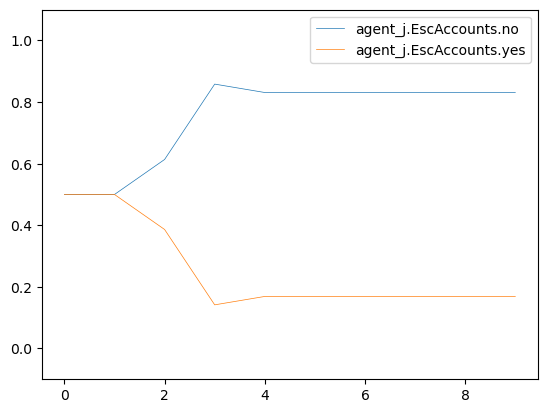

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action agent_j.action
0                   1.0                   0.0            Nop      FileRecon
1                   1.0                   0.0            Nop   EnumAccounts
2                   1.0                   0.0   DecoyAccount   EnumAccounts
3                   1.0                   0.0            Nop      FileRecon
4                   1.0                   0.0            Nop           Exit
5                   1.0                   0.0            Nop            Nop
6                   1.0                   0.0            Nop            Nop
7                   1.0                   0.0            Nop            Nop
8                   1.0                   0.0            Nop            Nop
9                   1.0                   0.0            Nop            Nop

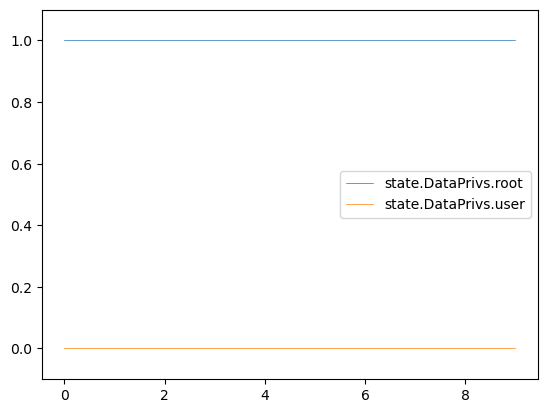

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0            Nop   
2                     1.0                     0.0   DecoyAccount   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2   EnumAccounts                   login_activity  
3      FileRecon                        file_enum  
4           Exit                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                   login_activity  
9            Nop                        file_enum

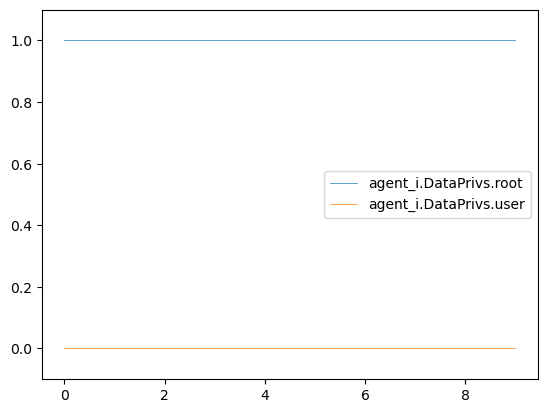

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                0.500000                0.500000      FileRecon   
1                0.592105                0.407895   EnumAccounts   
2                0.592105                0.407895   EnumAccounts   
3                0.592105                0.407895      FileRecon   
4                0.640620                0.359380           Exit   
5                0.640620                0.359380            Nop   
6                0.640620                0.359380            Nop   
7                0.640620                0.359380            Nop   
8                0.640620                0.359380            Nop   
9                0.640620                0.359380            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                   user_files   
2   DecoyAccount                   user_files   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           failure  
3                           failure  
4                           success  
5                           success  
6                           success  
7                           success  
8                           success  
9                           success

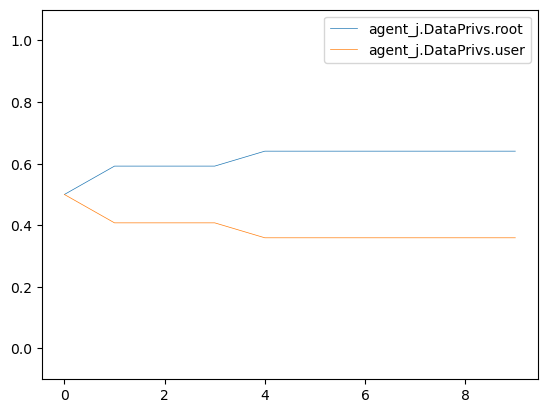

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action agent_j.action
0                   0.0                    1.0            Nop      FileRecon
1                   0.0                    1.0            Nop   EnumAccounts
2                   0.0                    1.0   DecoyAccount   EnumAccounts
3                   0.0                    1.0            Nop      FileRecon
4                   0.0                    1.0            Nop           Exit
5                   0.0                    1.0            Nop            Nop
6                   0.0                    1.0            Nop            Nop
7                   0.0                    1.0            Nop            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

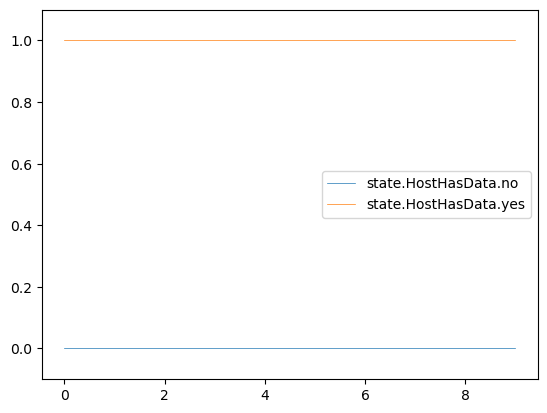

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0            Nop   
2                     0.0                      1.0   DecoyAccount   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2   EnumAccounts                   login_activity  
3      FileRecon                        file_enum  
4           Exit                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                   login_activity  
9            Nop                        file_enum

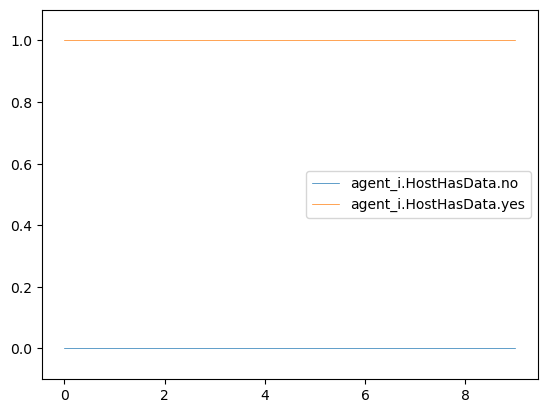

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                0.500000                 0.500000      FileRecon   
1                0.592105                 0.407895   EnumAccounts   
2                0.592105                 0.407895   EnumAccounts   
3                0.592105                 0.407895      FileRecon   
4                0.640620                 0.359380           Exit   
5                0.640620                 0.359380            Nop   
6                0.640620                 0.359380            Nop   
7                0.640620                 0.359380            Nop   
8                0.640620                 0.359380            Nop   
9                0.640620                 0.359380            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                   user_files   
2   DecoyAccount                   user_files   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           failure  
3                           failure  
4                           success  
5                           success  
6                           success  
7                           success  
8                           success  
9                           success

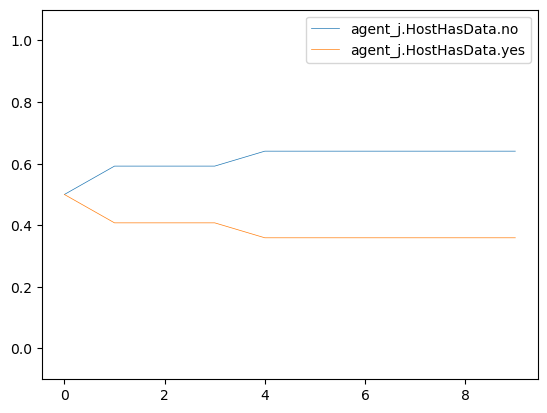

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                       file_write
3                               1.0                        file_enum
4                               1.0                   login_activity
5                               1.0                             none
6                               1.0                       file_write
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

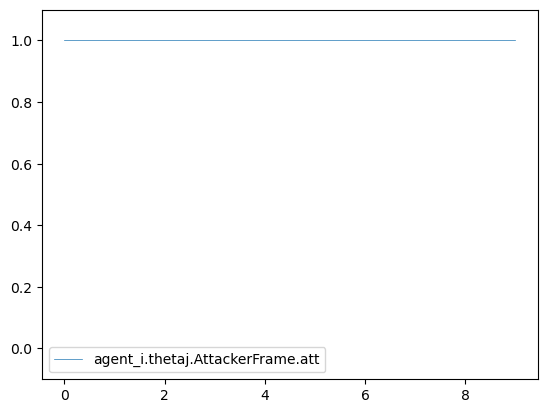

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.618685                        0.381315   
3                         0.565024                        0.434976   
4                         0.728085                        0.271915   
5                         0.801907                        0.198093   
6                         0.744647                        0.255353   
7                         0.744668                        0.255332   
8                         0.744668                        0.255332   
9                         0.744668                        0.255332   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                   user_files                           failure  
3                         none                           success  
4                         none                           success  
5                         none                           success  
6                         none                           success  
7                         none                           failure  
8                         none                           success  
9                   user_files                           failure

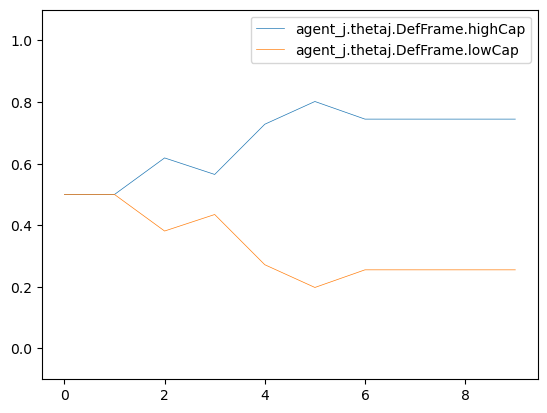

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action  agent_j.action
0                 1.0                  0.0            Nop       FileRecon
1                 1.0                  0.0            Nop    EnumAccounts
2                 1.0                  0.0   DecoyAccount      PrivEscAcc
3                 1.0                  0.0            Nop    EnumAccounts
4                 1.0                  0.0            Nop      PrivEscAcc
5                 1.0                  0.0            Nop       FileRecon
6                 0.0                  1.0            Nop  ManipulateData
7                 0.0                  1.0            Nop            Exit
8                 0.0                  1.0            Nop             Nop
9                 0.0                  1.0            Nop             Nop

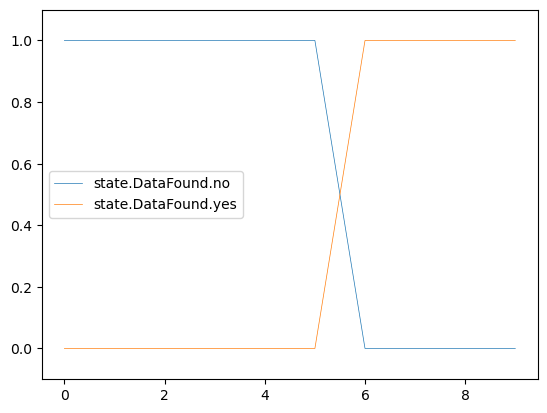

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action  agent_j.action  \
0              1.000000               0.000000            Nop       FileRecon   
1              1.000000               0.000000            Nop    EnumAccounts   
2              1.000000               0.000000   DecoyAccount      PrivEscAcc   
3              1.000000               0.000000            Nop    EnumAccounts   
4              1.000000               0.000000            Nop      PrivEscAcc   
5              0.940986               0.059014            Nop       FileRecon   
6              0.864542               0.135458            Nop  ManipulateData   
7              0.516142               0.483857            Nop            Exit   
8              0.513190               0.486810            Nop             Nop   
9              0.514132               0.485868            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                       file_write  
3                        file_enum  
4                   login_activity  
5                             none  
6                       file_write  
7                             none  
8                             none  
9                             none

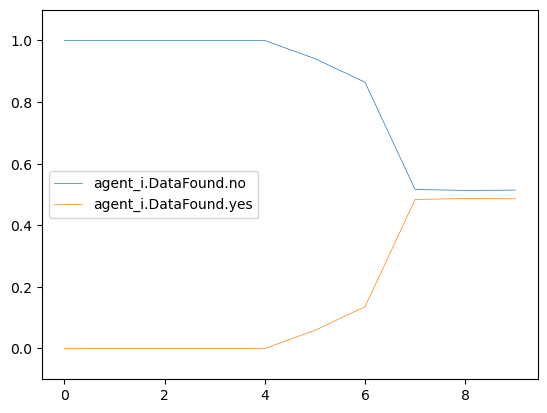

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action agent_i.action  \
0              1.000000               0.000000       FileRecon            Nop   
1              0.976974               0.023026    EnumAccounts            Nop   
2              0.976974               0.023026      PrivEscAcc   DecoyAccount   
3              0.976974               0.023026    EnumAccounts            Nop   
4              0.976974               0.023026      PrivEscAcc            Nop   
5              0.976974               0.023026       FileRecon            Nop   
6              0.211908               0.788092  ManipulateData            Nop   
7              0.000269               0.999731            Exit            Nop   
8              0.000269               0.999731             Nop            Nop   
9              0.000269               0.999731             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                   user_files                           failure  
3                         none                           success  
4                         none                           success  
5                         none                           success  
6                         none                           success  
7                         none                           failure  
8                         none                           success  
9                   user_files                           failure

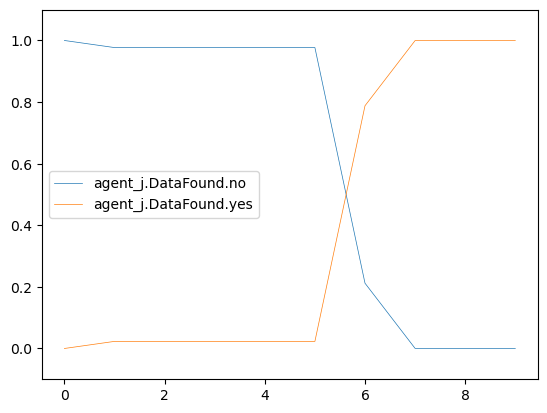

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action  \
0                    1.0                     0.0            Nop   
1                    1.0                     0.0            Nop   
2                    1.0                     0.0   DecoyAccount   
3                    1.0                     0.0            Nop   
4                    1.0                     0.0            Nop   
5                    1.0                     0.0            Nop   
6                    1.0                     0.0            Nop   
7                    0.0                     1.0            Nop   
8                    0.0                     1.0            Nop   
9                    0.0                     1.0            Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3    EnumAccounts  
4      PrivEscAcc  
5       FileRecon  
6  ManipulateData  
7            Exit  
8             Nop  
9             Nop

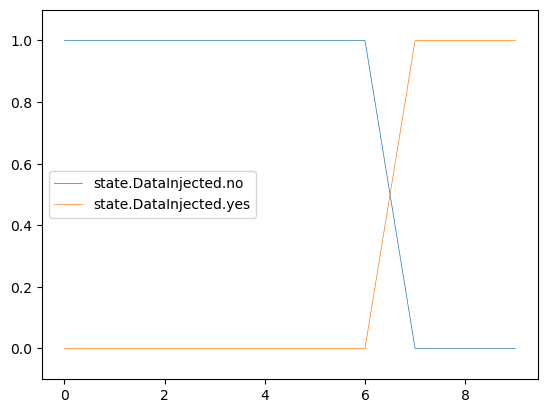

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                 1.000000                  0.000000            Nop   
1                 1.000000                  0.000000            Nop   
2                 1.000000                  0.000000   DecoyAccount   
3                 1.000000                  0.000000            Nop   
4                 1.000000                  0.000000            Nop   
5                 1.000000                  0.000000            Nop   
6                 0.983634                  0.016366            Nop   
7                 0.542501                  0.457499            Nop   
8                 0.516611                  0.483389            Nop   
9                 0.514496                  0.485504            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                       file_write  
3    EnumAccounts                        file_enum  
4      PrivEscAcc                   login_activity  
5       FileRecon                             none  
6  ManipulateData                       file_write  
7            Exit                             none  
8             Nop                             none  
9             Nop                             none

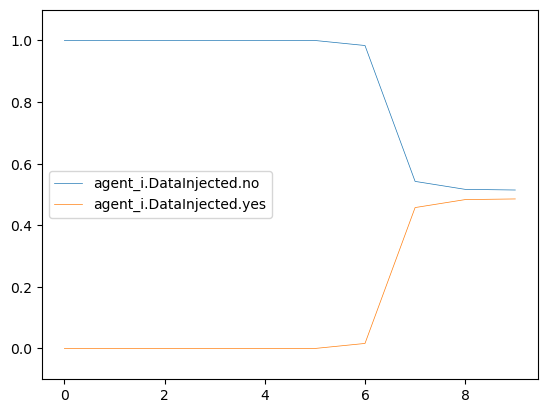

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000    EnumAccounts   
2                 1.000000                  0.000000      PrivEscAcc   
3                 1.000000                  0.000000    EnumAccounts   
4                 1.000000                  0.000000      PrivEscAcc   
5                 1.000000                  0.000000       FileRecon   
6                 1.000000                  0.000000  ManipulateData   
7                 0.000269                  0.999731            Exit   
8                 0.000269                  0.999731             Nop   
9                 0.000269                  0.999731             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2   DecoyAccount                   user_files   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           failure  
3                           success  
4                           success  
5                           success  
6                           success  
7                           failure  
8                           success  
9                           failure

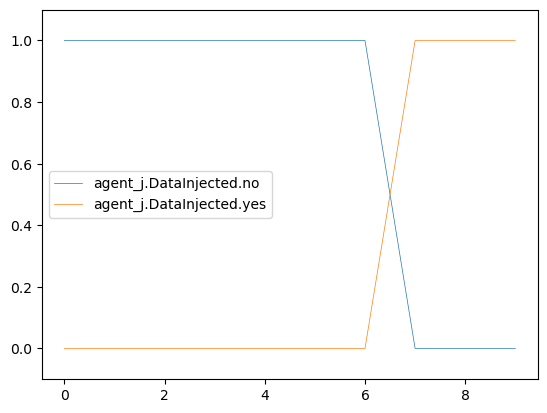

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0            Nop   
1                     0.0                     1.0            Nop   
2                     0.0                     1.0   DecoyAccount   
3                     0.0                     1.0            Nop   
4                     0.0                     1.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3    EnumAccounts  
4      PrivEscAcc  
5       FileRecon  
6  ManipulateData  
7            Exit  
8             Nop  
9             Nop

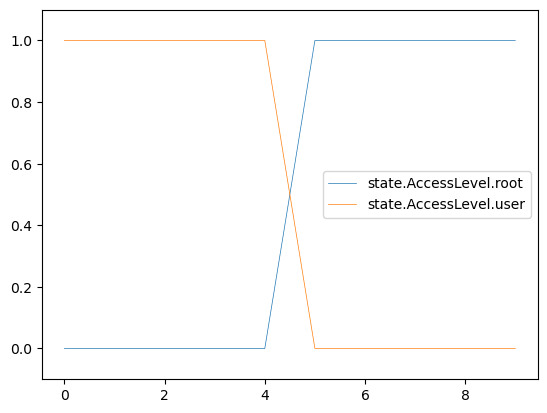

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                  0.000000                  1.000000            Nop   
1                  0.000000                  1.000000            Nop   
2                  0.000000                  1.000000   DecoyAccount   
3                  0.000000                  1.000000            Nop   
4                  0.158447                  0.841553            Nop   
5                  0.605459                  0.394541            Nop   
6                  0.187166                  0.812834            Nop   
7                  0.513959                  0.486041            Nop   
8                  0.489843                  0.510157            Nop   
9                  0.488002                  0.511999            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                       file_write  
3    EnumAccounts                        file_enum  
4      PrivEscAcc                   login_activity  
5       FileRecon                             none  
6  ManipulateData                       file_write  
7            Exit                             none  
8             Nop                             none  
9             Nop                             none

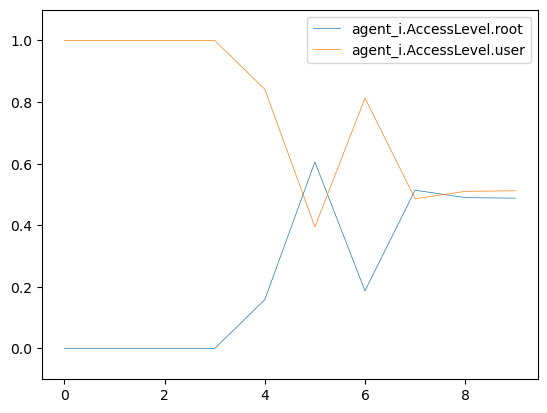

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000                  1.000000       FileRecon   
1                  0.000000                  1.000000    EnumAccounts   
2                  0.000000                  1.000000      PrivEscAcc   
3                  0.005648                  0.994352    EnumAccounts   
4                  0.014504                  0.985495      PrivEscAcc   
5                  0.999864                  0.000136       FileRecon   
6                  0.999914                  0.000086  ManipulateData   
7                  0.999950                  0.000050            Exit   
8                  0.999950                  0.000050             Nop   
9                  0.999950                  0.000050             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2   DecoyAccount                   user_files   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           failure  
3                           success  
4                           success  
5                           success  
6                           success  
7                           failure  
8                           success  
9                           failure

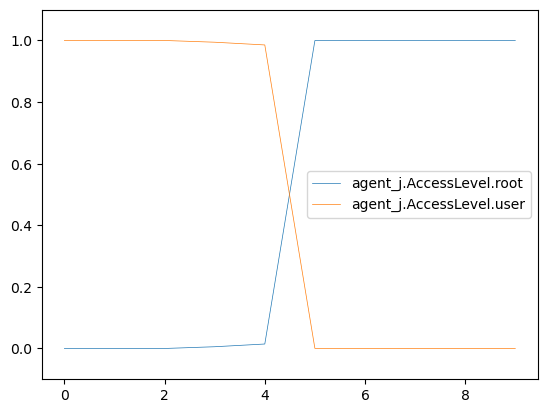

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action  agent_j.action
0                 0.0                  1.0            Nop       FileRecon
1                 0.0                  1.0            Nop    EnumAccounts
2                 0.0                  1.0   DecoyAccount      PrivEscAcc
3                 0.0                  1.0            Nop    EnumAccounts
4                 0.0                  1.0            Nop      PrivEscAcc
5                 0.0                  1.0            Nop       FileRecon
6                 0.0                  1.0            Nop  ManipulateData
7                 0.0                  1.0            Nop            Exit
8                 1.0                  0.0            Nop             Nop
9                 1.0                  0.0            Nop             Nop

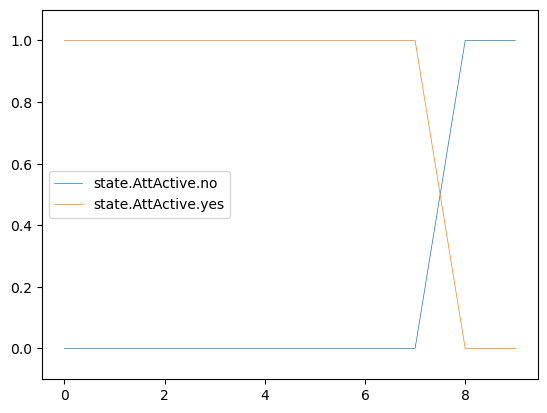

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action  agent_j.action  \
0              0.000000               1.000000            Nop       FileRecon   
1              0.000000               1.000000            Nop    EnumAccounts   
2              0.000000               1.000000   DecoyAccount      PrivEscAcc   
3              0.000016               0.999985            Nop    EnumAccounts   
4              0.006593               0.993407            Nop      PrivEscAcc   
5              0.305621               0.694379            Nop       FileRecon   
6              0.807168               0.192832            Nop  ManipulateData   
7              0.494465               0.505535            Nop            Exit   
8              0.991722               0.008278            Nop             Nop   
9              0.999398               0.000602            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                       file_write  
3                        file_enum  
4                   login_activity  
5                             none  
6                       file_write  
7                             none  
8                             none  
9                             none

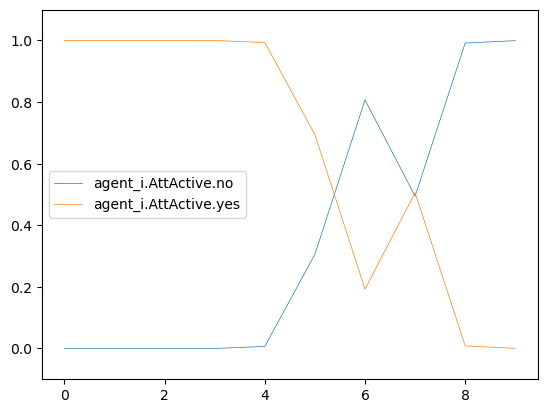

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action agent_i.action  \
0                   0.0                    1.0       FileRecon            Nop   
1                   0.0                    1.0    EnumAccounts            Nop   
2                   0.0                    1.0      PrivEscAcc   DecoyAccount   
3                   0.0                    1.0    EnumAccounts            Nop   
4                   0.0                    1.0      PrivEscAcc            Nop   
5                   0.0                    1.0       FileRecon            Nop   
6                   0.0                    1.0  ManipulateData            Nop   
7                   0.0                    1.0            Exit            Nop   
8                   1.0                    0.0             Nop            Nop   
9                   1.0                    0.0             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                   user_files                           failure  
3                         none                           success  
4                         none                           success  
5                         none                           success  
6                         none                           success  
7                         none                           failure  
8                         none                           success  
9                   user_files                           failure

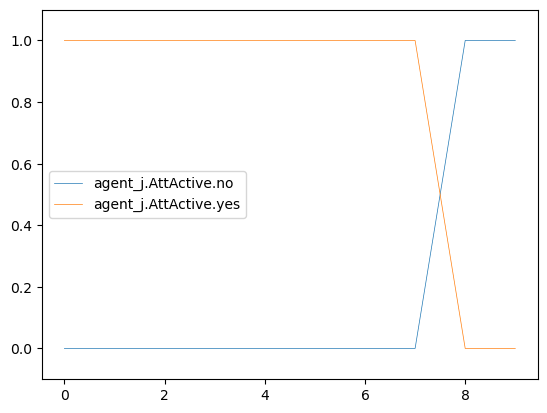

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action  agent_j.action  
0                      1.0            Nop       FileRecon  
1                      1.0            Nop    EnumAccounts  
2                      1.0   DecoyAccount      PrivEscAcc  
3                      1.0            Nop    EnumAccounts  
4                      1.0            Nop      PrivEscAcc  
5                      1.0            Nop       FileRecon  
6                      1.0            Nop  ManipulateData  
7                      1.0            Nop            Exit  
8                      1.0            Nop             Nop  
9                      1.0            Nop             Nop

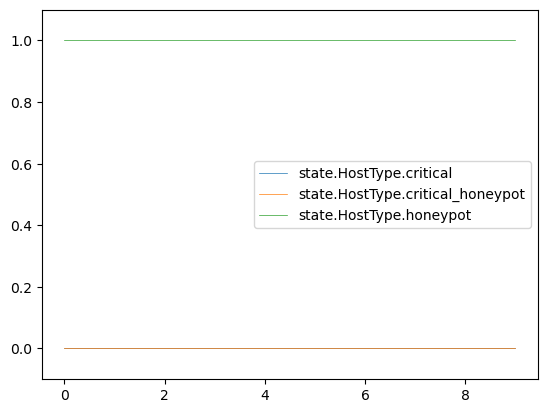

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action  agent_j.action  \
0                        1.0            Nop       FileRecon   
1                        1.0            Nop    EnumAccounts   
2                        1.0   DecoyAccount      PrivEscAcc   
3                        1.0            Nop    EnumAccounts   
4                        1.0            Nop      PrivEscAcc   
5                        1.0            Nop       FileRecon   
6                        1.0            Nop  ManipulateData   
7                        1.0            Nop            Exit   
8                        1.0            Nop             Nop   
9                        1.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                       file_write  
3                        file_enum  
4                   login_activity  
5                             none  
6                       file_write  
7                             none  
8                             none  
9                             none

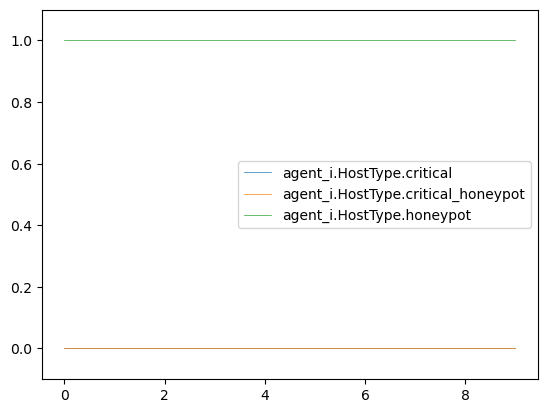

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                   0.500000                                 0.0   
1                   0.300000                                 0.0   
2                   0.118339                                 0.0   
3                   0.460185                                 0.0   
4                   0.409797                                 0.0   
5                   0.449275                                 0.0   
6                   0.259070                                 0.0   
7                   0.259077                                 0.0   
8                   0.259077                                 0.0   
9                   0.259077                                 0.0   

   agent_j.HostType.honeypot  agent_j.action agent_i.action  \
0                   0.500000       FileRecon            Nop   
1                   0.700000    EnumAccounts            Nop   
2                   0.881661      PrivEscAcc   DecoyAccount   
3                   0.539815    EnumAccounts            Nop   
4                   0.590203      PrivEscAcc            Nop   
5                   0.550725       FileRecon            Nop   
6                   0.740930  ManipulateData            Nop   
7                   0.740923            Exit            Nop   
8                   0.740923             Nop            Nop   
9                   0.740923             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                   user_files                           failure  
3                         none                           success  
4                         none                           success  
5                         none                           success  
6                         none                           success  
7                         none                           failure  
8                         none                           success  
9                   user_files                           failure

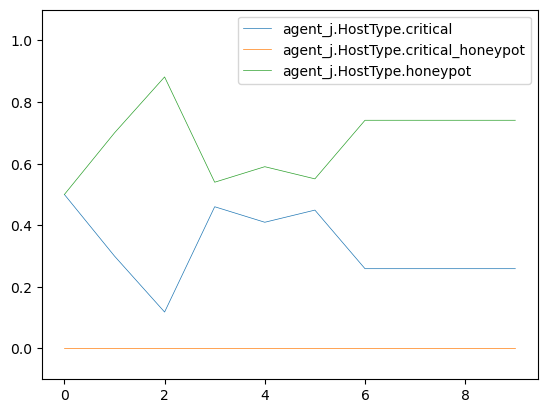

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action  agent_j.action
0                1.0                 0.0            Nop       FileRecon
1                1.0                 0.0            Nop    EnumAccounts
2                1.0                 0.0   DecoyAccount      PrivEscAcc
3                1.0                 0.0            Nop    EnumAccounts
4                0.0                 1.0            Nop      PrivEscAcc
5                0.0                 1.0            Nop       FileRecon
6                0.0                 1.0            Nop  ManipulateData
7                0.0                 1.0            Nop            Exit
8                0.0                 1.0            Nop             Nop
9                0.0                 1.0            Nop             Nop

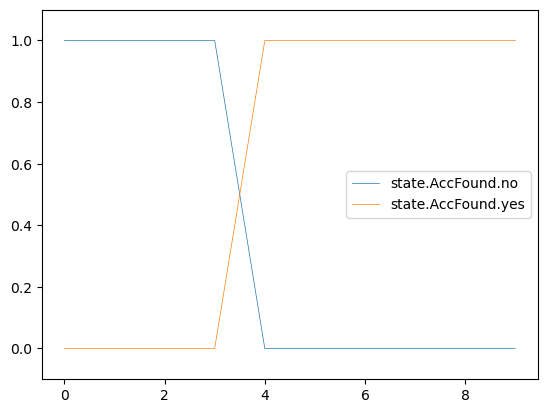

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action  agent_j.action  \
0             1.000000              0.000000            Nop       FileRecon   
1             1.000000              0.000000            Nop    EnumAccounts   
2             1.000000              0.000000   DecoyAccount      PrivEscAcc   
3             0.424731              0.575269            Nop    EnumAccounts   
4             0.564979              0.435021            Nop      PrivEscAcc   
5             0.321613              0.678387            Nop       FileRecon   
6             0.655968              0.344032            Nop  ManipulateData   
7             0.392892              0.607107            Nop            Exit   
8             0.412399              0.587601            Nop             Nop   
9             0.413888              0.586112            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                       file_write  
3                        file_enum  
4                   login_activity  
5                             none  
6                       file_write  
7                             none  
8                             none  
9                             none

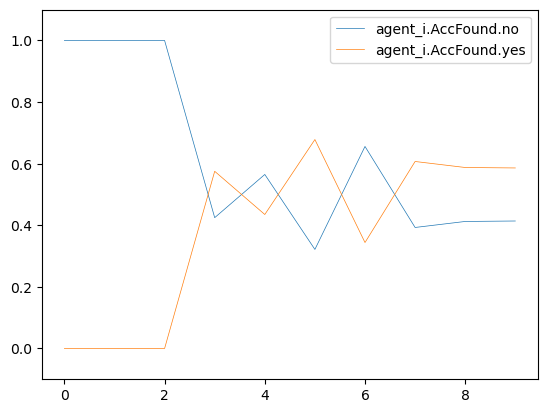

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action agent_i.action  \
0             1.000000              0.000000       FileRecon            Nop   
1             1.000000              0.000000    EnumAccounts            Nop   
2             0.100779              0.899222      PrivEscAcc   DecoyAccount   
3             0.668834              0.331166    EnumAccounts            Nop   
4             0.119663              0.880336      PrivEscAcc            Nop   
5             0.000136              0.999864       FileRecon            Nop   
6             0.000086              0.999914  ManipulateData            Nop   
7             0.000050              0.999950            Exit            Nop   
8             0.000050              0.999950             Nop            Nop   
9             0.000050              0.999950             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           success  
2                   user_files                           failure  
3                         none                           success  
4                         none                           success  
5                         none                           success  
6                         none                           success  
7                         none                           failure  
8                         none                           success  
9                   user_files                           failure

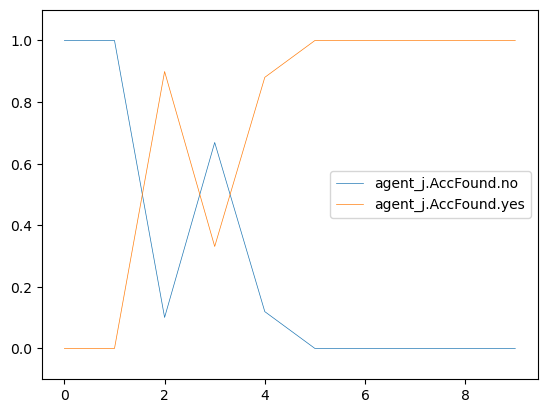

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action  agent_j.action
0                   1.0                    0.0            Nop       FileRecon
1                   1.0                    0.0            Nop    EnumAccounts
2                   1.0                    0.0   DecoyAccount      PrivEscAcc
3                   0.0                    1.0            Nop    EnumAccounts
4                   0.0                    1.0            Nop      PrivEscAcc
5                   0.0                    1.0            Nop       FileRecon
6                   0.0                    1.0            Nop  ManipulateData
7                   0.0                    1.0            Nop            Exit
8                   0.0                    1.0            Nop             Nop
9                   0.0                    1.0            Nop             Nop

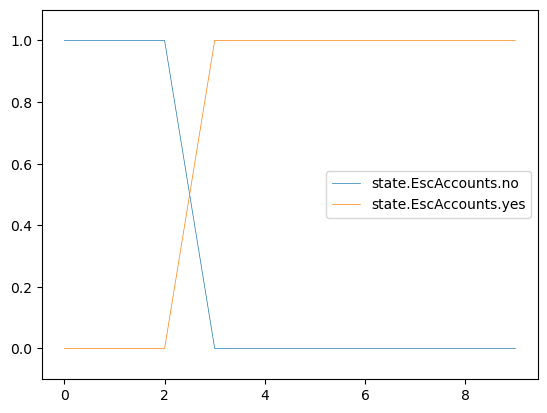

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0            Nop   
2                     1.0                      0.0   DecoyAccount   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                       file_write  
3    EnumAccounts                        file_enum  
4      PrivEscAcc                   login_activity  
5       FileRecon                             none  
6  ManipulateData                       file_write  
7            Exit                             none  
8             Nop                             none  
9             Nop                             none

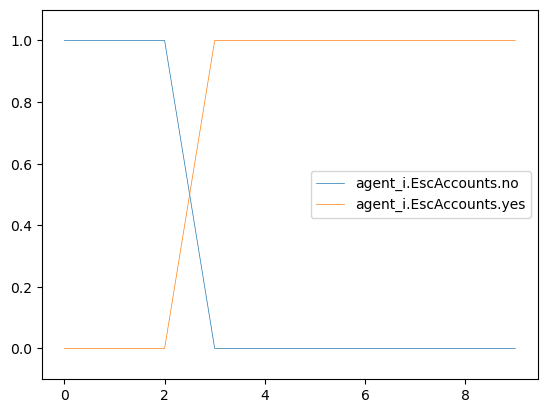

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.500000                 0.500000    EnumAccounts   
2                0.057958                 0.942042      PrivEscAcc   
3                0.384651                 0.615349    EnumAccounts   
4                0.096075                 0.903925      PrivEscAcc   
5                0.000109                 0.999891       FileRecon   
6                0.000068                 0.999932  ManipulateData   
7                0.000040                 0.999961            Exit   
8                0.000040                 0.999961             Nop   
9                0.000040                 0.999961             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2   DecoyAccount                   user_files   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           failure  
3                           success  
4                           success  
5                           success  
6                           success  
7                           failure  
8                           success  
9                           failure

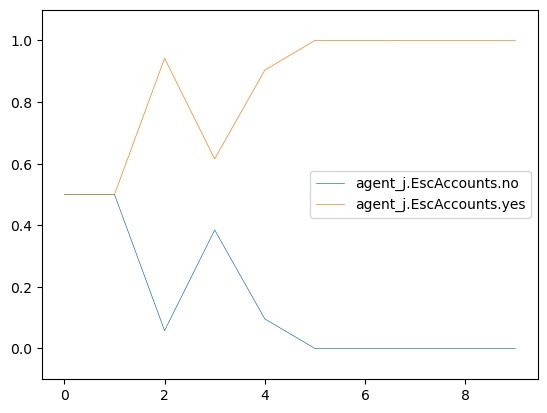

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action  agent_j.action
0                   1.0                   0.0            Nop       FileRecon
1                   1.0                   0.0            Nop    EnumAccounts
2                   1.0                   0.0   DecoyAccount      PrivEscAcc
3                   1.0                   0.0            Nop    EnumAccounts
4                   1.0                   0.0            Nop      PrivEscAcc
5                   1.0                   0.0            Nop       FileRecon
6                   1.0                   0.0            Nop  ManipulateData
7                   1.0                   0.0            Nop            Exit
8                   1.0                   0.0            Nop             Nop
9                   1.0                   0.0            Nop             Nop

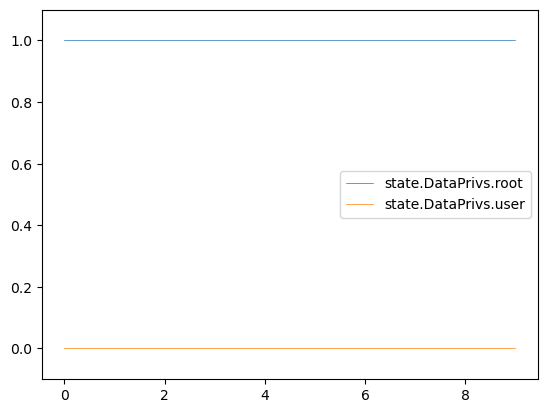

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0            Nop   
2                     1.0                     0.0   DecoyAccount   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                       file_write  
3    EnumAccounts                        file_enum  
4      PrivEscAcc                   login_activity  
5       FileRecon                             none  
6  ManipulateData                       file_write  
7            Exit                             none  
8             Nop                             none  
9             Nop                             none

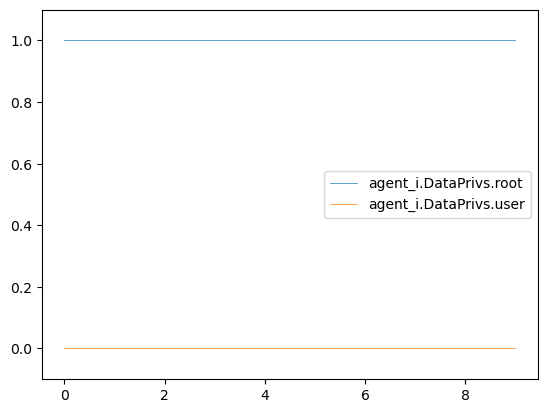

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000       FileRecon   
1                0.592105                0.407895    EnumAccounts   
2                0.592105                0.407895      PrivEscAcc   
3                0.592105                0.407895    EnumAccounts   
4                0.592105                0.407895      PrivEscAcc   
5                0.592105                0.407895       FileRecon   
6                0.673731                0.326269  ManipulateData   
7                0.708582                0.291418            Exit   
8                0.708582                0.291418             Nop   
9                0.708582                0.291418             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2   DecoyAccount                   user_files   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           failure  
3                           success  
4                           success  
5                           success  
6                           success  
7                           failure  
8                           success  
9                           failure

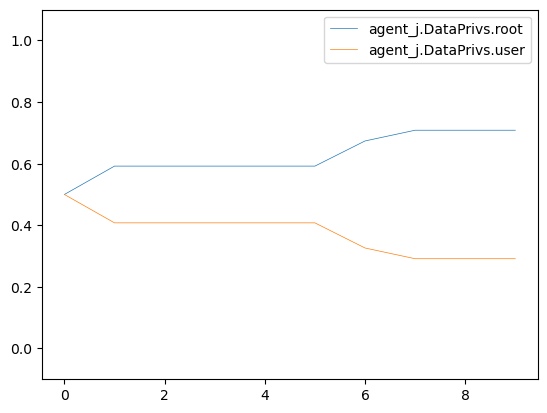

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action  agent_j.action
0                   0.0                    1.0            Nop       FileRecon
1                   0.0                    1.0            Nop    EnumAccounts
2                   0.0                    1.0   DecoyAccount      PrivEscAcc
3                   0.0                    1.0            Nop    EnumAccounts
4                   0.0                    1.0            Nop      PrivEscAcc
5                   0.0                    1.0            Nop       FileRecon
6                   0.0                    1.0            Nop  ManipulateData
7                   0.0                    1.0            Nop            Exit
8                   0.0                    1.0            Nop             Nop
9                   0.0                    1.0            Nop             Nop

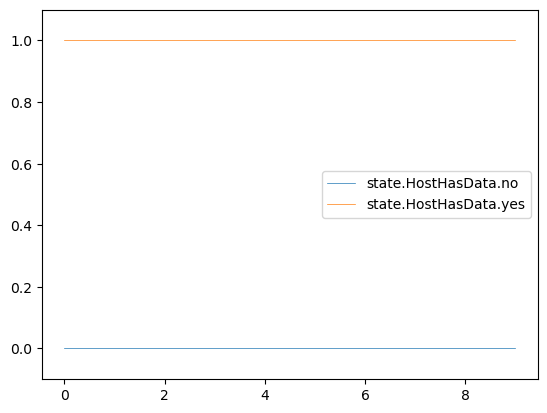

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0            Nop   
2                     0.0                      1.0   DecoyAccount   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                       file_write  
3    EnumAccounts                        file_enum  
4      PrivEscAcc                   login_activity  
5       FileRecon                             none  
6  ManipulateData                       file_write  
7            Exit                             none  
8             Nop                             none  
9             Nop                             none

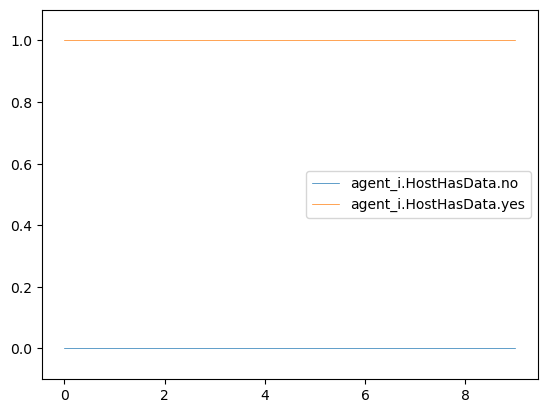

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.592105                 0.407895    EnumAccounts   
2                0.592105                 0.407895      PrivEscAcc   
3                0.592105                 0.407895    EnumAccounts   
4                0.592105                 0.407895      PrivEscAcc   
5                0.592105                 0.407895       FileRecon   
6                0.177320                 0.822680  ManipulateData   
7                0.000225                 0.999775            Exit   
8                0.000225                 0.999775             Nop   
9                0.000225                 0.999775             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2   DecoyAccount                   user_files   
3            Nop                         none   
4            Nop                         none   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           success  
2                           failure  
3                           success  
4                           success  
5                           success  
6                           success  
7                           failure  
8                           success  
9                           failure

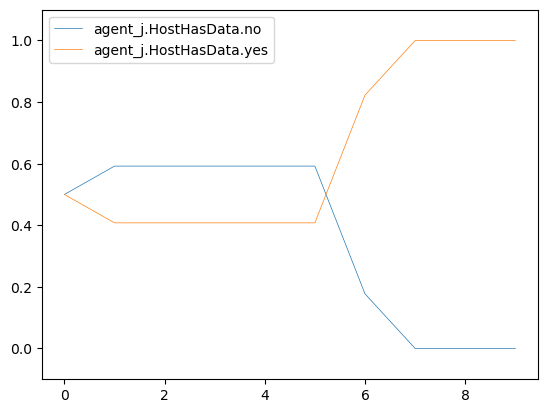

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                        file_enum
3                               1.0                   login_activity
4                               1.0                             none
5                               1.0                             none
6                               1.0                             none
7                               1.0                             none
8                               1.0                       file_write
9                               1.0                             none

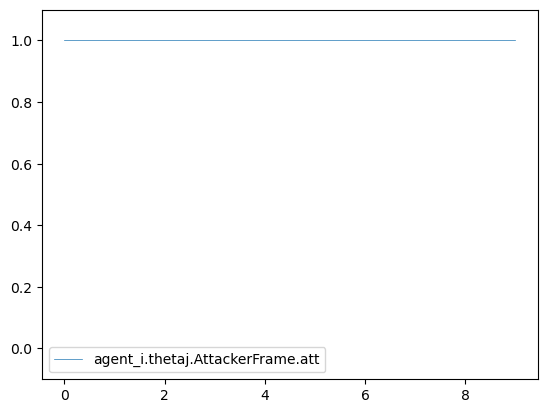

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.481844                        0.518156   
3                         0.491623                        0.508377   
4                         0.491623                        0.508377   
5                         0.491623                        0.508377   
6                         0.491623                        0.508377   
7                         0.491623                        0.508377   
8                         0.491623                        0.508377   
9                         0.491623                        0.508377   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                   user_files                           failure  
1                   user_files                           failure  
2                   user_files                           failure  
3                         none                           failure  
4                   user_files                           failure  
5                         none                           success  
6                   user_files                           failure  
7                   user_files                           success  
8                   user_files                           success  
9                         none                           success

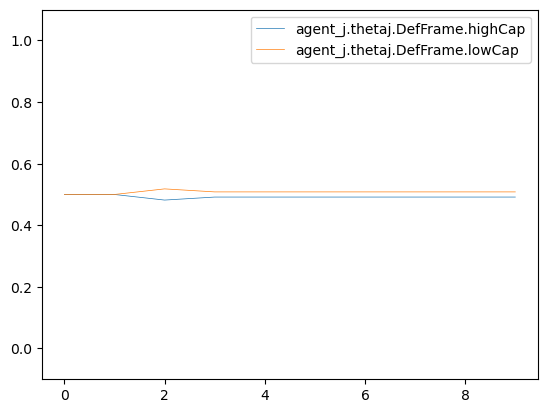

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action agent_j.action
0                 1.0                  0.0            Nop      FileRecon
1                 1.0                  0.0            Nop   EnumAccounts
2                 1.0                  0.0   DecoyAccount      FileRecon
3                 1.0                  0.0            Nop           Exit
4                 1.0                  0.0            Nop            Nop
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

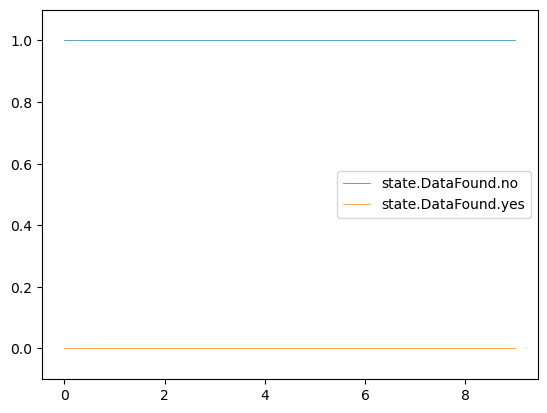

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action agent_j.action  \
0              1.000000               0.000000            Nop      FileRecon   
1              1.000000               0.000000            Nop   EnumAccounts   
2              1.000000               0.000000   DecoyAccount      FileRecon   
3              1.000000               0.000000            Nop           Exit   
4              1.000000               0.000000            Nop            Nop   
5              0.575305               0.424695            Nop            Nop   
6              0.833551               0.166449            Nop            Nop   
7              0.865801               0.134199            Nop            Nop   
8              0.867678               0.132322            Nop            Nop   
9              0.867445               0.132555            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                        file_enum  
3                   login_activity  
4                             none  
5                             none  
6                             none  
7                             none  
8                       file_write  
9                             none

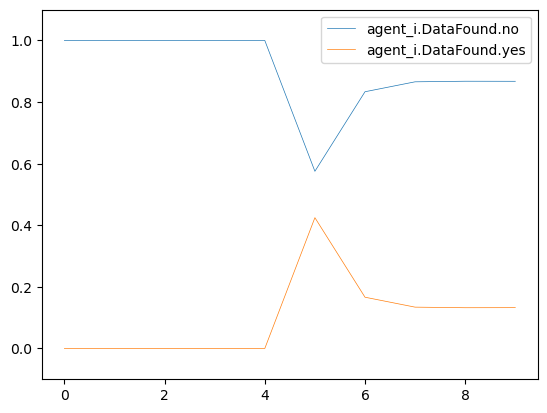

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action agent_i.action  \
0              1.000000               0.000000      FileRecon            Nop   
1              0.976974               0.023026   EnumAccounts            Nop   
2              0.976974               0.023026      FileRecon   DecoyAccount   
3              0.989758               0.010242           Exit            Nop   
4              0.989758               0.010242            Nop            Nop   
5              0.989758               0.010242            Nop            Nop   
6              0.989758               0.010242            Nop            Nop   
7              0.989758               0.010242            Nop            Nop   
8              0.989758               0.010242            Nop            Nop   
9              0.989758               0.010242            Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                   user_files                           failure  
1                   user_files                           failure  
2                   user_files                           failure  
3                         none                           failure  
4                   user_files                           failure  
5                         none                           success  
6                   user_files                           failure  
7                   user_files                           success  
8                   user_files                           success  
9                         none                           success

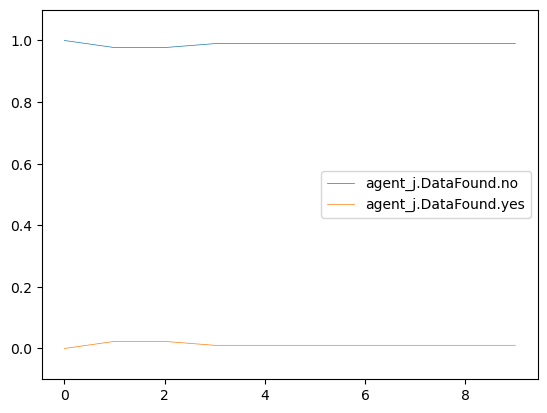

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action agent_j.action
0                    1.0                     0.0            Nop      FileRecon
1                    1.0                     0.0            Nop   EnumAccounts
2                    1.0                     0.0   DecoyAccount      FileRecon
3                    1.0                     0.0            Nop           Exit
4                    1.0                     0.0            Nop            Nop
5                    1.0                     0.0            Nop            Nop
6                    1.0                     0.0            Nop            Nop
7                    1.0                     0.0            Nop            Nop
8                    1.0                     0.0            Nop            Nop
9                    1.0                     0.0            Nop            Nop

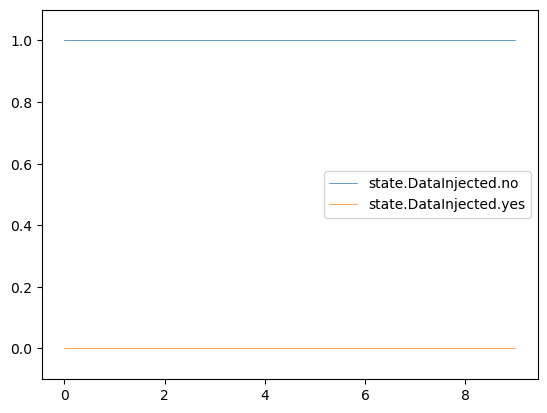

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                 1.000000                  0.000000            Nop   
1                 1.000000                  0.000000            Nop   
2                 1.000000                  0.000000   DecoyAccount   
3                 1.000000                  0.000000            Nop   
4                 1.000000                  0.000000            Nop   
5                 1.000000                  0.000000            Nop   
6                 0.883072                  0.116928            Nop   
7                 0.868745                  0.131255            Nop   
8                 0.868040                  0.131960            Nop   
9                 0.867767                  0.132233            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2      FileRecon                        file_enum  
3           Exit                   login_activity  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                       file_write  
9            Nop                             none

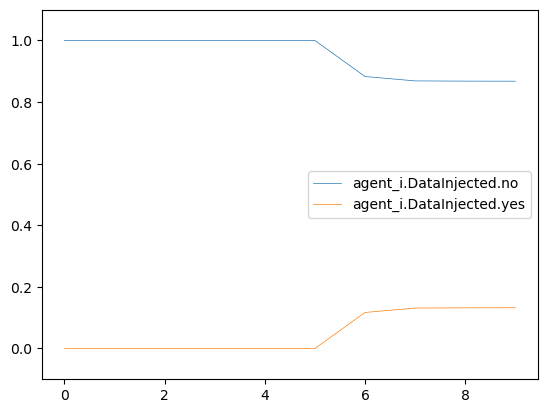

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                      1.0                       0.0      FileRecon   
1                      1.0                       0.0   EnumAccounts   
2                      1.0                       0.0      FileRecon   
3                      1.0                       0.0           Exit   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1            Nop                   user_files   
2   DecoyAccount                   user_files   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           failure  
3                           failure  
4                           failure  
5                           success  
6                           failure  
7                           success  
8                           success  
9                           success

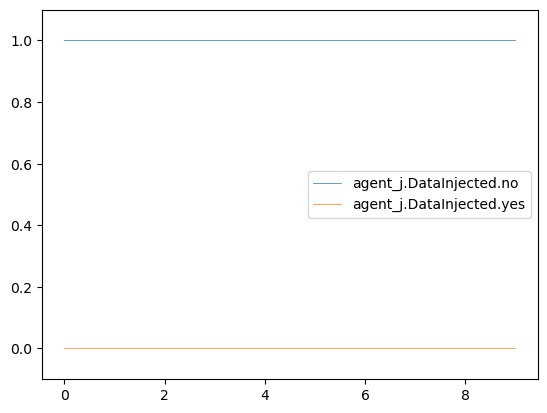

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0            Nop   
1                     0.0                     1.0            Nop   
2                     0.0                     1.0   DecoyAccount   
3                     0.0                     1.0            Nop   
4                     0.0                     1.0            Nop   
5                     0.0                     1.0            Nop   
6                     0.0                     1.0            Nop   
7                     0.0                     1.0            Nop   
8                     0.0                     1.0            Nop   
9                     0.0                     1.0            Nop   

  agent_j.action  
0      FileRecon  
1   EnumAccounts  
2      FileRecon  
3           Exit  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

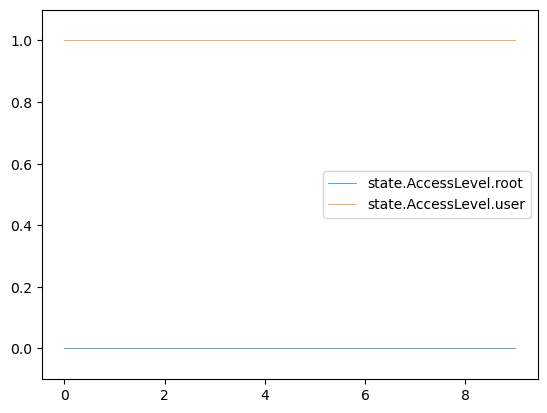

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                  0.000000                  1.000000            Nop   
1                  0.000000                  1.000000            Nop   
2                  0.000000                  1.000000   DecoyAccount   
3                  0.000000                  1.000000            Nop   
4                  0.860245                  0.139755            Nop   
5                  0.613296                  0.386704            Nop   
6                  0.188059                  0.811941            Nop   
7                  0.135854                  0.864146            Nop   
8                  0.133531                  0.866469            Nop   
9                  0.133769                  0.866231            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2      FileRecon                        file_enum  
3           Exit                   login_activity  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                       file_write  
9            Nop                             none

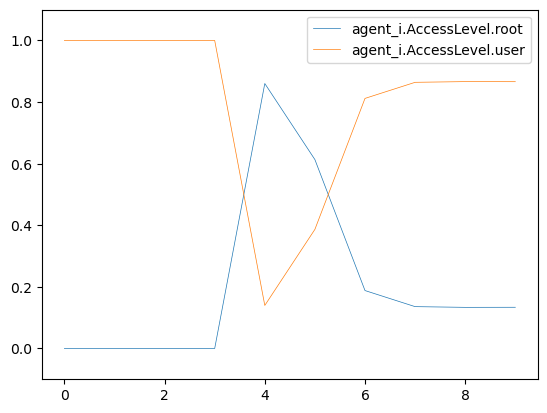

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                       0.0                       1.0      FileRecon   
1                       0.0                       1.0   EnumAccounts   
2                       0.0                       1.0      FileRecon   
3                       0.0                       1.0           Exit   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1            Nop                   user_files   
2   DecoyAccount                   user_files   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           failure  
3                           failure  
4                           failure  
5                           success  
6                           failure  
7                           success  
8                           success  
9                           success

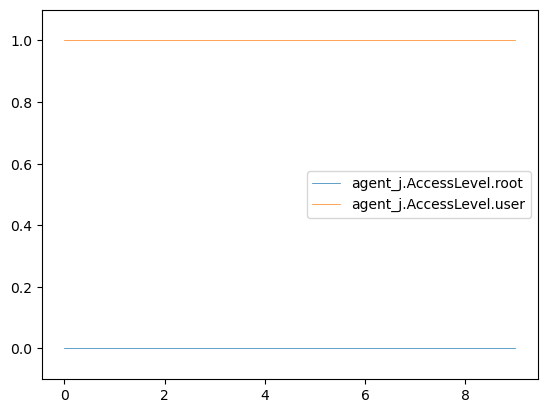

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action agent_j.action
0                 0.0                  1.0            Nop      FileRecon
1                 0.0                  1.0            Nop   EnumAccounts
2                 0.0                  1.0   DecoyAccount      FileRecon
3                 0.0                  1.0            Nop           Exit
4                 1.0                  0.0            Nop            Nop
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

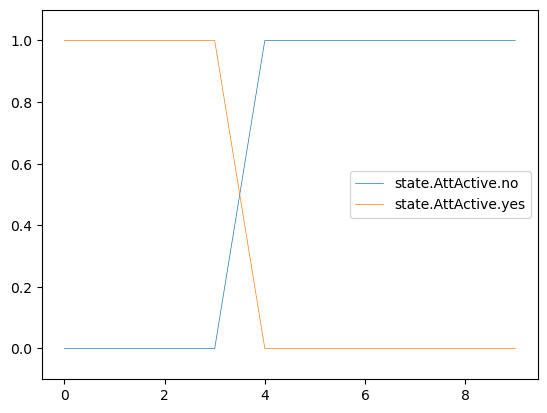

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action agent_j.action  \
0              0.000000               1.000000            Nop      FileRecon   
1              0.000000               1.000000            Nop   EnumAccounts   
2              0.000000               1.000000   DecoyAccount      FileRecon   
3              0.000002               0.999998            Nop           Exit   
4              0.005111               0.994890            Nop            Nop   
5              0.343834               0.656166            Nop            Nop   
6              0.809767               0.190233            Nop            Nop   
7              0.989080               0.010920            Nop            Nop   
8              0.999551               0.000449            Nop            Nop   
9              0.999672               0.000328            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                        file_enum  
3                   login_activity  
4                             none  
5                             none  
6                             none  
7                             none  
8                       file_write  
9                             none

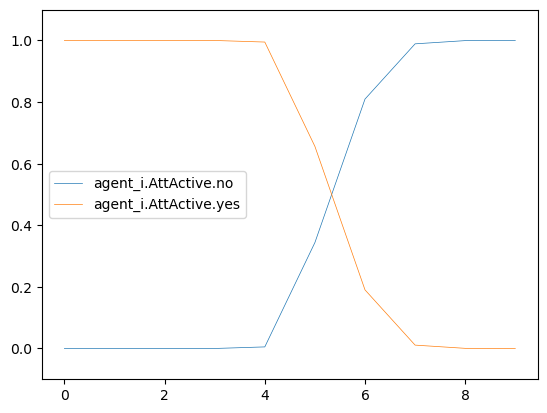

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action agent_i.action  \
0                   0.0                    1.0      FileRecon            Nop   
1                   0.0                    1.0   EnumAccounts            Nop   
2                   0.0                    1.0      FileRecon   DecoyAccount   
3                   0.0                    1.0           Exit            Nop   
4                   1.0                    0.0            Nop            Nop   
5                   1.0                    0.0            Nop            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                   user_files                           failure  
1                   user_files                           failure  
2                   user_files                           failure  
3                         none                           failure  
4                   user_files                           failure  
5                         none                           success  
6                   user_files                           failure  
7                   user_files                           success  
8                   user_files                           success  
9                         none                           success

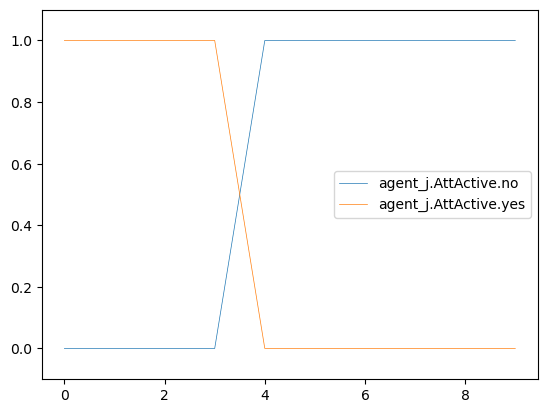

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action agent_j.action  
0                      1.0            Nop      FileRecon  
1                      1.0            Nop   EnumAccounts  
2                      1.0   DecoyAccount      FileRecon  
3                      1.0            Nop           Exit  
4                      1.0            Nop            Nop  
5                      1.0            Nop            Nop  
6                      1.0            Nop            Nop  
7                      1.0            Nop            Nop  
8                      1.0            Nop            Nop  
9                      1.0            Nop            Nop

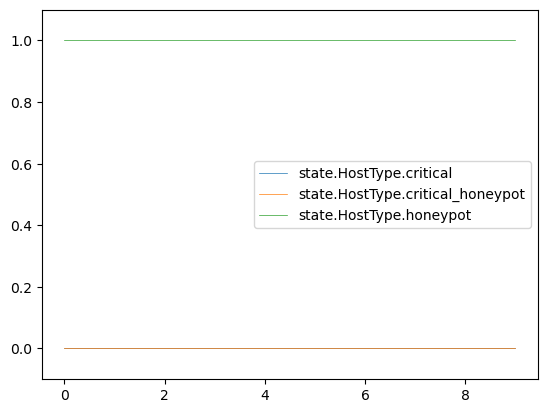

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action agent_j.action  \
0                        1.0            Nop      FileRecon   
1                        1.0            Nop   EnumAccounts   
2                        1.0   DecoyAccount      FileRecon   
3                        1.0            Nop           Exit   
4                        1.0            Nop            Nop   
5                        1.0            Nop            Nop   
6                        1.0            Nop            Nop   
7                        1.0            Nop            Nop   
8                        1.0            Nop            Nop   
9                        1.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                        file_enum  
3                   login_activity  
4                             none  
5                             none  
6                             none  
7                             none  
8                       file_write  
9                             none

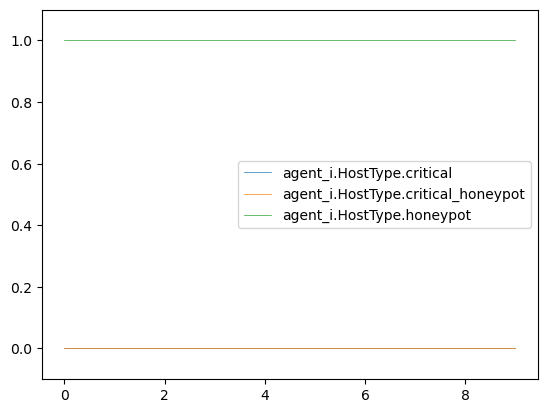

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                   0.500000                                 0.0   
1                   0.700000                                 0.0   
2                   0.875504                                 0.0   
3                   0.942558                                 0.0   
4                   0.942558                                 0.0   
5                   0.942558                                 0.0   
6                   0.942558                                 0.0   
7                   0.942558                                 0.0   
8                   0.942558                                 0.0   
9                   0.942558                                 0.0   

   agent_j.HostType.honeypot agent_j.action agent_i.action  \
0                   0.500000      FileRecon            Nop   
1                   0.300000   EnumAccounts            Nop   
2                   0.124496      FileRecon   DecoyAccount   
3                   0.057442           Exit            Nop   
4                   0.057442            Nop            Nop   
5                   0.057442            Nop            Nop   
6                   0.057442            Nop            Nop   
7                   0.057442            Nop            Nop   
8                   0.057442            Nop            Nop   
9                   0.057442            Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                   user_files                           failure  
1                   user_files                           failure  
2                   user_files                           failure  
3                         none                           failure  
4                   user_files                           failure  
5                         none                           success  
6                   user_files                           failure  
7                   user_files                           success  
8                   user_files                           success  
9                         none                           success

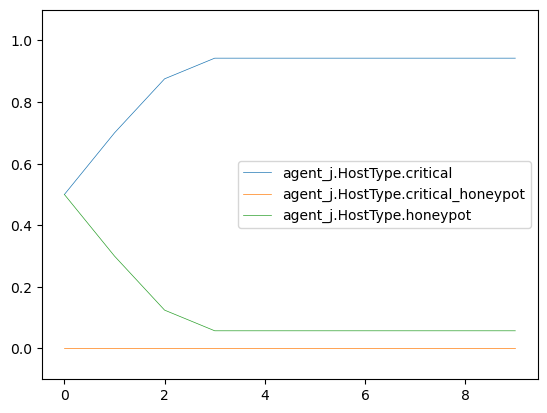

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action agent_j.action
0                1.0                 0.0            Nop      FileRecon
1                1.0                 0.0            Nop   EnumAccounts
2                1.0                 0.0   DecoyAccount      FileRecon
3                1.0                 0.0            Nop           Exit
4                1.0                 0.0            Nop            Nop
5                1.0                 0.0            Nop            Nop
6                1.0                 0.0            Nop            Nop
7                1.0                 0.0            Nop            Nop
8                1.0                 0.0            Nop            Nop
9                1.0                 0.0            Nop            Nop

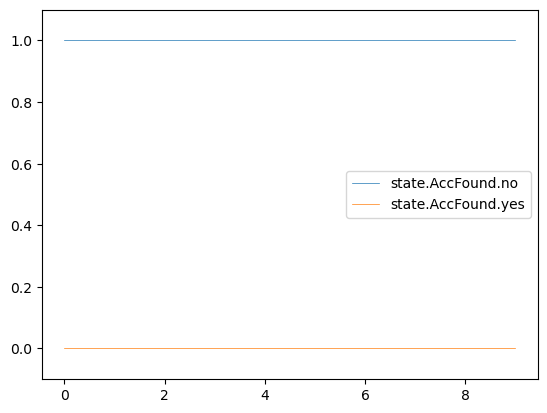

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action agent_j.action  \
0             1.000000              0.000000            Nop      FileRecon   
1             1.000000              0.000000            Nop   EnumAccounts   
2             1.000000              0.000000   DecoyAccount      FileRecon   
3             0.371711              0.628289            Nop           Exit   
4             0.115973              0.884027            Nop            Nop   
5             0.321717              0.678282            Nop            Nop   
6             0.672345              0.327655            Nop            Nop   
7             0.716292              0.283708            Nop            Nop   
8             0.718222              0.281778            Nop            Nop   
9             0.718024              0.281976            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                        file_enum  
3                   login_activity  
4                             none  
5                             none  
6                             none  
7                             none  
8                       file_write  
9                             none

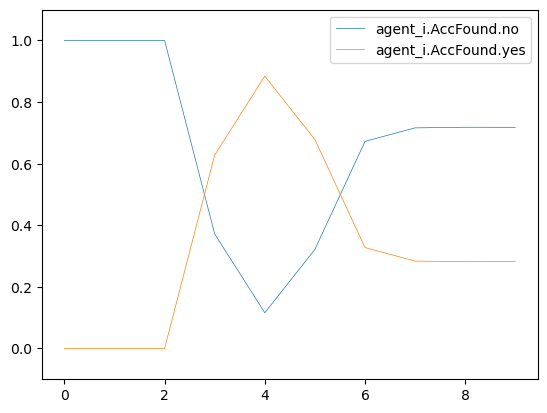

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action agent_i.action  \
0             1.000000              0.000000      FileRecon            Nop   
1             1.000000              0.000000   EnumAccounts            Nop   
2             0.936960              0.063040      FileRecon   DecoyAccount   
3             0.940508              0.059492           Exit            Nop   
4             0.940508              0.059492            Nop            Nop   
5             0.940508              0.059492            Nop            Nop   
6             0.940508              0.059492            Nop            Nop   
7             0.940508              0.059492            Nop            Nop   
8             0.940508              0.059492            Nop            Nop   
9             0.940508              0.059492            Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                   user_files                           failure  
1                   user_files                           failure  
2                   user_files                           failure  
3                         none                           failure  
4                   user_files                           failure  
5                         none                           success  
6                   user_files                           failure  
7                   user_files                           success  
8                   user_files                           success  
9                         none                           success

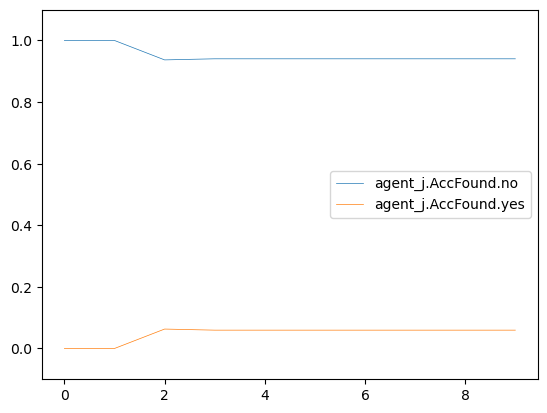

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action agent_j.action
0                   1.0                    0.0            Nop      FileRecon
1                   1.0                    0.0            Nop   EnumAccounts
2                   1.0                    0.0   DecoyAccount      FileRecon
3                   0.0                    1.0            Nop           Exit
4                   0.0                    1.0            Nop            Nop
5                   0.0                    1.0            Nop            Nop
6                   0.0                    1.0            Nop            Nop
7                   0.0                    1.0            Nop            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

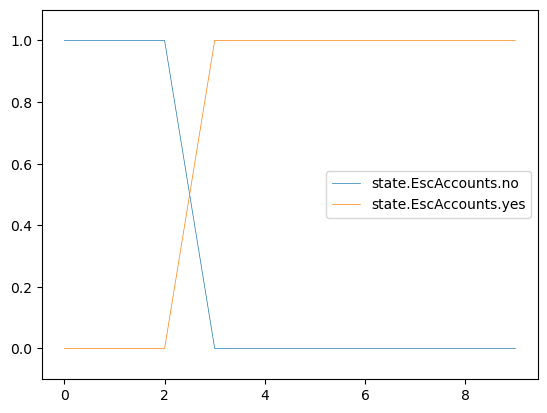

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0            Nop   
2                     1.0                      0.0   DecoyAccount   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2      FileRecon                        file_enum  
3           Exit                   login_activity  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                       file_write  
9            Nop                             none

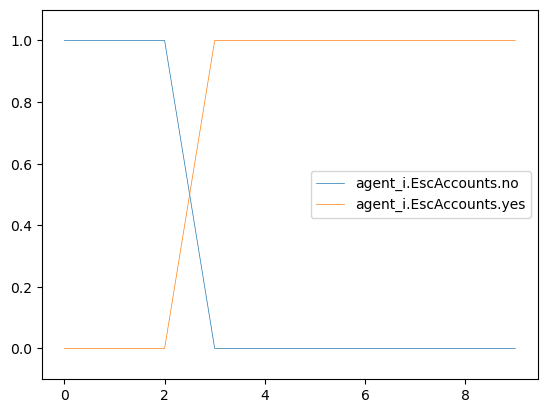

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                0.500000                 0.500000      FileRecon   
1                0.500000                 0.500000   EnumAccounts   
2                0.693804                 0.306196      FileRecon   
3                0.711041                 0.288959           Exit   
4                0.711041                 0.288959            Nop   
5                0.711041                 0.288959            Nop   
6                0.711041                 0.288959            Nop   
7                0.711041                 0.288959            Nop   
8                0.711041                 0.288959            Nop   
9                0.711041                 0.288959            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1            Nop                   user_files   
2   DecoyAccount                   user_files   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           failure  
3                           failure  
4                           failure  
5                           success  
6                           failure  
7                           success  
8                           success  
9                           success

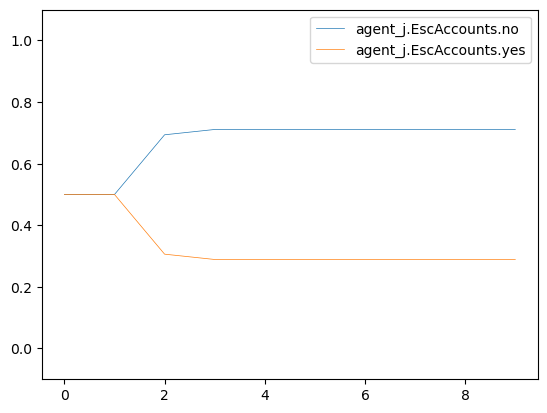

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action agent_j.action
0                   1.0                   0.0            Nop      FileRecon
1                   1.0                   0.0            Nop   EnumAccounts
2                   1.0                   0.0   DecoyAccount      FileRecon
3                   1.0                   0.0            Nop           Exit
4                   1.0                   0.0            Nop            Nop
5                   1.0                   0.0            Nop            Nop
6                   1.0                   0.0            Nop            Nop
7                   1.0                   0.0            Nop            Nop
8                   1.0                   0.0            Nop            Nop
9                   1.0                   0.0            Nop            Nop

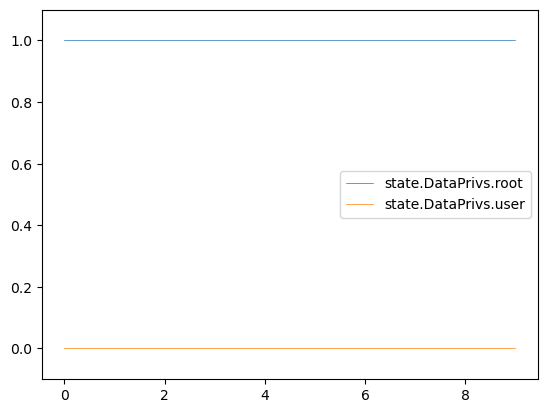

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0            Nop   
2                     1.0                     0.0   DecoyAccount   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2      FileRecon                        file_enum  
3           Exit                   login_activity  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                       file_write  
9            Nop                             none

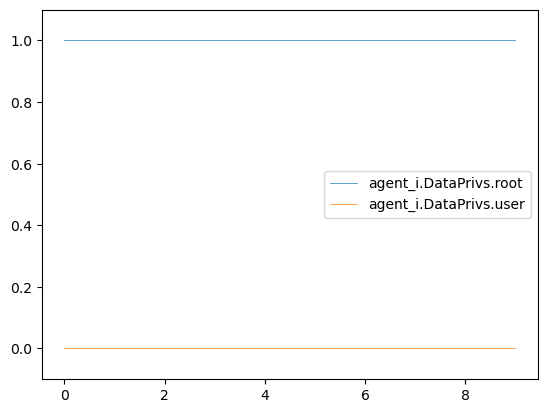

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                0.500000                0.500000      FileRecon   
1                0.592105                0.407895   EnumAccounts   
2                0.592105                0.407895      FileRecon   
3                0.640620                0.359380           Exit   
4                0.640620                0.359380            Nop   
5                0.640620                0.359380            Nop   
6                0.640620                0.359380            Nop   
7                0.640620                0.359380            Nop   
8                0.640620                0.359380            Nop   
9                0.640620                0.359380            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1            Nop                   user_files   
2   DecoyAccount                   user_files   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           failure  
3                           failure  
4                           failure  
5                           success  
6                           failure  
7                           success  
8                           success  
9                           success

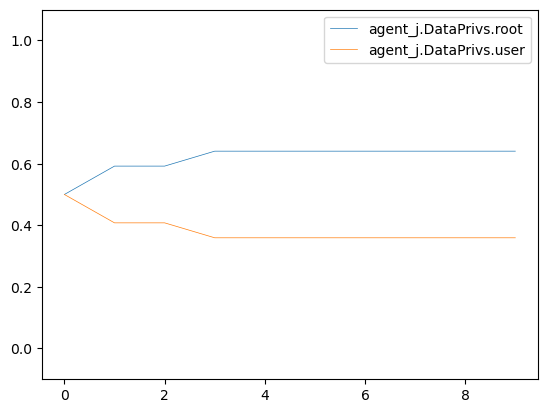

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action agent_j.action
0                   0.0                    1.0            Nop      FileRecon
1                   0.0                    1.0            Nop   EnumAccounts
2                   0.0                    1.0   DecoyAccount      FileRecon
3                   0.0                    1.0            Nop           Exit
4                   0.0                    1.0            Nop            Nop
5                   0.0                    1.0            Nop            Nop
6                   0.0                    1.0            Nop            Nop
7                   0.0                    1.0            Nop            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

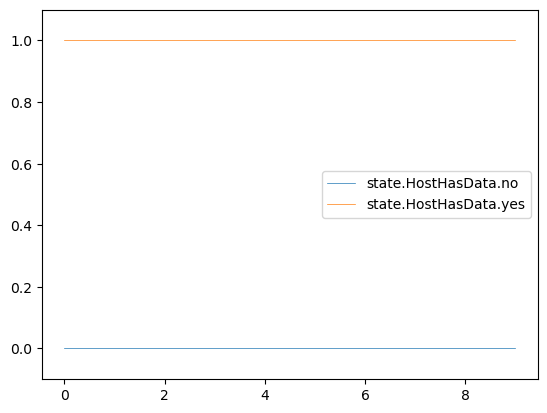

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0            Nop   
2                     0.0                      1.0   DecoyAccount   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2      FileRecon                        file_enum  
3           Exit                   login_activity  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                       file_write  
9            Nop                             none

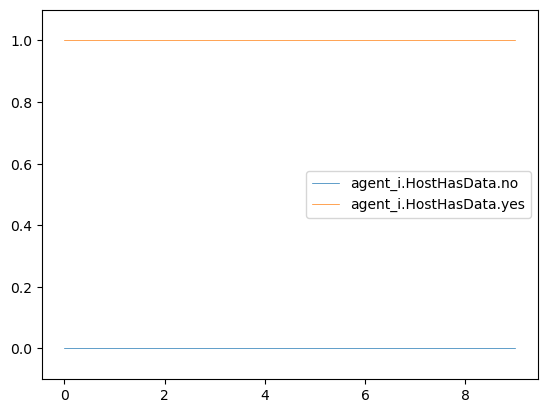

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                0.500000                 0.500000      FileRecon   
1                0.592105                 0.407895   EnumAccounts   
2                0.592105                 0.407895      FileRecon   
3                0.640620                 0.359380           Exit   
4                0.640620                 0.359380            Nop   
5                0.640620                 0.359380            Nop   
6                0.640620                 0.359380            Nop   
7                0.640620                 0.359380            Nop   
8                0.640620                 0.359380            Nop   
9                0.640620                 0.359380            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1            Nop                   user_files   
2   DecoyAccount                   user_files   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           failure  
3                           failure  
4                           failure  
5                           success  
6                           failure  
7                           success  
8                           success  
9                           success

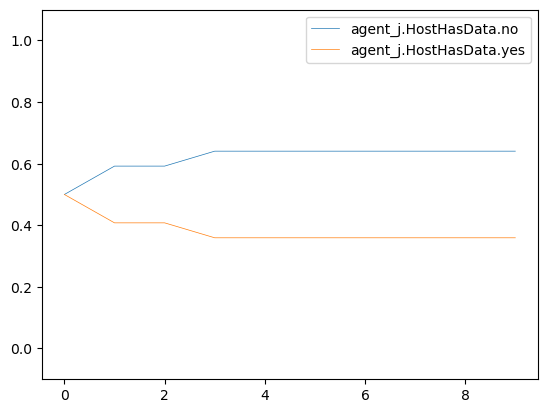

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                        file_enum
3                               1.0                   login_activity
4                               1.0                       file_write
5                               1.0                             none
6                               1.0                             none
7                               1.0                             none
8                               1.0                             none
9                               1.0                   login_activity

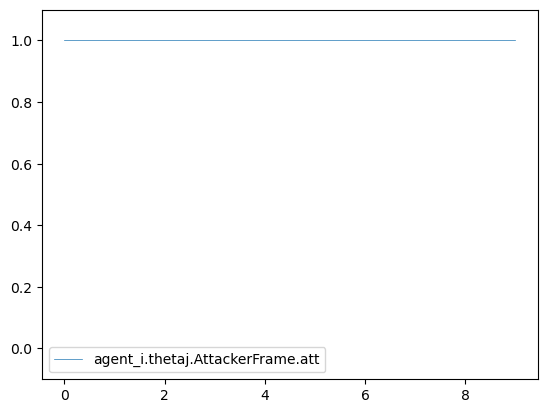

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.436364                        0.563636   
3                         0.311390                        0.688610   
4                         0.378386                        0.621614   
5                         0.378386                        0.621614   
6                         0.378386                        0.621614   
7                         0.378386                        0.621614   
8                         0.378386                        0.621614   
9                         0.378386                        0.621614   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                   user_files                           failure  
1                         none                           failure  
2                         none                           failure  
3                   user_files                           failure  
4                         none                           failure  
5                         none                           success  
6                   user_files                           failure  
7                   user_files                           failure  
8                   user_files                           failure  
9                         none                           failure

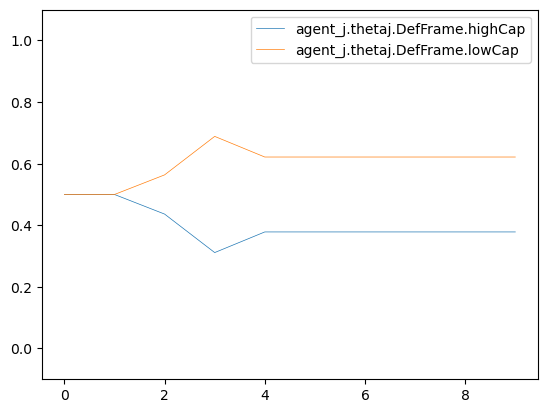

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action agent_j.action
0                 1.0                  0.0            Nop      FileRecon
1                 1.0                  0.0            Nop   EnumAccounts
2                 1.0                  0.0   DecoyAccount   EnumAccounts
3                 1.0                  0.0            Nop      FileRecon
4                 1.0                  0.0            Nop           Exit
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

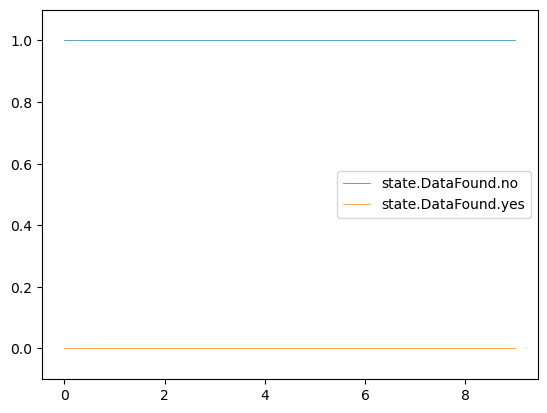

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action agent_j.action  \
0              1.000000               0.000000            Nop      FileRecon   
1              1.000000               0.000000            Nop   EnumAccounts   
2              1.000000               0.000000   DecoyAccount   EnumAccounts   
3              1.000000               0.000000            Nop      FileRecon   
4              1.000000               0.000000            Nop           Exit   
5              0.420503               0.579497            Nop            Nop   
6              0.611064               0.388936            Nop            Nop   
7              0.656321               0.343679            Nop            Nop   
8              0.659697               0.340303            Nop            Nop   
9              0.659756               0.340244            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                        file_enum  
3                   login_activity  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                             none  
9                   login_activity

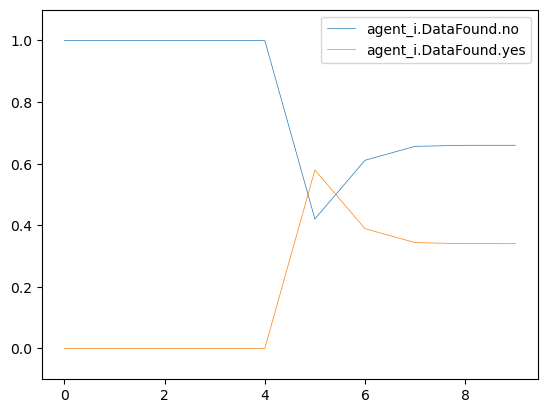

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action agent_i.action  \
0              1.000000               0.000000      FileRecon            Nop   
1              0.976974               0.023026   EnumAccounts            Nop   
2              0.976974               0.023026   EnumAccounts   DecoyAccount   
3              0.976974               0.023026      FileRecon            Nop   
4              0.989758               0.010242           Exit            Nop   
5              0.989758               0.010242            Nop            Nop   
6              0.989758               0.010242            Nop            Nop   
7              0.989758               0.010242            Nop            Nop   
8              0.989758               0.010242            Nop            Nop   
9              0.989758               0.010242            Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                   user_files                           failure  
1                         none                           failure  
2                         none                           failure  
3                   user_files                           failure  
4                         none                           failure  
5                         none                           success  
6                   user_files                           failure  
7                   user_files                           failure  
8                   user_files                           failure  
9                         none                           failure

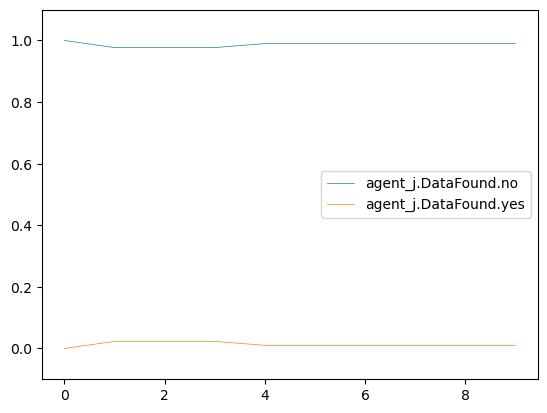

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action agent_j.action
0                    1.0                     0.0            Nop      FileRecon
1                    1.0                     0.0            Nop   EnumAccounts
2                    1.0                     0.0   DecoyAccount   EnumAccounts
3                    1.0                     0.0            Nop      FileRecon
4                    1.0                     0.0            Nop           Exit
5                    1.0                     0.0            Nop            Nop
6                    1.0                     0.0            Nop            Nop
7                    1.0                     0.0            Nop            Nop
8                    1.0                     0.0            Nop            Nop
9                    1.0                     0.0            Nop            Nop

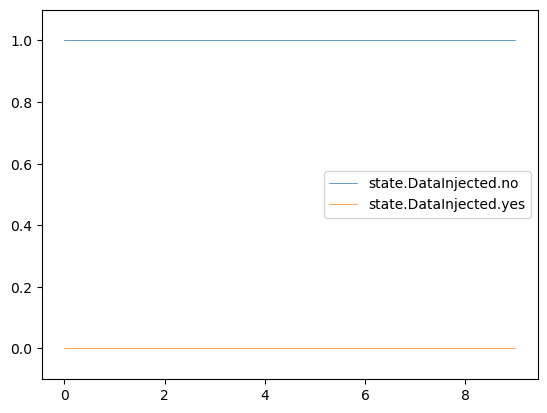

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                 1.000000                  0.000000            Nop   
1                 1.000000                  0.000000            Nop   
2                 1.000000                  0.000000   DecoyAccount   
3                 1.000000                  0.000000            Nop   
4                 1.000000                  0.000000            Nop   
5                 1.000000                  0.000000            Nop   
6                 0.726779                  0.273221            Nop   
7                 0.663862                  0.336138            Nop   
8                 0.660628                  0.339372            Nop   
9                 0.660572                  0.339428            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2   EnumAccounts                        file_enum  
3      FileRecon                   login_activity  
4           Exit                       file_write  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                   login_activity

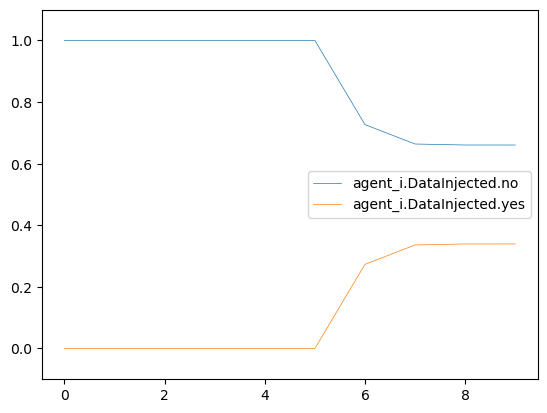

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                      1.0                       0.0      FileRecon   
1                      1.0                       0.0   EnumAccounts   
2                      1.0                       0.0   EnumAccounts   
3                      1.0                       0.0      FileRecon   
4                      1.0                       0.0           Exit   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1            Nop                         none   
2   DecoyAccount                         none   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           failure  
3                           failure  
4                           failure  
5                           success  
6                           failure  
7                           failure  
8                           failure  
9                           failure

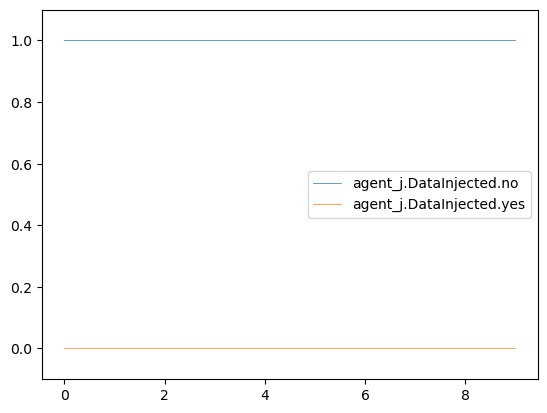

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0            Nop   
1                     0.0                     1.0            Nop   
2                     0.0                     1.0   DecoyAccount   
3                     0.0                     1.0            Nop   
4                     0.0                     1.0            Nop   
5                     0.0                     1.0            Nop   
6                     0.0                     1.0            Nop   
7                     0.0                     1.0            Nop   
8                     0.0                     1.0            Nop   
9                     0.0                     1.0            Nop   

  agent_j.action  
0      FileRecon  
1   EnumAccounts  
2   EnumAccounts  
3      FileRecon  
4           Exit  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

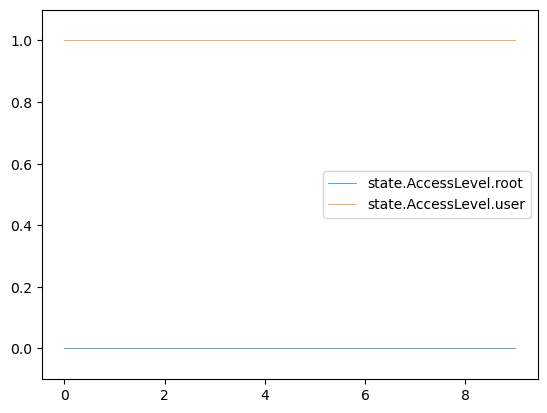

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                  0.000000                  1.000000            Nop   
1                  0.000000                  1.000000            Nop   
2                  0.000000                  1.000000   DecoyAccount   
3                  0.000000                  1.000000            Nop   
4                  0.860245                  0.139755            Nop   
5                  0.836845                  0.163155            Nop   
6                  0.439431                  0.560569            Nop   
7                  0.347917                  0.652083            Nop   
8                  0.343411                  0.656589            Nop   
9                  0.343334                  0.656666            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2   EnumAccounts                        file_enum  
3      FileRecon                   login_activity  
4           Exit                       file_write  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                   login_activity

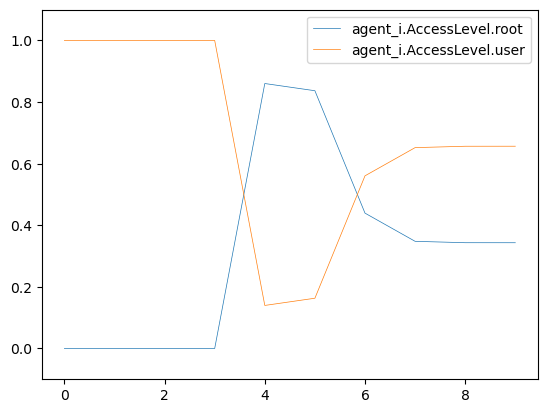

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                       0.0                       1.0      FileRecon   
1                       0.0                       1.0   EnumAccounts   
2                       0.0                       1.0   EnumAccounts   
3                       0.0                       1.0      FileRecon   
4                       0.0                       1.0           Exit   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1            Nop                         none   
2   DecoyAccount                         none   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           failure  
3                           failure  
4                           failure  
5                           success  
6                           failure  
7                           failure  
8                           failure  
9                           failure

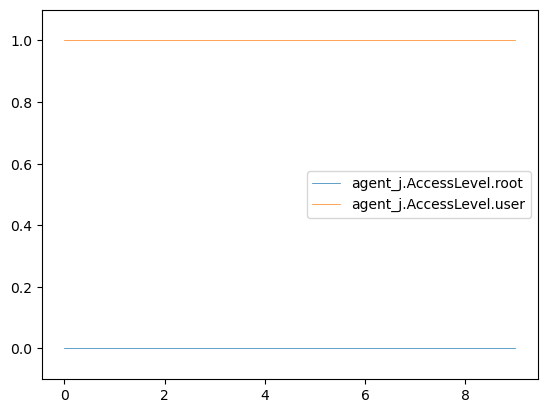

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action agent_j.action
0                 0.0                  1.0            Nop      FileRecon
1                 0.0                  1.0            Nop   EnumAccounts
2                 0.0                  1.0   DecoyAccount   EnumAccounts
3                 0.0                  1.0            Nop      FileRecon
4                 0.0                  1.0            Nop           Exit
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

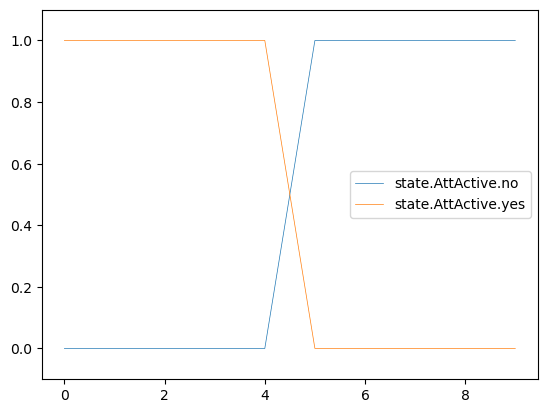

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action agent_j.action  \
0              0.000000               1.000000            Nop      FileRecon   
1              0.000000               1.000000            Nop   EnumAccounts   
2              0.000000               1.000000   DecoyAccount   EnumAccounts   
3              0.000002               0.999998            Nop      FileRecon   
4              0.005111               0.994890            Nop           Exit   
5              0.067023               0.932977            Nop            Nop   
6              0.555489               0.444511            Nop            Nop   
7              0.972033               0.027967            Nop            Nop   
8              0.998845               0.001155            Nop            Nop   
9              0.999980               0.000020            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                        file_enum  
3                   login_activity  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                             none  
9                   login_activity

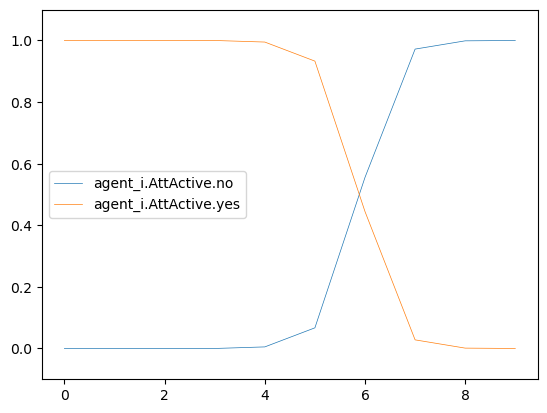

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action agent_i.action  \
0                   0.0                    1.0      FileRecon            Nop   
1                   0.0                    1.0   EnumAccounts            Nop   
2                   0.0                    1.0   EnumAccounts   DecoyAccount   
3                   0.0                    1.0      FileRecon            Nop   
4                   0.0                    1.0           Exit            Nop   
5                   1.0                    0.0            Nop            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                   user_files                           failure  
1                         none                           failure  
2                         none                           failure  
3                   user_files                           failure  
4                         none                           failure  
5                         none                           success  
6                   user_files                           failure  
7                   user_files                           failure  
8                   user_files                           failure  
9                         none                           failure

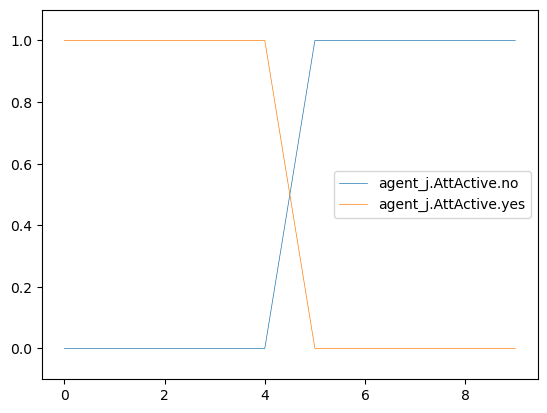

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action agent_j.action  
0                      1.0            Nop      FileRecon  
1                      1.0            Nop   EnumAccounts  
2                      1.0   DecoyAccount   EnumAccounts  
3                      1.0            Nop      FileRecon  
4                      1.0            Nop           Exit  
5                      1.0            Nop            Nop  
6                      1.0            Nop            Nop  
7                      1.0            Nop            Nop  
8                      1.0            Nop            Nop  
9                      1.0            Nop            Nop

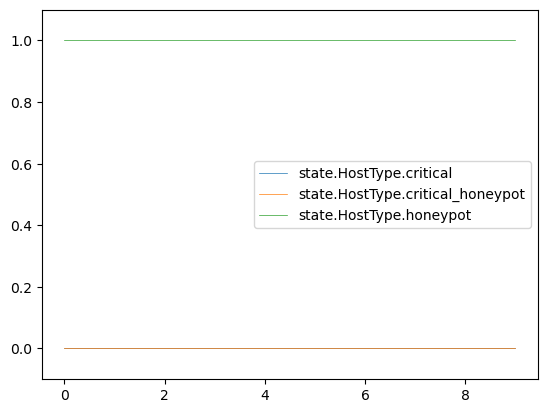

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action agent_j.action  \
0                        1.0            Nop      FileRecon   
1                        1.0            Nop   EnumAccounts   
2                        1.0   DecoyAccount   EnumAccounts   
3                        1.0            Nop      FileRecon   
4                        1.0            Nop           Exit   
5                        1.0            Nop            Nop   
6                        1.0            Nop            Nop   
7                        1.0            Nop            Nop   
8                        1.0            Nop            Nop   
9                        1.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                        file_enum  
3                   login_activity  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                             none  
9                   login_activity

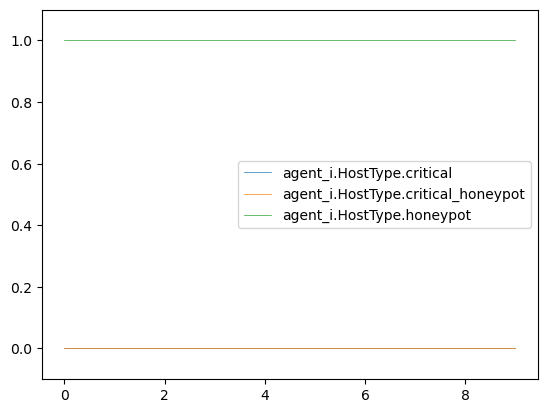

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                   0.500000                                 0.0   
1                   0.700000                                 0.0   
2                   0.563636                                 0.0   
3                   0.413166                                 0.0   
4                   0.621614                                 0.0   
5                   0.621614                                 0.0   
6                   0.621614                                 0.0   
7                   0.621614                                 0.0   
8                   0.621614                                 0.0   
9                   0.621614                                 0.0   

   agent_j.HostType.honeypot agent_j.action agent_i.action  \
0                   0.500000      FileRecon            Nop   
1                   0.300000   EnumAccounts            Nop   
2                   0.436364   EnumAccounts   DecoyAccount   
3                   0.586834      FileRecon            Nop   
4                   0.378386           Exit            Nop   
5                   0.378386            Nop            Nop   
6                   0.378386            Nop            Nop   
7                   0.378386            Nop            Nop   
8                   0.378386            Nop            Nop   
9                   0.378386            Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                   user_files                           failure  
1                         none                           failure  
2                         none                           failure  
3                   user_files                           failure  
4                         none                           failure  
5                         none                           success  
6                   user_files                           failure  
7                   user_files                           failure  
8                   user_files                           failure  
9                         none                           failure

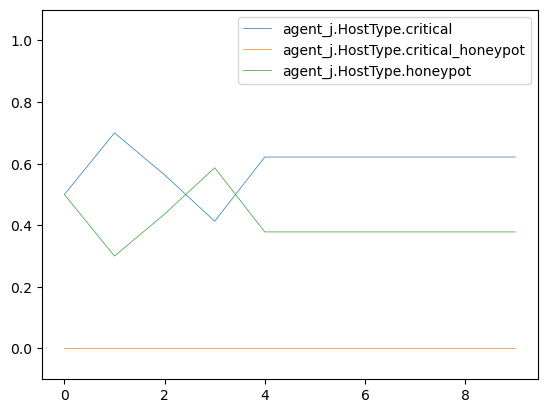

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action agent_j.action
0                1.0                 0.0            Nop      FileRecon
1                1.0                 0.0            Nop   EnumAccounts
2                1.0                 0.0   DecoyAccount   EnumAccounts
3                1.0                 0.0            Nop      FileRecon
4                1.0                 0.0            Nop           Exit
5                1.0                 0.0            Nop            Nop
6                1.0                 0.0            Nop            Nop
7                1.0                 0.0            Nop            Nop
8                1.0                 0.0            Nop            Nop
9                1.0                 0.0            Nop            Nop

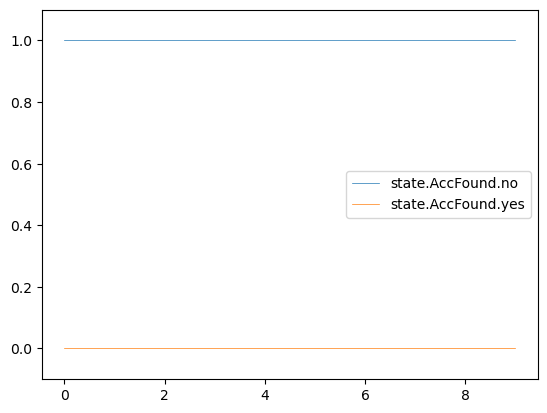

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action agent_j.action  \
0             1.000000              0.000000            Nop      FileRecon   
1             1.000000              0.000000            Nop   EnumAccounts   
2             1.000000              0.000000   DecoyAccount   EnumAccounts   
3             0.371711              0.628289            Nop      FileRecon   
4             0.115973              0.884027            Nop           Exit   
5             0.141201              0.858799            Nop            Nop   
6             0.479046              0.520954            Nop            Nop   
7             0.559158              0.440842            Nop            Nop   
8             0.563032              0.436968            Nop            Nop   
9             0.563098              0.436902            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                        file_enum  
3                   login_activity  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                             none  
9                   login_activity

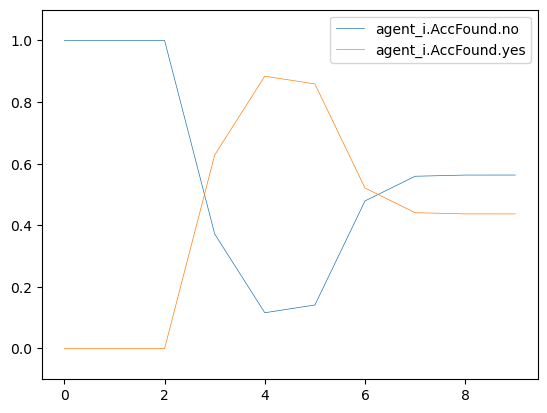

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action agent_i.action  \
0             1.000000              0.000000      FileRecon            Nop   
1             1.000000              0.000000   EnumAccounts            Nop   
2             0.920455              0.079545   EnumAccounts   DecoyAccount   
3             0.947013              0.052987      FileRecon            Nop   
4             0.955711              0.044289           Exit            Nop   
5             0.955711              0.044289            Nop            Nop   
6             0.955711              0.044289            Nop            Nop   
7             0.955711              0.044289            Nop            Nop   
8             0.955711              0.044289            Nop            Nop   
9             0.955711              0.044289            Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                   user_files                           failure  
1                         none                           failure  
2                         none                           failure  
3                   user_files                           failure  
4                         none                           failure  
5                         none                           success  
6                   user_files                           failure  
7                   user_files                           failure  
8                   user_files                           failure  
9                         none                           failure

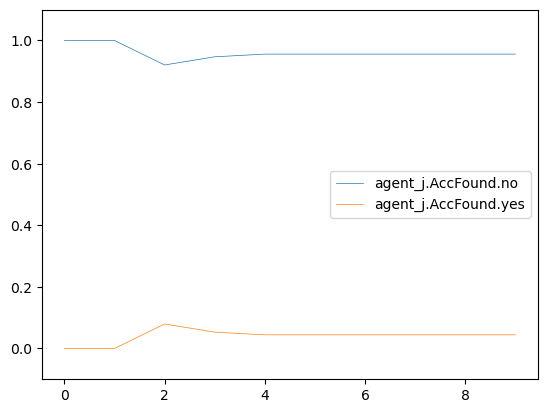

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action agent_j.action
0                   1.0                    0.0            Nop      FileRecon
1                   1.0                    0.0            Nop   EnumAccounts
2                   1.0                    0.0   DecoyAccount   EnumAccounts
3                   0.0                    1.0            Nop      FileRecon
4                   0.0                    1.0            Nop           Exit
5                   0.0                    1.0            Nop            Nop
6                   0.0                    1.0            Nop            Nop
7                   0.0                    1.0            Nop            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

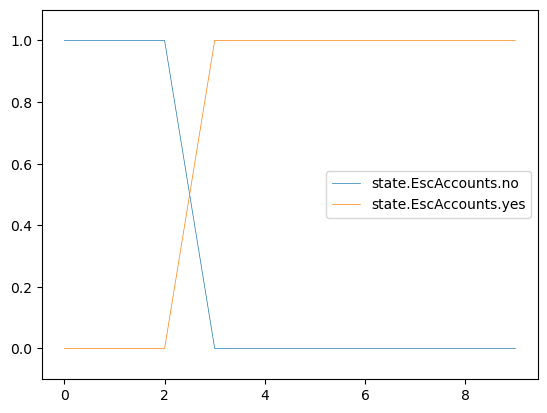

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0            Nop   
2                     1.0                      0.0   DecoyAccount   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2   EnumAccounts                        file_enum  
3      FileRecon                   login_activity  
4           Exit                       file_write  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                   login_activity

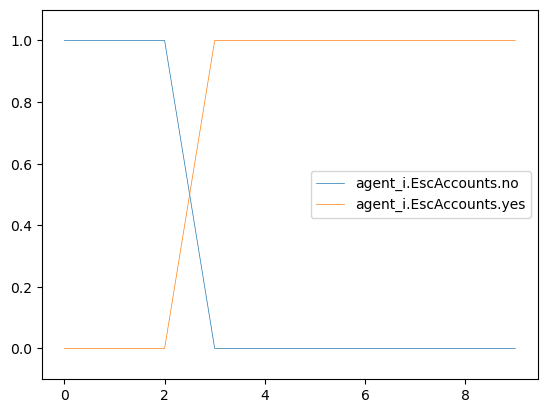

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                0.500000                 0.500000      FileRecon   
1                0.500000                 0.500000   EnumAccounts   
2                0.613636                 0.386364   EnumAccounts   
3                0.797872                 0.202128      FileRecon   
4                0.831053                 0.168947           Exit   
5                0.831053                 0.168947            Nop   
6                0.831053                 0.168947            Nop   
7                0.831053                 0.168947            Nop   
8                0.831053                 0.168947            Nop   
9                0.831053                 0.168947            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1            Nop                         none   
2   DecoyAccount                         none   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           failure  
3                           failure  
4                           failure  
5                           success  
6                           failure  
7                           failure  
8                           failure  
9                           failure

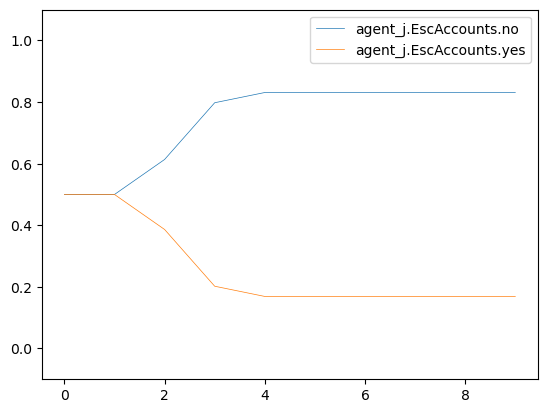

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action agent_j.action
0                   1.0                   0.0            Nop      FileRecon
1                   1.0                   0.0            Nop   EnumAccounts
2                   1.0                   0.0   DecoyAccount   EnumAccounts
3                   1.0                   0.0            Nop      FileRecon
4                   1.0                   0.0            Nop           Exit
5                   1.0                   0.0            Nop            Nop
6                   1.0                   0.0            Nop            Nop
7                   1.0                   0.0            Nop            Nop
8                   1.0                   0.0            Nop            Nop
9                   1.0                   0.0            Nop            Nop

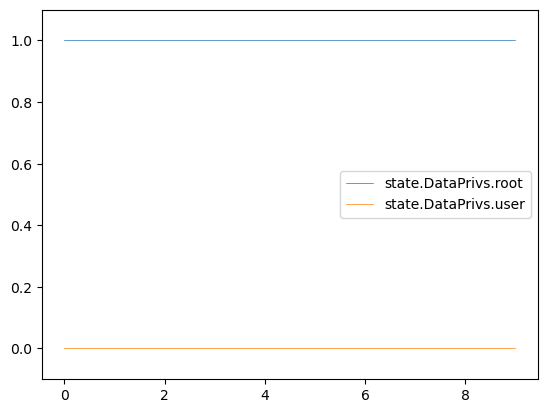

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0            Nop   
2                     1.0                     0.0   DecoyAccount   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2   EnumAccounts                        file_enum  
3      FileRecon                   login_activity  
4           Exit                       file_write  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                   login_activity

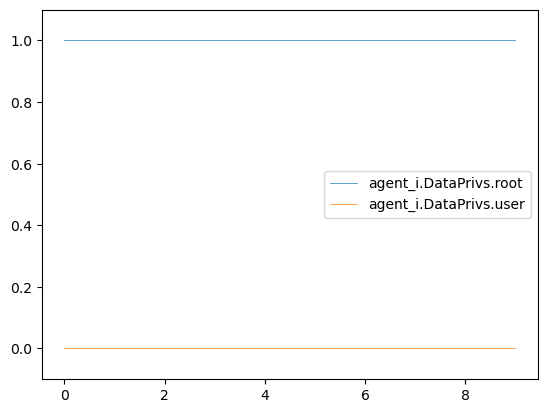

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                0.500000                0.500000      FileRecon   
1                0.592105                0.407895   EnumAccounts   
2                0.592105                0.407895   EnumAccounts   
3                0.592105                0.407895      FileRecon   
4                0.640620                0.359380           Exit   
5                0.640620                0.359380            Nop   
6                0.640620                0.359380            Nop   
7                0.640620                0.359380            Nop   
8                0.640620                0.359380            Nop   
9                0.640620                0.359380            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1            Nop                         none   
2   DecoyAccount                         none   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           failure  
3                           failure  
4                           failure  
5                           success  
6                           failure  
7                           failure  
8                           failure  
9                           failure

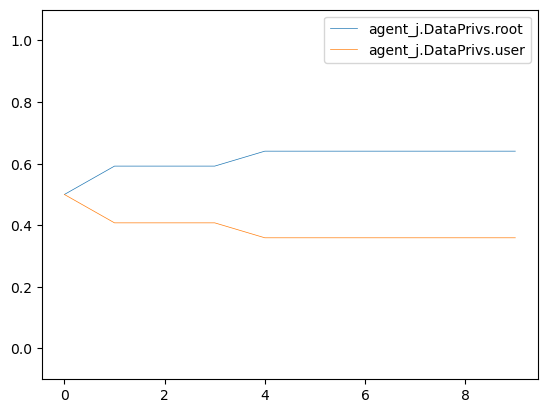

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action agent_j.action
0                   0.0                    1.0            Nop      FileRecon
1                   0.0                    1.0            Nop   EnumAccounts
2                   0.0                    1.0   DecoyAccount   EnumAccounts
3                   0.0                    1.0            Nop      FileRecon
4                   0.0                    1.0            Nop           Exit
5                   0.0                    1.0            Nop            Nop
6                   0.0                    1.0            Nop            Nop
7                   0.0                    1.0            Nop            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

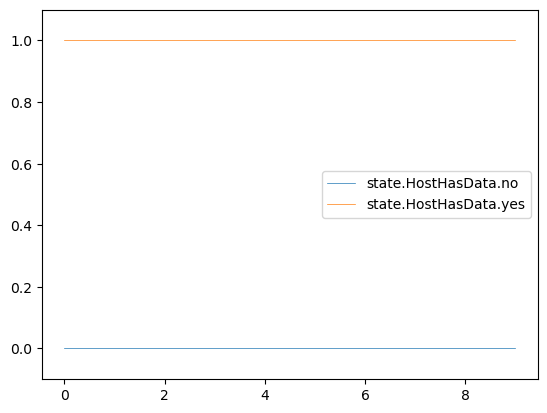

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0            Nop   
2                     0.0                      1.0   DecoyAccount   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                        file_enum  
1   EnumAccounts                        file_enum  
2   EnumAccounts                        file_enum  
3      FileRecon                   login_activity  
4           Exit                       file_write  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                   login_activity

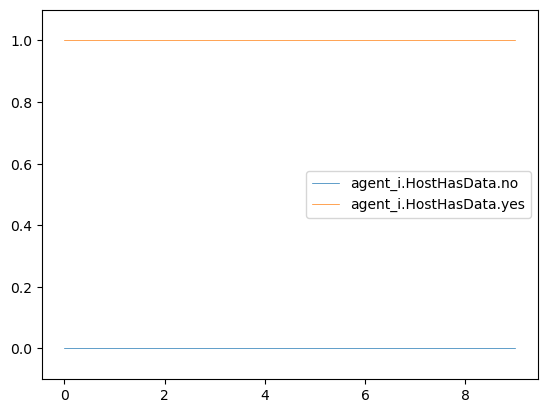

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                0.500000                 0.500000      FileRecon   
1                0.592105                 0.407895   EnumAccounts   
2                0.592105                 0.407895   EnumAccounts   
3                0.592105                 0.407895      FileRecon   
4                0.640620                 0.359380           Exit   
5                0.640620                 0.359380            Nop   
6                0.640620                 0.359380            Nop   
7                0.640620                 0.359380            Nop   
8                0.640620                 0.359380            Nop   
9                0.640620                 0.359380            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1            Nop                         none   
2   DecoyAccount                         none   
3            Nop                   user_files   
4            Nop                         none   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           failure  
3                           failure  
4                           failure  
5                           success  
6                           failure  
7                           failure  
8                           failure  
9                           failure

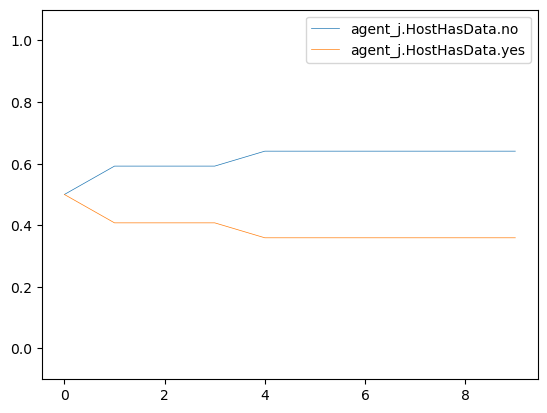

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                       file_write
1                               1.0                        file_enum
2                               1.0                        file_enum
3                               1.0                       file_write
4                               1.0                       file_write
5                               1.0                             none
6                               1.0                             none
7                               1.0                             none
8                               1.0                             none
9                               1.0                       file_write

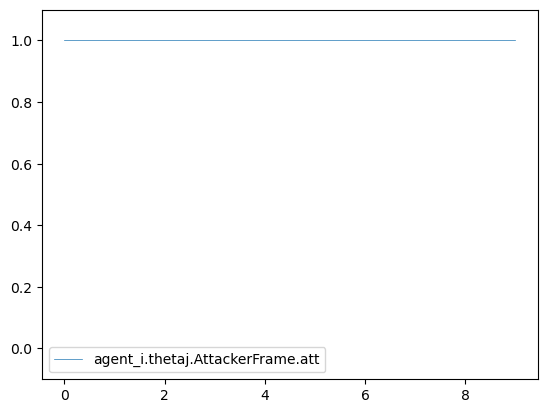

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.382131                        0.617869   
3                         0.215401                        0.784599   
4                         0.195475                        0.804526   
5                         0.195475                        0.804525   
6                         0.195475                        0.804526   
7                         0.195475                        0.804525   
8                         0.195475                        0.804526   
9                         0.195475                        0.804525   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           failure  
2                         none                           failure  
3                         none                           failure  
4                   user_files                           success  
5                         none                           failure  
6                         none                           failure  
7                         none                           failure  
8                         none                           success  
9                         none                           failure

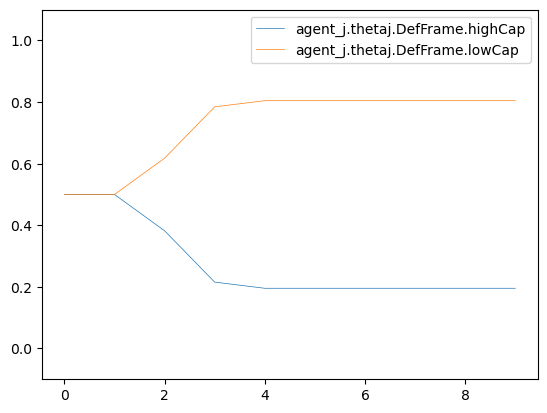

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action agent_j.action
0                 1.0                  0.0            Nop      FileRecon
1                 1.0                  0.0            Nop   EnumAccounts
2                 1.0                  0.0   DecoyAccount   EnumAccounts
3                 1.0                  0.0            Nop      FileRecon
4                 1.0                  0.0            Nop           Exit
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

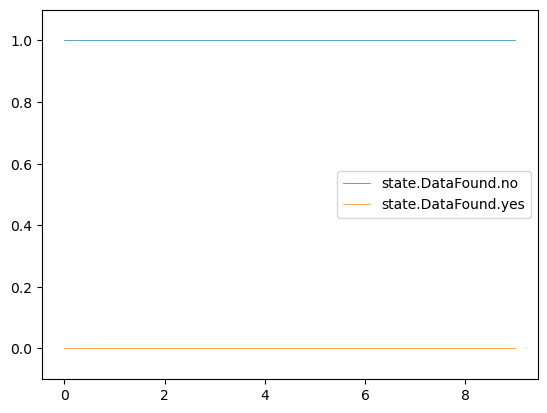

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action agent_j.action  \
0              1.000000               0.000000            Nop      FileRecon   
1              1.000000               0.000000            Nop   EnumAccounts   
2              1.000000               0.000000   DecoyAccount   EnumAccounts   
3              1.000000               0.000000            Nop      FileRecon   
4              1.000000               0.000000            Nop           Exit   
5              0.678773               0.321227            Nop            Nop   
6              0.891749               0.108251            Nop            Nop   
7              0.917417               0.082582            Nop            Nop   
8              0.918853               0.081147            Nop            Nop   
9              0.918886               0.081114            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                       file_write  
1                        file_enum  
2                        file_enum  
3                       file_write  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                             none  
9                       file_write

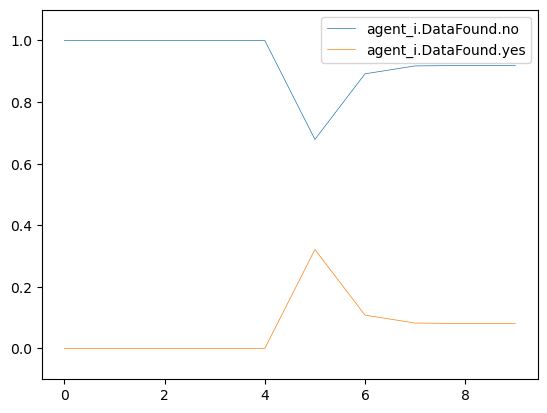

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action agent_i.action  \
0              1.000000               0.000000      FileRecon            Nop   
1              0.976974               0.023026   EnumAccounts            Nop   
2              0.976974               0.023026   EnumAccounts   DecoyAccount   
3              0.976974               0.023026      FileRecon            Nop   
4              0.989758               0.010242           Exit            Nop   
5              0.989758               0.010242            Nop            Nop   
6              0.989758               0.010242            Nop            Nop   
7              0.989758               0.010242            Nop            Nop   
8              0.989758               0.010242            Nop            Nop   
9              0.989758               0.010242            Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           failure  
2                         none                           failure  
3                         none                           failure  
4                   user_files                           success  
5                         none                           failure  
6                         none                           failure  
7                         none                           failure  
8                         none                           success  
9                         none                           failure

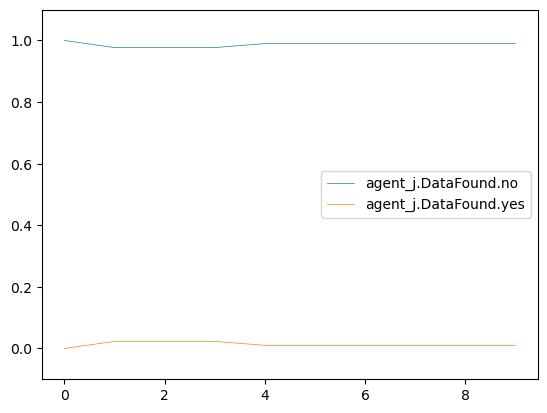

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action agent_j.action
0                    1.0                     0.0            Nop      FileRecon
1                    1.0                     0.0            Nop   EnumAccounts
2                    1.0                     0.0   DecoyAccount   EnumAccounts
3                    1.0                     0.0            Nop      FileRecon
4                    1.0                     0.0            Nop           Exit
5                    1.0                     0.0            Nop            Nop
6                    1.0                     0.0            Nop            Nop
7                    1.0                     0.0            Nop            Nop
8                    1.0                     0.0            Nop            Nop
9                    1.0                     0.0            Nop            Nop

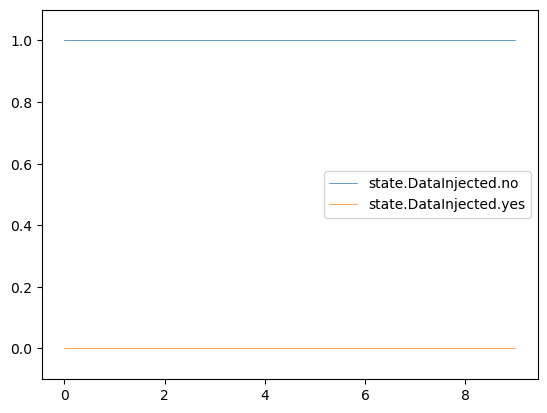

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                 1.000000                  0.000000            Nop   
1                 1.000000                  0.000000            Nop   
2                 1.000000                  0.000000   DecoyAccount   
3                 1.000000                  0.000000            Nop   
4                 1.000000                  0.000000            Nop   
5                 1.000000                  0.000000            Nop   
6                 0.927627                  0.072373            Nop   
7                 0.919501                  0.080499            Nop   
8                 0.919089                  0.080911            Nop   
9                 0.919080                  0.080920            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                       file_write  
1   EnumAccounts                        file_enum  
2   EnumAccounts                        file_enum  
3      FileRecon                       file_write  
4           Exit                       file_write  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                       file_write

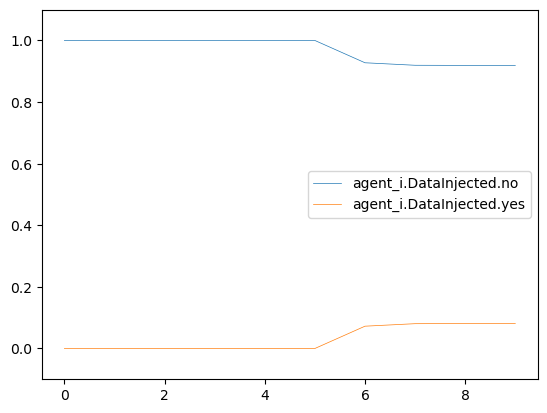

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                      1.0                       0.0      FileRecon   
1                      1.0                       0.0   EnumAccounts   
2                      1.0                       0.0   EnumAccounts   
3                      1.0                       0.0      FileRecon   
4                      1.0                       0.0           Exit   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2   DecoyAccount                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           failure  
3                           failure  
4                           success  
5                           failure  
6                           failure  
7                           failure  
8                           success  
9                           failure

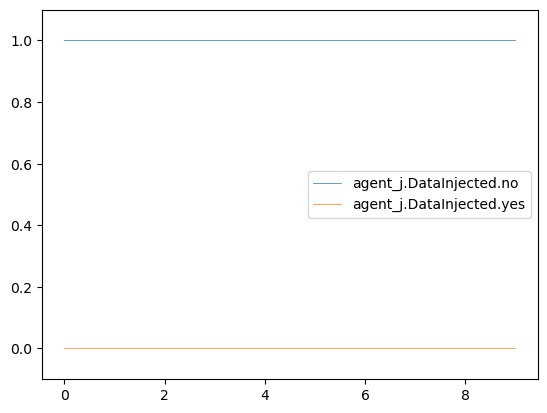

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0            Nop   
1                     0.0                     1.0            Nop   
2                     0.0                     1.0   DecoyAccount   
3                     0.0                     1.0            Nop   
4                     0.0                     1.0            Nop   
5                     0.0                     1.0            Nop   
6                     0.0                     1.0            Nop   
7                     0.0                     1.0            Nop   
8                     0.0                     1.0            Nop   
9                     0.0                     1.0            Nop   

  agent_j.action  
0      FileRecon  
1   EnumAccounts  
2   EnumAccounts  
3      FileRecon  
4           Exit  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

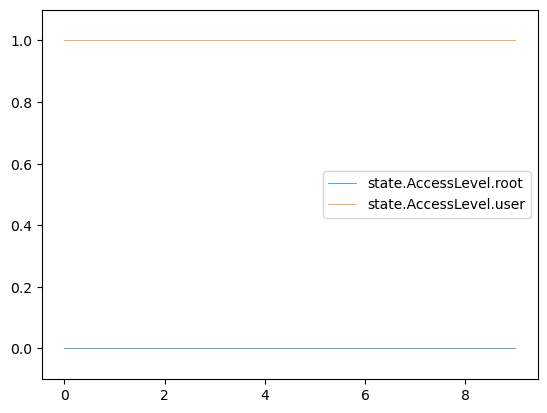

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                  0.000000                  1.000000            Nop   
1                  0.000000                  1.000000            Nop   
2                  0.000000                  1.000000   DecoyAccount   
3                  0.000000                  1.000000            Nop   
4                  0.537382                  0.462618            Nop   
5                  0.493733                  0.506267            Nop   
6                  0.123948                  0.876052            Nop   
7                  0.083759                  0.916241            Nop   
8                  0.081932                  0.918068            Nop   
9                  0.081893                  0.918107            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                       file_write  
1   EnumAccounts                        file_enum  
2   EnumAccounts                        file_enum  
3      FileRecon                       file_write  
4           Exit                       file_write  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                       file_write

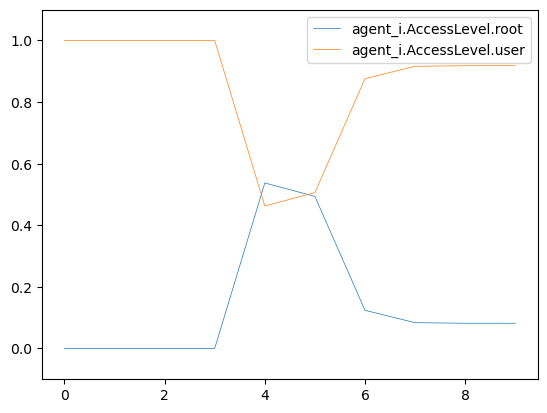

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                       0.0                       1.0      FileRecon   
1                       0.0                       1.0   EnumAccounts   
2                       0.0                       1.0   EnumAccounts   
3                       0.0                       1.0      FileRecon   
4                       0.0                       1.0           Exit   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2   DecoyAccount                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           failure  
3                           failure  
4                           success  
5                           failure  
6                           failure  
7                           failure  
8                           success  
9                           failure

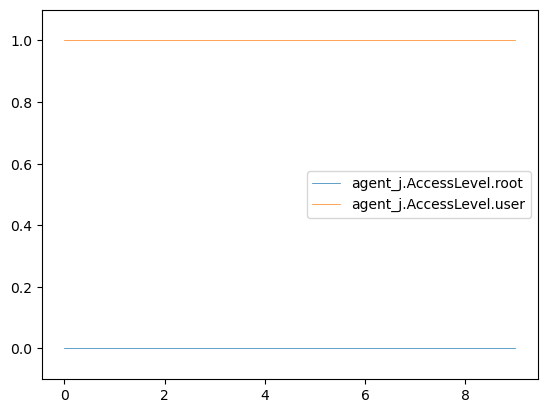

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action agent_j.action
0                 0.0                  1.0            Nop      FileRecon
1                 0.0                  1.0            Nop   EnumAccounts
2                 0.0                  1.0   DecoyAccount   EnumAccounts
3                 0.0                  1.0            Nop      FileRecon
4                 0.0                  1.0            Nop           Exit
5                 1.0                  0.0            Nop            Nop
6                 1.0                  0.0            Nop            Nop
7                 1.0                  0.0            Nop            Nop
8                 1.0                  0.0            Nop            Nop
9                 1.0                  0.0            Nop            Nop

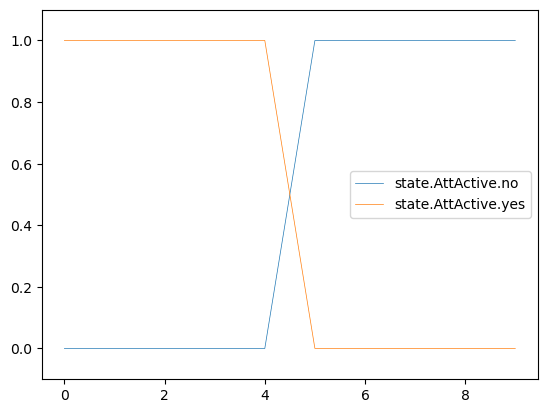

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action agent_j.action  \
0              0.000000               1.000000            Nop      FileRecon   
1              0.000000               1.000000            Nop   EnumAccounts   
2              0.000000               1.000000   DecoyAccount   EnumAccounts   
3              0.000002               0.999998            Nop      FileRecon   
4              0.022347               0.977653            Nop           Exit   
5              0.302470               0.697530            Nop            Nop   
6              0.874610               0.125390            Nop            Nop   
7              0.992237               0.007763            Nop            Nop   
8              0.999667               0.000333            Nop            Nop   
9              0.999993               0.000007            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                       file_write  
1                        file_enum  
2                        file_enum  
3                       file_write  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                             none  
9                       file_write

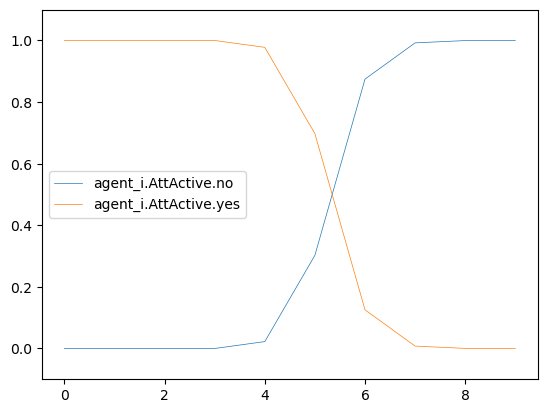

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action agent_i.action  \
0                   0.0                    1.0      FileRecon            Nop   
1                   0.0                    1.0   EnumAccounts            Nop   
2                   0.0                    1.0   EnumAccounts   DecoyAccount   
3                   0.0                    1.0      FileRecon            Nop   
4                   0.0                    1.0           Exit            Nop   
5                   1.0                    0.0            Nop            Nop   
6                   1.0                    0.0            Nop            Nop   
7                   1.0                    0.0            Nop            Nop   
8                   1.0                    0.0            Nop            Nop   
9                   1.0                    0.0            Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           failure  
2                         none                           failure  
3                         none                           failure  
4                   user_files                           success  
5                         none                           failure  
6                         none                           failure  
7                         none                           failure  
8                         none                           success  
9                         none                           failure

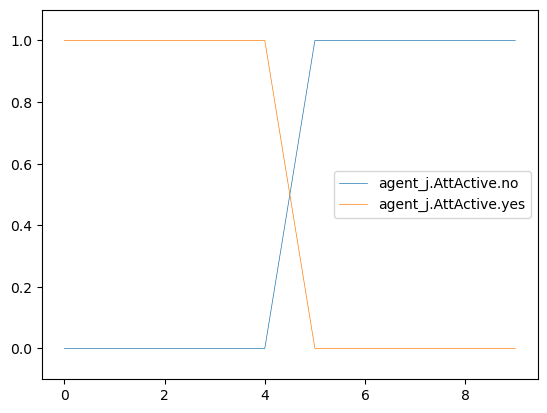

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action agent_j.action  
0                      1.0            Nop      FileRecon  
1                      1.0            Nop   EnumAccounts  
2                      1.0   DecoyAccount   EnumAccounts  
3                      1.0            Nop      FileRecon  
4                      1.0            Nop           Exit  
5                      1.0            Nop            Nop  
6                      1.0            Nop            Nop  
7                      1.0            Nop            Nop  
8                      1.0            Nop            Nop  
9                      1.0            Nop            Nop

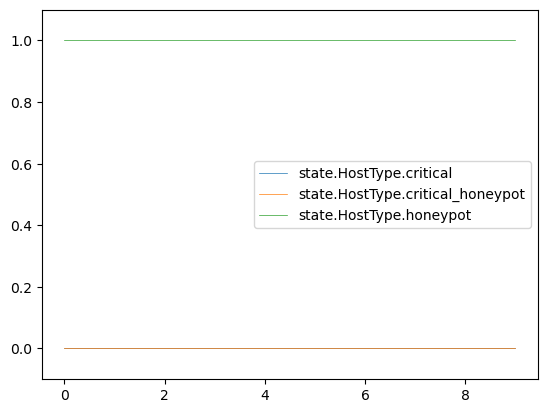

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action agent_j.action  \
0                        1.0            Nop      FileRecon   
1                        1.0            Nop   EnumAccounts   
2                        1.0   DecoyAccount   EnumAccounts   
3                        1.0            Nop      FileRecon   
4                        1.0            Nop           Exit   
5                        1.0            Nop            Nop   
6                        1.0            Nop            Nop   
7                        1.0            Nop            Nop   
8                        1.0            Nop            Nop   
9                        1.0            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                       file_write  
1                        file_enum  
2                        file_enum  
3                       file_write  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                             none  
9                       file_write

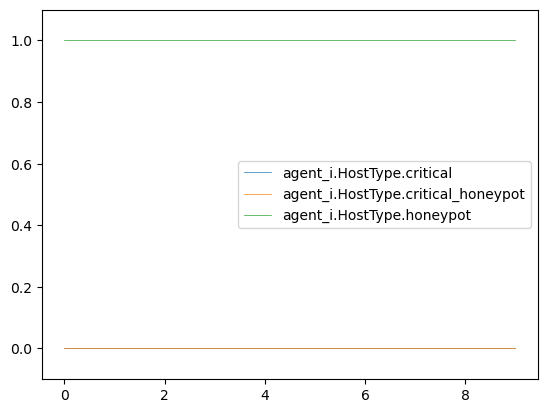

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                   0.500000                                 0.0   
1                   0.300000                                 0.0   
2                   0.191753                                 0.0   
3                   0.114509                                 0.0   
4                   0.052511                                 0.0   
5                   0.052511                                 0.0   
6                   0.052511                                 0.0   
7                   0.052511                                 0.0   
8                   0.052511                                 0.0   
9                   0.052511                                 0.0   

   agent_j.HostType.honeypot agent_j.action agent_i.action  \
0                   0.500000      FileRecon            Nop   
1                   0.700000   EnumAccounts            Nop   
2                   0.808247   EnumAccounts   DecoyAccount   
3                   0.885491      FileRecon            Nop   
4                   0.947489           Exit            Nop   
5                   0.947488            Nop            Nop   
6                   0.947489            Nop            Nop   
7                   0.947488            Nop            Nop   
8                   0.947489            Nop            Nop   
9                   0.947488            Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           failure  
2                         none                           failure  
3                         none                           failure  
4                   user_files                           success  
5                         none                           failure  
6                         none                           failure  
7                         none                           failure  
8                         none                           success  
9                         none                           failure

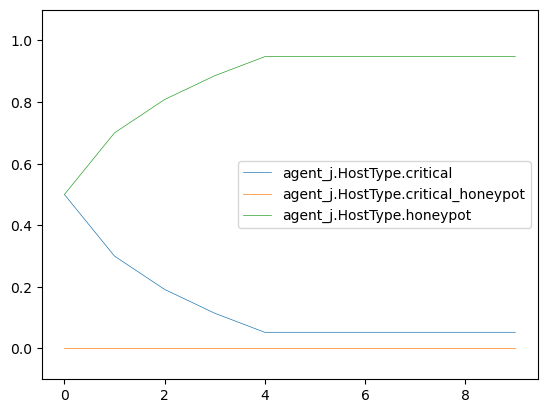

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action agent_j.action
0                1.0                 0.0            Nop      FileRecon
1                1.0                 0.0            Nop   EnumAccounts
2                1.0                 0.0   DecoyAccount   EnumAccounts
3                1.0                 0.0            Nop      FileRecon
4                1.0                 0.0            Nop           Exit
5                1.0                 0.0            Nop            Nop
6                1.0                 0.0            Nop            Nop
7                1.0                 0.0            Nop            Nop
8                1.0                 0.0            Nop            Nop
9                1.0                 0.0            Nop            Nop

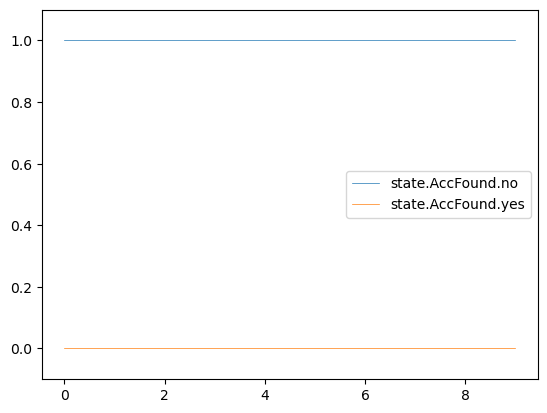

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action agent_j.action  \
0             1.000000              0.000000            Nop      FileRecon   
1             1.000000              0.000000            Nop   EnumAccounts   
2             1.000000              0.000000   DecoyAccount   EnumAccounts   
3             0.371711              0.628289            Nop      FileRecon   
4             0.358624              0.641376            Nop           Exit   
5             0.421933              0.578067            Nop            Nop   
6             0.728374              0.271626            Nop            Nop   
7             0.762226              0.237774            Nop            Nop   
8             0.763748              0.236252            Nop            Nop   
9             0.763780              0.236220            Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                       file_write  
1                        file_enum  
2                        file_enum  
3                       file_write  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                             none  
9                       file_write

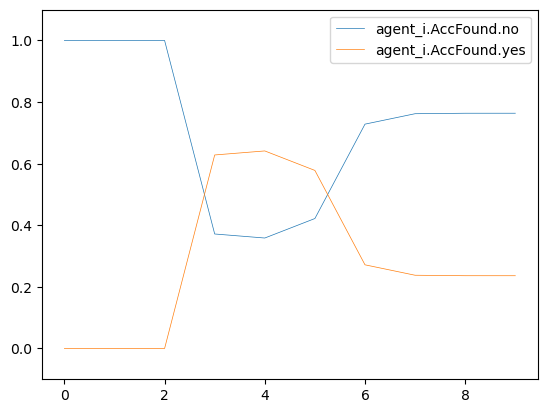

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action agent_i.action  \
0             1.000000              0.000000      FileRecon            Nop   
1             1.000000              0.000000   EnumAccounts            Nop   
2             0.900773              0.099227   EnumAccounts   DecoyAccount   
3             0.934550              0.065449      FileRecon            Nop   
4             0.931964              0.068037           Exit            Nop   
5             0.931963              0.068037            Nop            Nop   
6             0.931964              0.068037            Nop            Nop   
7             0.931963              0.068037            Nop            Nop   
8             0.931964              0.068037            Nop            Nop   
9             0.931963              0.068037            Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           failure  
2                         none                           failure  
3                         none                           failure  
4                   user_files                           success  
5                         none                           failure  
6                         none                           failure  
7                         none                           failure  
8                         none                           success  
9                         none                           failure

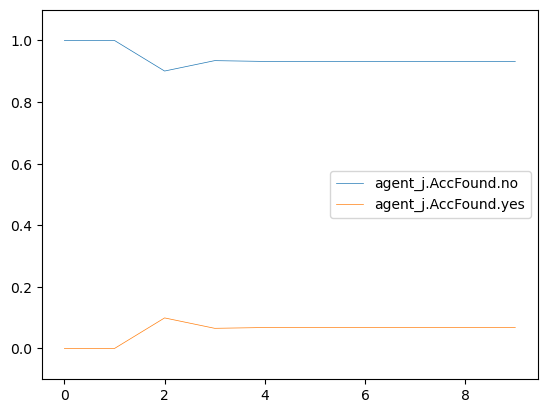

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action agent_j.action
0                   1.0                    0.0            Nop      FileRecon
1                   1.0                    0.0            Nop   EnumAccounts
2                   1.0                    0.0   DecoyAccount   EnumAccounts
3                   0.0                    1.0            Nop      FileRecon
4                   0.0                    1.0            Nop           Exit
5                   0.0                    1.0            Nop            Nop
6                   0.0                    1.0            Nop            Nop
7                   0.0                    1.0            Nop            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

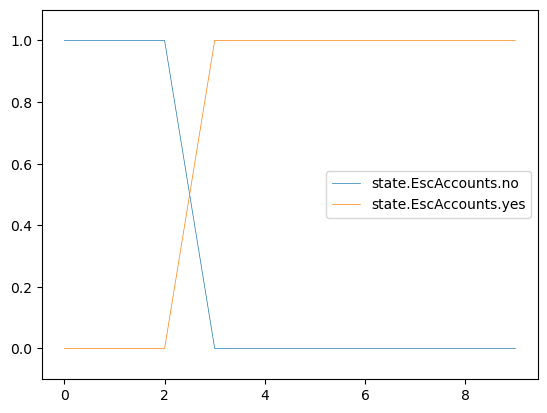

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0            Nop   
2                     1.0                      0.0   DecoyAccount   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                       file_write  
1   EnumAccounts                        file_enum  
2   EnumAccounts                        file_enum  
3      FileRecon                       file_write  
4           Exit                       file_write  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                       file_write

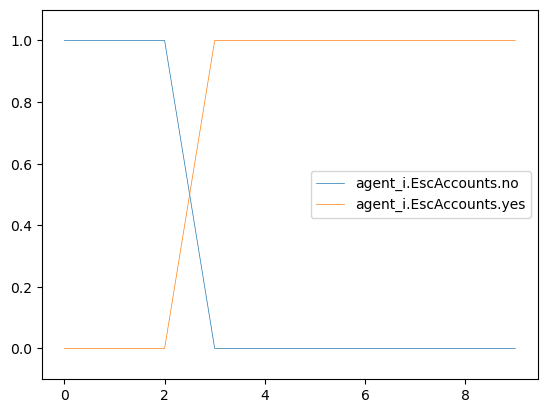

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                0.500000                 0.500000      FileRecon   
1                0.500000                 0.500000   EnumAccounts   
2                0.518041                 0.481959   EnumAccounts   
3                0.750332                 0.249668      FileRecon   
4                0.740463                 0.259537           Exit   
5                0.740463                 0.259537            Nop   
6                0.740463                 0.259537            Nop   
7                0.740463                 0.259537            Nop   
8                0.740463                 0.259537            Nop   
9                0.740463                 0.259537            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2   DecoyAccount                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           failure  
3                           failure  
4                           success  
5                           failure  
6                           failure  
7                           failure  
8                           success  
9                           failure

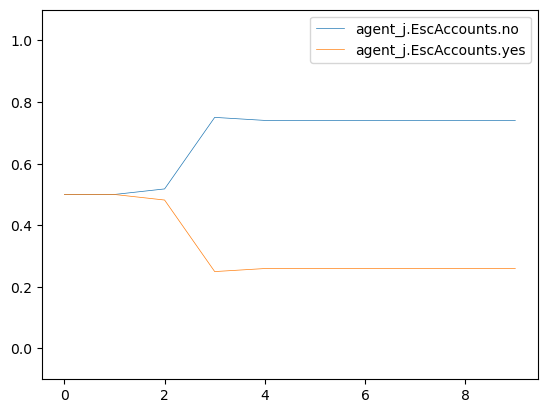

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action agent_j.action
0                   1.0                   0.0            Nop      FileRecon
1                   1.0                   0.0            Nop   EnumAccounts
2                   1.0                   0.0   DecoyAccount   EnumAccounts
3                   1.0                   0.0            Nop      FileRecon
4                   1.0                   0.0            Nop           Exit
5                   1.0                   0.0            Nop            Nop
6                   1.0                   0.0            Nop            Nop
7                   1.0                   0.0            Nop            Nop
8                   1.0                   0.0            Nop            Nop
9                   1.0                   0.0            Nop            Nop

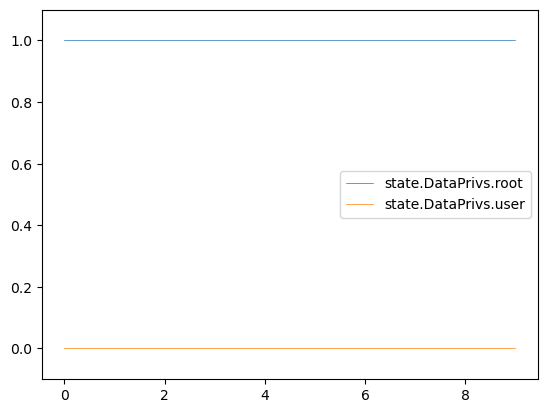

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0            Nop   
2                     1.0                     0.0   DecoyAccount   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                       file_write  
1   EnumAccounts                        file_enum  
2   EnumAccounts                        file_enum  
3      FileRecon                       file_write  
4           Exit                       file_write  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                       file_write

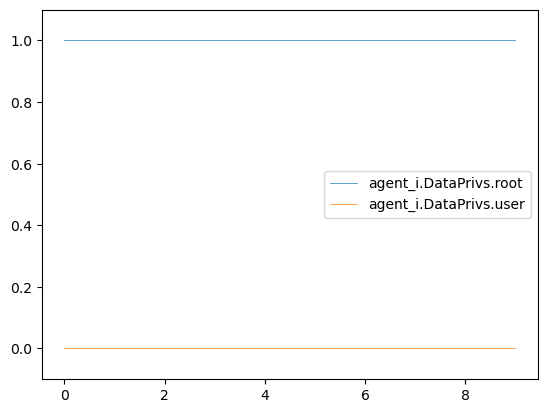

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                0.500000                0.500000      FileRecon   
1                0.592105                0.407895   EnumAccounts   
2                0.592105                0.407895   EnumAccounts   
3                0.592105                0.407895      FileRecon   
4                0.640620                0.359380           Exit   
5                0.640620                0.359380            Nop   
6                0.640620                0.359380            Nop   
7                0.640620                0.359380            Nop   
8                0.640620                0.359380            Nop   
9                0.640620                0.359380            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2   DecoyAccount                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           failure  
3                           failure  
4                           success  
5                           failure  
6                           failure  
7                           failure  
8                           success  
9                           failure

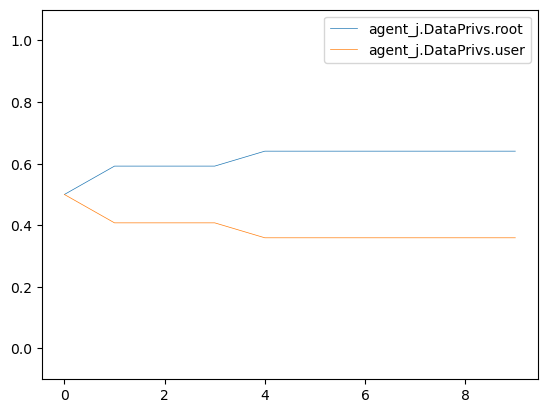

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action agent_j.action
0                   0.0                    1.0            Nop      FileRecon
1                   0.0                    1.0            Nop   EnumAccounts
2                   0.0                    1.0   DecoyAccount   EnumAccounts
3                   0.0                    1.0            Nop      FileRecon
4                   0.0                    1.0            Nop           Exit
5                   0.0                    1.0            Nop            Nop
6                   0.0                    1.0            Nop            Nop
7                   0.0                    1.0            Nop            Nop
8                   0.0                    1.0            Nop            Nop
9                   0.0                    1.0            Nop            Nop

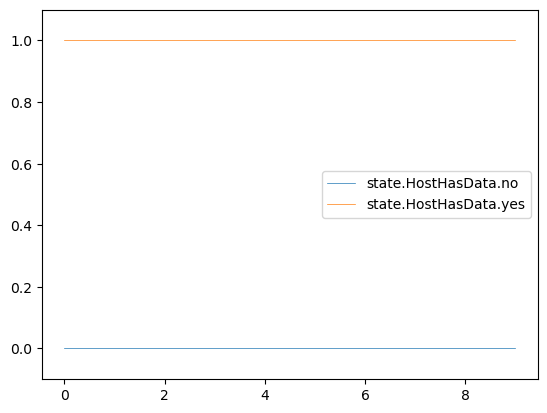

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0            Nop   
2                     0.0                      1.0   DecoyAccount   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0      FileRecon                       file_write  
1   EnumAccounts                        file_enum  
2   EnumAccounts                        file_enum  
3      FileRecon                       file_write  
4           Exit                       file_write  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                       file_write

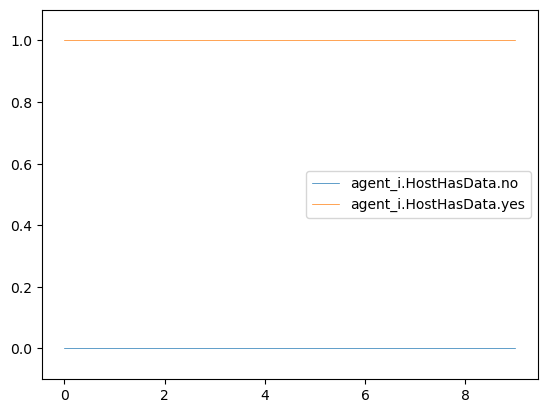

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                0.500000                 0.500000      FileRecon   
1                0.592105                 0.407895   EnumAccounts   
2                0.592105                 0.407895   EnumAccounts   
3                0.592105                 0.407895      FileRecon   
4                0.640620                 0.359380           Exit   
5                0.640620                 0.359380            Nop   
6                0.640620                 0.359380            Nop   
7                0.640620                 0.359380            Nop   
8                0.640620                 0.359380            Nop   
9                0.640620                 0.359380            Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2   DecoyAccount                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                         none   
7            Nop                         none   
8            Nop                         none   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           failure  
3                           failure  
4                           success  
5                           failure  
6                           failure  
7                           failure  
8                           success  
9                           failure

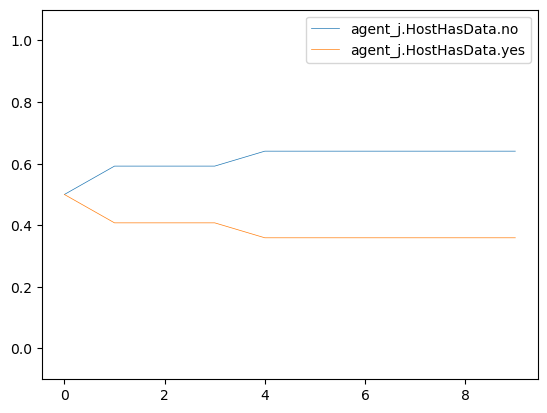

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                        file_enum
3                               1.0                        file_enum
4                               1.0                        file_enum
5                               1.0                        file_enum
6                               1.0                       file_write
7                               1.0                             none
8                               1.0                       file_write
9                               1.0                             none

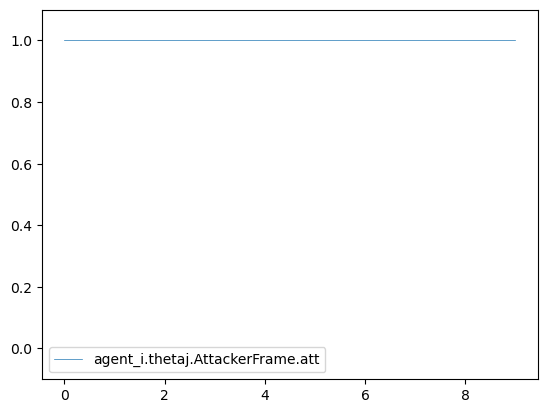

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.436364                        0.563636   
3                         0.532045                        0.467955   
4                         0.555721                        0.444279   
5                         0.522898                        0.477102   
6                         0.555731                        0.444269   
7                         0.555745                        0.444255   
8                         0.555745                        0.444255   
9                         0.555745                        0.444255   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                   user_files                           failure  
1                         none                           failure  
2                   user_files                           success  
3                   user_files                           success  
4                   user_files                           failure  
5                         none                           success  
6                   user_files                           success  
7                   user_files                           failure  
8                   user_files                           failure  
9                   user_files                           success

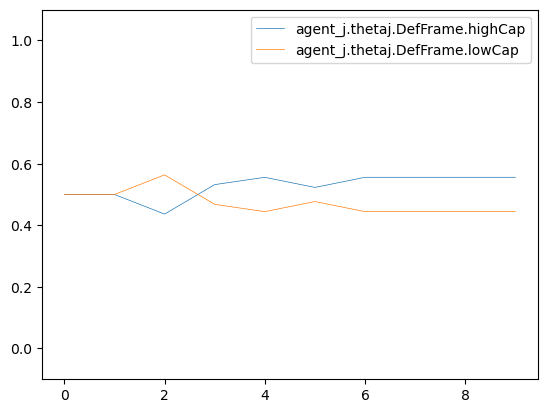

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action  agent_j.action
0                 1.0                  0.0            Nop       FileRecon
1                 1.0                  0.0            Nop    EnumAccounts
2                 1.0                  0.0   DecoyAccount    EnumAccounts
3                 1.0                  0.0            Nop      PrivEscAcc
4                 1.0                  0.0            Nop       FileRecon
5                 1.0                  0.0            Nop       FileRecon
6                 0.0                  1.0            Nop  ManipulateData
7                 0.0                  1.0            Nop            Exit
8                 0.0                  1.0            Nop             Nop
9                 0.0                  1.0            Nop             Nop

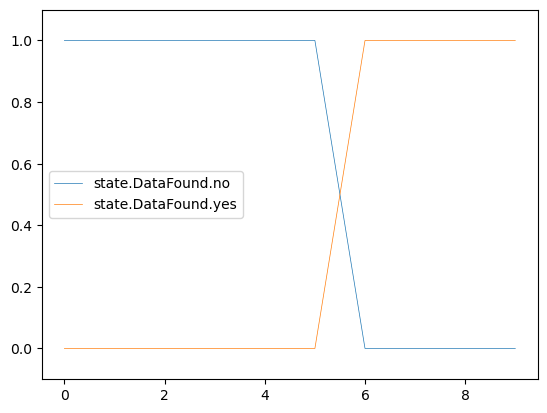

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action  agent_j.action  \
0              1.000000               0.000000            Nop       FileRecon   
1              1.000000               0.000000            Nop    EnumAccounts   
2              1.000000               0.000000   DecoyAccount    EnumAccounts   
3              1.000000               0.000000            Nop      PrivEscAcc   
4              1.000000               0.000000            Nop       FileRecon   
5              0.603686               0.396314            Nop       FileRecon   
6              0.347152               0.652848            Nop  ManipulateData   
7              0.088010               0.911990            Nop            Exit   
8              0.079438               0.920562            Nop             Nop   
9              0.078892               0.921108            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                        file_enum  
3                        file_enum  
4                        file_enum  
5                        file_enum  
6                       file_write  
7                             none  
8                       file_write  
9                             none

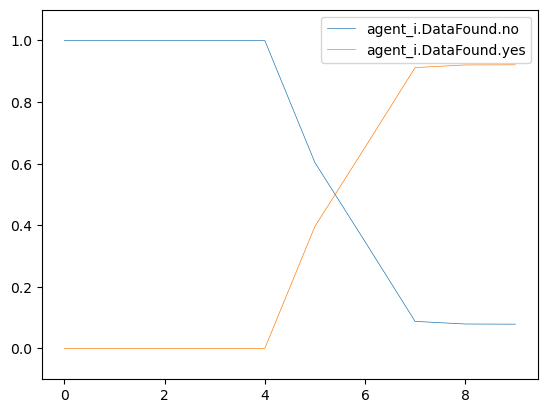

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action agent_i.action  \
0              1.000000               0.000000       FileRecon            Nop   
1              0.976974               0.023026    EnumAccounts            Nop   
2              0.976974               0.023026    EnumAccounts   DecoyAccount   
3              0.976974               0.023026      PrivEscAcc            Nop   
4              0.976974               0.023026       FileRecon            Nop   
5              0.956112               0.043889       FileRecon            Nop   
6              0.380731               0.619269  ManipulateData            Nop   
7              0.000615               0.999385            Exit            Nop   
8              0.000615               0.999385             Nop            Nop   
9              0.000615               0.999385             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                   user_files                           failure  
1                         none                           failure  
2                   user_files                           success  
3                   user_files                           success  
4                   user_files                           failure  
5                         none                           success  
6                   user_files                           success  
7                   user_files                           failure  
8                   user_files                           failure  
9                   user_files                           success

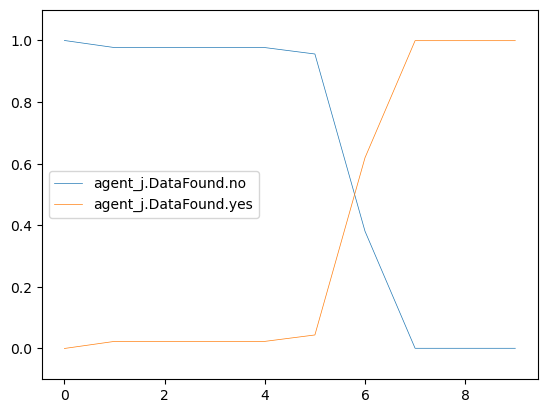

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action  \
0                    1.0                     0.0            Nop   
1                    1.0                     0.0            Nop   
2                    1.0                     0.0   DecoyAccount   
3                    1.0                     0.0            Nop   
4                    1.0                     0.0            Nop   
5                    1.0                     0.0            Nop   
6                    1.0                     0.0            Nop   
7                    0.0                     1.0            Nop   
8                    0.0                     1.0            Nop   
9                    0.0                     1.0            Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2    EnumAccounts  
3      PrivEscAcc  
4       FileRecon  
5       FileRecon  
6  ManipulateData  
7            Exit  
8             Nop  
9             Nop

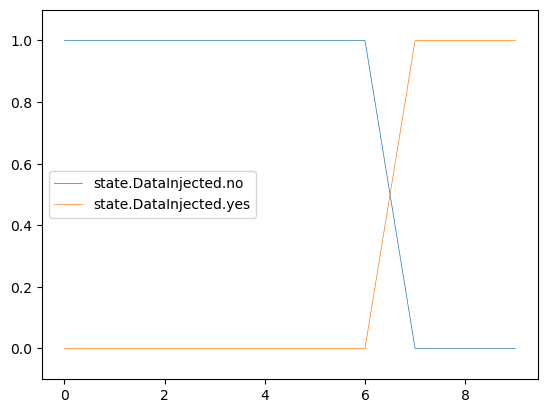

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                 1.000000                  0.000000            Nop   
1                 1.000000                  0.000000            Nop   
2                 1.000000                  0.000000   DecoyAccount   
3                 1.000000                  0.000000            Nop   
4                 1.000000                  0.000000            Nop   
5                 1.000000                  0.000000            Nop   
6                 0.853783                  0.146217            Nop   
7                 0.130260                  0.869740            Nop   
8                 0.084200                  0.915800            Nop   
9                 0.082655                  0.917345            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                        file_enum  
4       FileRecon                        file_enum  
5       FileRecon                        file_enum  
6  ManipulateData                       file_write  
7            Exit                             none  
8             Nop                       file_write  
9             Nop                             none

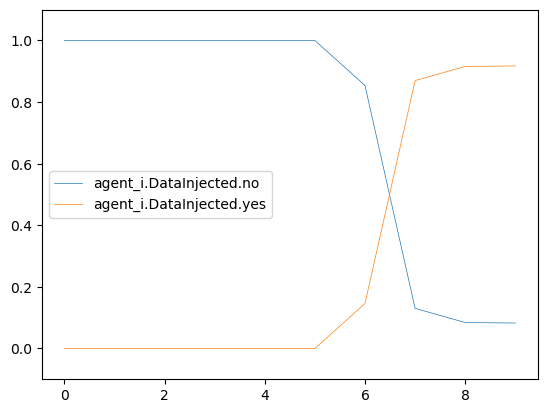

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000    EnumAccounts   
2                 1.000000                  0.000000    EnumAccounts   
3                 1.000000                  0.000000      PrivEscAcc   
4                 1.000000                  0.000000       FileRecon   
5                 1.000000                  0.000000       FileRecon   
6                 1.000000                  0.000000  ManipulateData   
7                 0.000615                  0.999385            Exit   
8                 0.000615                  0.999385             Nop   
9                 0.000615                  0.999385             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1            Nop                         none   
2   DecoyAccount                   user_files   
3            Nop                   user_files   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           success  
3                           success  
4                           failure  
5                           success  
6                           success  
7                           failure  
8                           failure  
9                           success

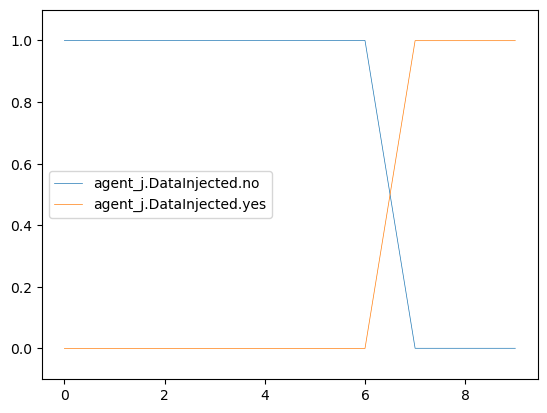

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0            Nop   
1                     0.0                     1.0            Nop   
2                     0.0                     1.0   DecoyAccount   
3                     0.0                     1.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2    EnumAccounts  
3      PrivEscAcc  
4       FileRecon  
5       FileRecon  
6  ManipulateData  
7            Exit  
8             Nop  
9             Nop

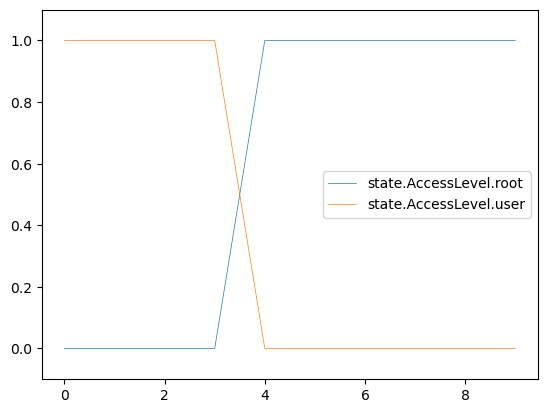

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                  0.000000                  1.000000            Nop   
1                  0.000000                  1.000000            Nop   
2                  0.000000                  1.000000   DecoyAccount   
3                  0.000000                  1.000000            Nop   
4                  0.176409                  0.823591            Nop   
5                  0.609139                  0.390861            Nop   
6                  0.829030                  0.170970            Nop   
7                  0.957097                  0.042903            Nop   
8                  0.955112                  0.044888            Nop   
9                  0.955455                  0.044545            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                        file_enum  
4       FileRecon                        file_enum  
5       FileRecon                        file_enum  
6  ManipulateData                       file_write  
7            Exit                             none  
8             Nop                       file_write  
9             Nop                             none

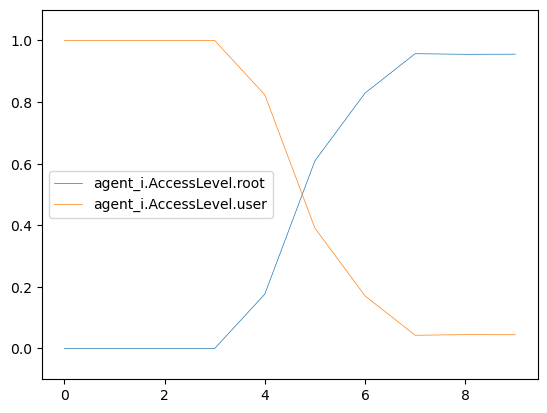

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000                  1.000000       FileRecon   
1                  0.000000                  1.000000    EnumAccounts   
2                  0.000000                  1.000000    EnumAccounts   
3                  0.000000                  1.000000      PrivEscAcc   
4                  0.999651                  0.000349       FileRecon   
5                  0.999496                  0.000505       FileRecon   
6                  0.999756                  0.000244  ManipulateData   
7                  0.999913                  0.000087            Exit   
8                  0.999913                  0.000087             Nop   
9                  0.999913                  0.000087             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1            Nop                         none   
2   DecoyAccount                   user_files   
3            Nop                   user_files   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           success  
3                           success  
4                           failure  
5                           success  
6                           success  
7                           failure  
8                           failure  
9                           success

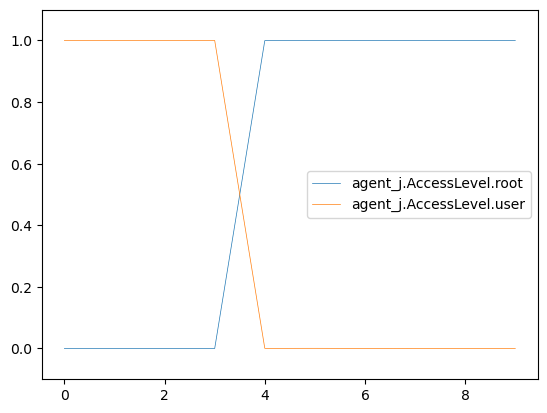

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action  agent_j.action
0                 0.0                  1.0            Nop       FileRecon
1                 0.0                  1.0            Nop    EnumAccounts
2                 0.0                  1.0   DecoyAccount    EnumAccounts
3                 0.0                  1.0            Nop      PrivEscAcc
4                 0.0                  1.0            Nop       FileRecon
5                 0.0                  1.0            Nop       FileRecon
6                 0.0                  1.0            Nop  ManipulateData
7                 0.0                  1.0            Nop            Exit
8                 1.0                  0.0            Nop             Nop
9                 1.0                  0.0            Nop             Nop

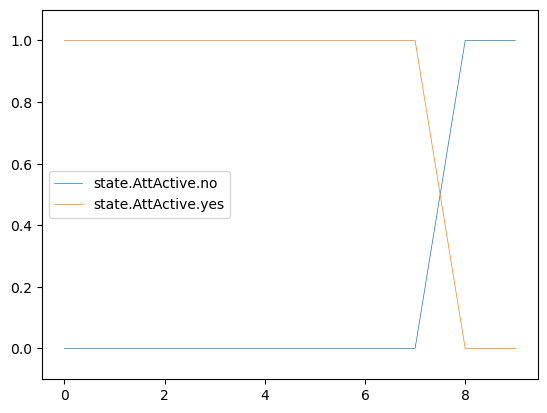

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action  agent_j.action  \
0              0.000000               1.000000            Nop       FileRecon   
1              0.000000               1.000000            Nop    EnumAccounts   
2              0.000000               1.000000   DecoyAccount    EnumAccounts   
3              0.000002               0.999998            Nop      PrivEscAcc   
4              0.007336               0.992664            Nop       FileRecon   
5              0.293202               0.706798            Nop       FileRecon   
6              0.155089               0.844911            Nop  ManipulateData   
7              0.080552               0.919448            Nop            Exit   
8              0.992232               0.007768            Nop             Nop   
9              0.990614               0.009386            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                        file_enum  
3                        file_enum  
4                        file_enum  
5                        file_enum  
6                       file_write  
7                             none  
8                       file_write  
9                             none

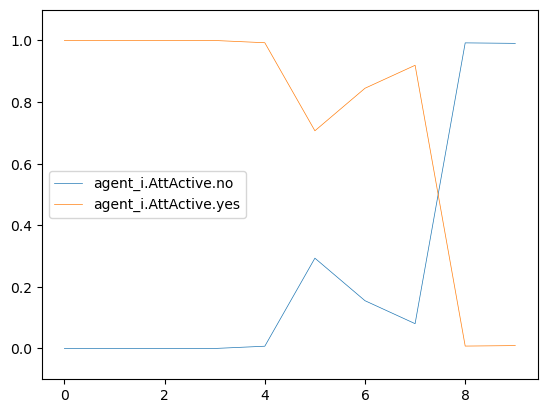

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action agent_i.action  \
0                   0.0                    1.0       FileRecon            Nop   
1                   0.0                    1.0    EnumAccounts            Nop   
2                   0.0                    1.0    EnumAccounts   DecoyAccount   
3                   0.0                    1.0      PrivEscAcc            Nop   
4                   0.0                    1.0       FileRecon            Nop   
5                   0.0                    1.0       FileRecon            Nop   
6                   0.0                    1.0  ManipulateData            Nop   
7                   0.0                    1.0            Exit            Nop   
8                   1.0                    0.0             Nop            Nop   
9                   1.0                    0.0             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                   user_files                           failure  
1                         none                           failure  
2                   user_files                           success  
3                   user_files                           success  
4                   user_files                           failure  
5                         none                           success  
6                   user_files                           success  
7                   user_files                           failure  
8                   user_files                           failure  
9                   user_files                           success

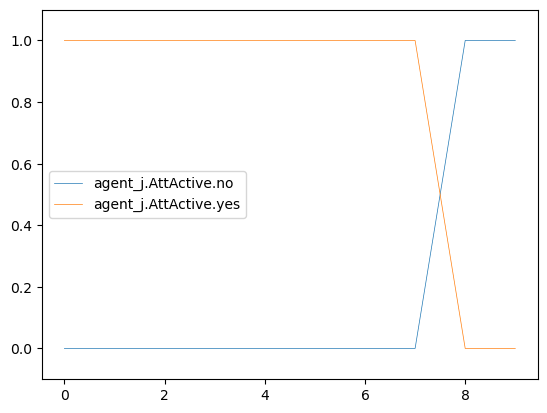

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action  agent_j.action  
0                      1.0            Nop       FileRecon  
1                      1.0            Nop    EnumAccounts  
2                      1.0   DecoyAccount    EnumAccounts  
3                      1.0            Nop      PrivEscAcc  
4                      1.0            Nop       FileRecon  
5                      1.0            Nop       FileRecon  
6                      1.0            Nop  ManipulateData  
7                      1.0            Nop            Exit  
8                      1.0            Nop             Nop  
9                      1.0            Nop             Nop

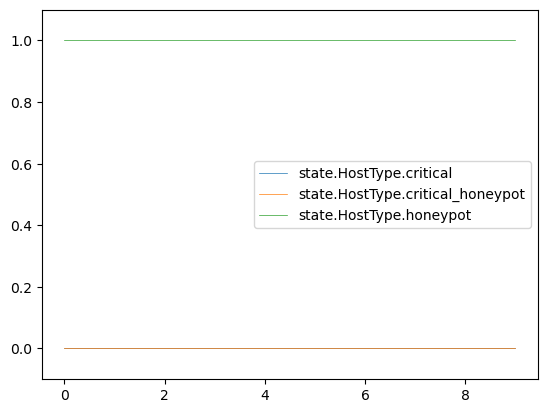

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action  agent_j.action  \
0                        1.0            Nop       FileRecon   
1                        1.0            Nop    EnumAccounts   
2                        1.0   DecoyAccount    EnumAccounts   
3                        1.0            Nop      PrivEscAcc   
4                        1.0            Nop       FileRecon   
5                        1.0            Nop       FileRecon   
6                        1.0            Nop  ManipulateData   
7                        1.0            Nop            Exit   
8                        1.0            Nop             Nop   
9                        1.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                        file_enum  
3                        file_enum  
4                        file_enum  
5                        file_enum  
6                       file_write  
7                             none  
8                       file_write  
9                             none

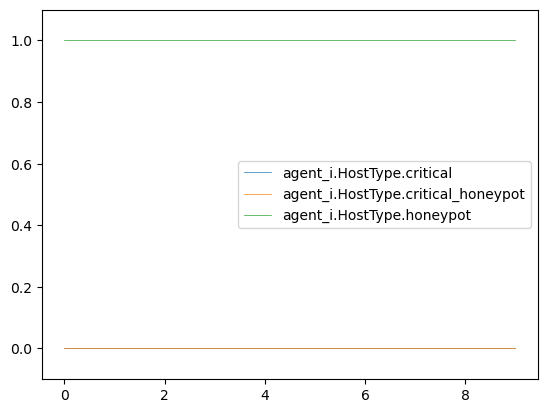

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                   0.500000                                 0.0   
1                   0.700000                                 0.0   
2                   0.563636                                 0.0   
3                   0.655137                                 0.0   
4                   0.600252                                 0.0   
5                   0.777972                                 0.0   
6                   0.600229                                 0.0   
7                   0.600196                                 0.0   
8                   0.600196                                 0.0   
9                   0.600196                                 0.0   

   agent_j.HostType.honeypot  agent_j.action agent_i.action  \
0                   0.500000       FileRecon            Nop   
1                   0.300000    EnumAccounts            Nop   
2                   0.436364    EnumAccounts   DecoyAccount   
3                   0.344863      PrivEscAcc            Nop   
4                   0.399748       FileRecon            Nop   
5                   0.222028       FileRecon            Nop   
6                   0.399770  ManipulateData            Nop   
7                   0.399804            Exit            Nop   
8                   0.399804             Nop            Nop   
9                   0.399804             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                   user_files                           failure  
1                         none                           failure  
2                   user_files                           success  
3                   user_files                           success  
4                   user_files                           failure  
5                         none                           success  
6                   user_files                           success  
7                   user_files                           failure  
8                   user_files                           failure  
9                   user_files                           success

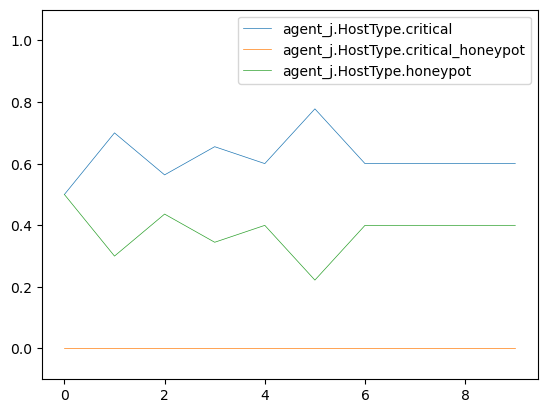

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action  agent_j.action
0                1.0                 0.0            Nop       FileRecon
1                1.0                 0.0            Nop    EnumAccounts
2                1.0                 0.0   DecoyAccount    EnumAccounts
3                0.0                 1.0            Nop      PrivEscAcc
4                0.0                 1.0            Nop       FileRecon
5                0.0                 1.0            Nop       FileRecon
6                0.0                 1.0            Nop  ManipulateData
7                0.0                 1.0            Nop            Exit
8                0.0                 1.0            Nop             Nop
9                0.0                 1.0            Nop             Nop

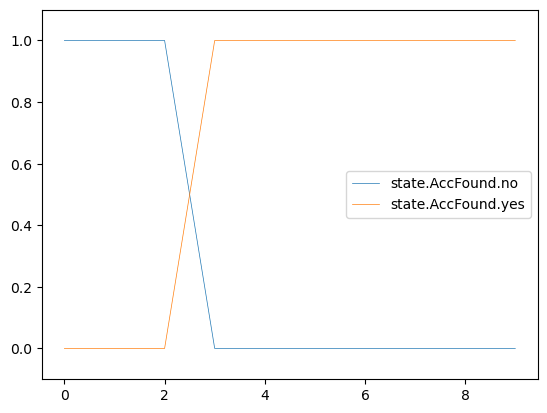

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action  agent_j.action  \
0             1.000000              0.000000            Nop       FileRecon   
1             1.000000              0.000000            Nop    EnumAccounts   
2             1.000000              0.000000   DecoyAccount    EnumAccounts   
3             0.371711              0.628289            Nop      PrivEscAcc   
4             0.584621              0.415379            Nop       FileRecon   
5             0.316828              0.683172            Nop       FileRecon   
6             0.133133              0.866867            Nop  ManipulateData   
7             0.034939              0.965061            Nop            Exit   
8             0.036563              0.963437            Nop             Nop   
9             0.036283              0.963717            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                        file_enum  
3                        file_enum  
4                        file_enum  
5                        file_enum  
6                       file_write  
7                             none  
8                       file_write  
9                             none

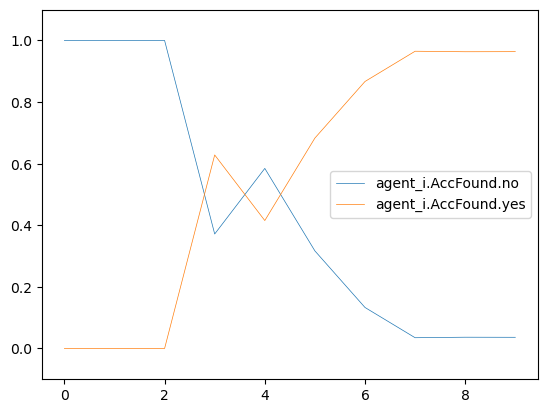

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action agent_i.action  \
0             1.000000              0.000000       FileRecon            Nop   
1             1.000000              0.000000    EnumAccounts            Nop   
2             0.920455              0.079545    EnumAccounts   DecoyAccount   
3             0.242497              0.757503      PrivEscAcc            Nop   
4             0.000327              0.999673       FileRecon            Nop   
5             0.000469              0.999531       FileRecon            Nop   
6             0.000228              0.999772  ManipulateData            Nop   
7             0.000081              0.999919            Exit            Nop   
8             0.000081              0.999919             Nop            Nop   
9             0.000081              0.999919             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                   user_files                           failure  
1                         none                           failure  
2                   user_files                           success  
3                   user_files                           success  
4                   user_files                           failure  
5                         none                           success  
6                   user_files                           success  
7                   user_files                           failure  
8                   user_files                           failure  
9                   user_files                           success

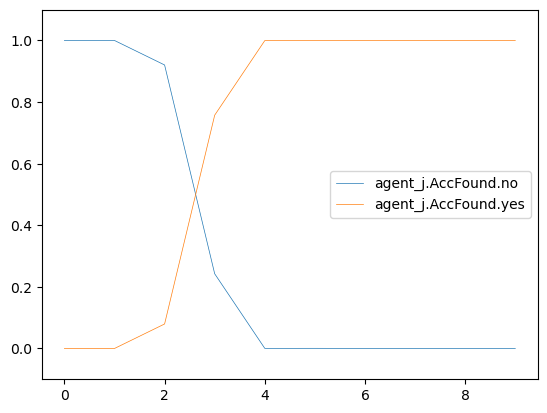

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action  agent_j.action
0                   1.0                    0.0            Nop       FileRecon
1                   1.0                    0.0            Nop    EnumAccounts
2                   1.0                    0.0   DecoyAccount    EnumAccounts
3                   0.0                    1.0            Nop      PrivEscAcc
4                   0.0                    1.0            Nop       FileRecon
5                   0.0                    1.0            Nop       FileRecon
6                   0.0                    1.0            Nop  ManipulateData
7                   0.0                    1.0            Nop            Exit
8                   0.0                    1.0            Nop             Nop
9                   0.0                    1.0            Nop             Nop

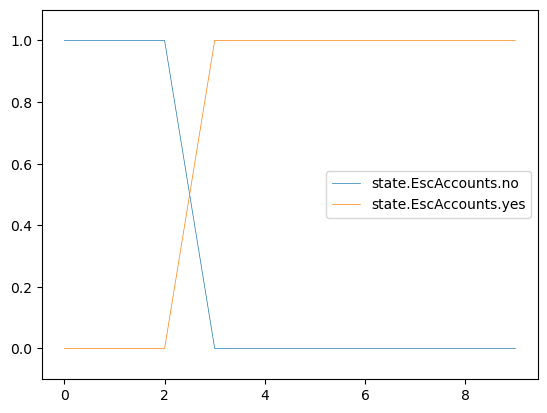

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0            Nop   
2                     1.0                      0.0   DecoyAccount   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                        file_enum  
4       FileRecon                        file_enum  
5       FileRecon                        file_enum  
6  ManipulateData                       file_write  
7            Exit                             none  
8             Nop                       file_write  
9             Nop                             none

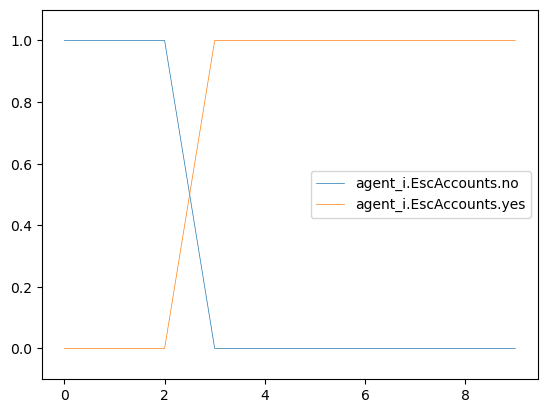

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.500000                 0.500000    EnumAccounts   
2                0.613636                 0.386364    EnumAccounts   
3                0.216175                 0.783825      PrivEscAcc   
4                0.000292                 0.999708       FileRecon   
5                0.000425                 0.999575       FileRecon   
6                0.000204                 0.999796  ManipulateData   
7                0.000073                 0.999927            Exit   
8                0.000073                 0.999927             Nop   
9                0.000073                 0.999927             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1            Nop                         none   
2   DecoyAccount                   user_files   
3            Nop                   user_files   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           success  
3                           success  
4                           failure  
5                           success  
6                           success  
7                           failure  
8                           failure  
9                           success

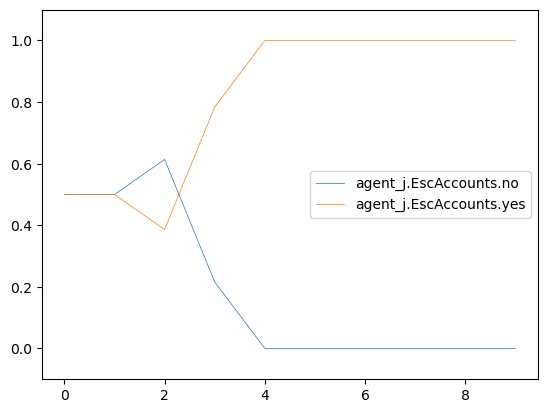

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action  agent_j.action
0                   1.0                   0.0            Nop       FileRecon
1                   1.0                   0.0            Nop    EnumAccounts
2                   1.0                   0.0   DecoyAccount    EnumAccounts
3                   1.0                   0.0            Nop      PrivEscAcc
4                   1.0                   0.0            Nop       FileRecon
5                   1.0                   0.0            Nop       FileRecon
6                   1.0                   0.0            Nop  ManipulateData
7                   1.0                   0.0            Nop            Exit
8                   1.0                   0.0            Nop             Nop
9                   1.0                   0.0            Nop             Nop

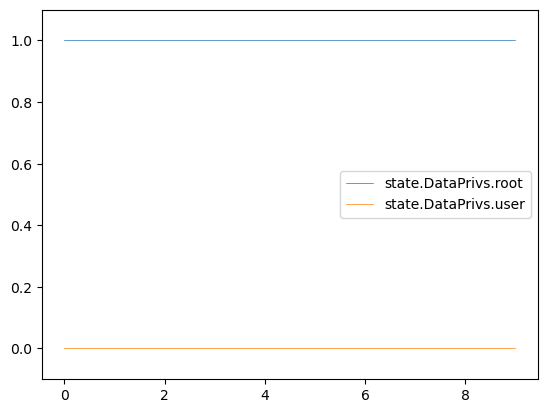

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0            Nop   
2                     1.0                     0.0   DecoyAccount   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                        file_enum  
4       FileRecon                        file_enum  
5       FileRecon                        file_enum  
6  ManipulateData                       file_write  
7            Exit                             none  
8             Nop                       file_write  
9             Nop                             none

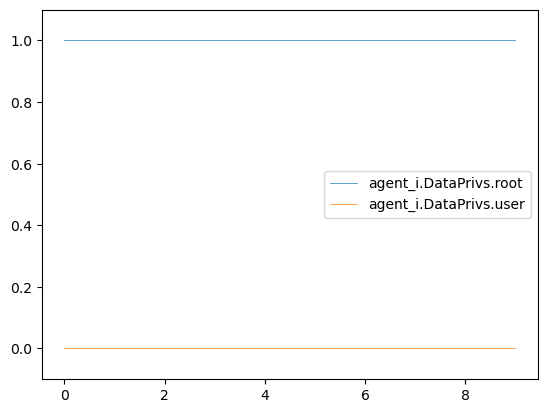

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000       FileRecon   
1                0.592105                0.407895    EnumAccounts   
2                0.592105                0.407895    EnumAccounts   
3                0.592105                0.407895      PrivEscAcc   
4                0.592105                0.407895       FileRecon   
5                0.551211                0.448789       FileRecon   
6                0.661623                0.338377  ManipulateData   
7                0.751652                0.248348            Exit   
8                0.751652                0.248348             Nop   
9                0.751652                0.248348             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1            Nop                         none   
2   DecoyAccount                   user_files   
3            Nop                   user_files   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           success  
3                           success  
4                           failure  
5                           success  
6                           success  
7                           failure  
8                           failure  
9                           success

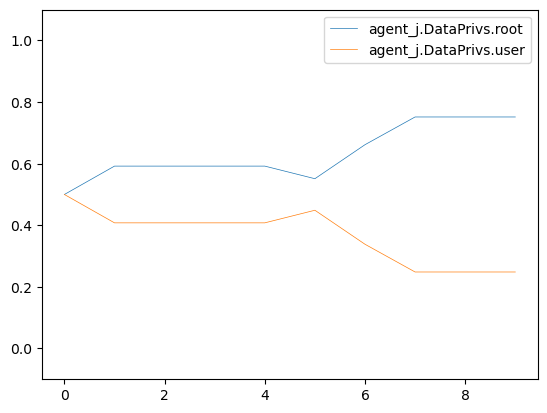

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action  agent_j.action
0                   0.0                    1.0            Nop       FileRecon
1                   0.0                    1.0            Nop    EnumAccounts
2                   0.0                    1.0   DecoyAccount    EnumAccounts
3                   0.0                    1.0            Nop      PrivEscAcc
4                   0.0                    1.0            Nop       FileRecon
5                   0.0                    1.0            Nop       FileRecon
6                   0.0                    1.0            Nop  ManipulateData
7                   0.0                    1.0            Nop            Exit
8                   0.0                    1.0            Nop             Nop
9                   0.0                    1.0            Nop             Nop

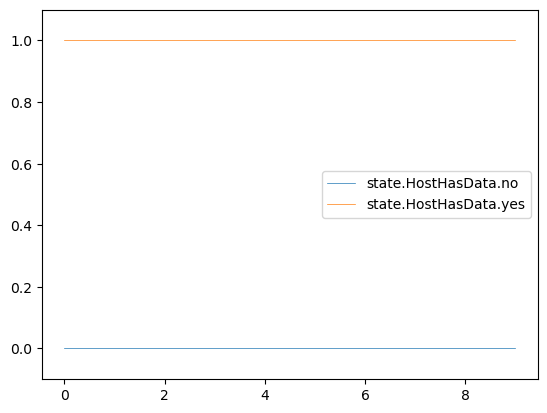

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0            Nop   
2                     0.0                      1.0   DecoyAccount   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                        file_enum  
4       FileRecon                        file_enum  
5       FileRecon                        file_enum  
6  ManipulateData                       file_write  
7            Exit                             none  
8             Nop                       file_write  
9             Nop                             none

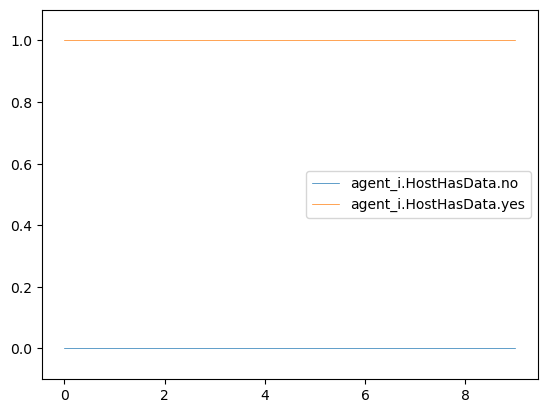

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.592105                 0.407895    EnumAccounts   
2                0.592105                 0.407895    EnumAccounts   
3                0.592105                 0.407895      PrivEscAcc   
4                0.592105                 0.407895       FileRecon   
5                0.799999                 0.200001       FileRecon   
6                0.359635                 0.640365  ManipulateData   
7                0.000581                 0.999419            Exit   
8                0.000581                 0.999419             Nop   
9                0.000581                 0.999419             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                   user_files   
1            Nop                         none   
2   DecoyAccount                   user_files   
3            Nop                   user_files   
4            Nop                   user_files   
5            Nop                         none   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                   user_files   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           success  
3                           success  
4                           failure  
5                           success  
6                           success  
7                           failure  
8                           failure  
9                           success

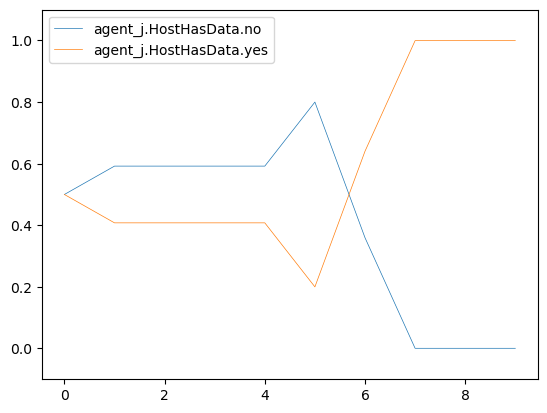

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                        file_enum
3                               1.0                       file_write
4                               1.0                        file_enum
5                               1.0                       file_write
6                               1.0                             none
7                               1.0                             none
8                               1.0                             none
9                               1.0                        file_enum

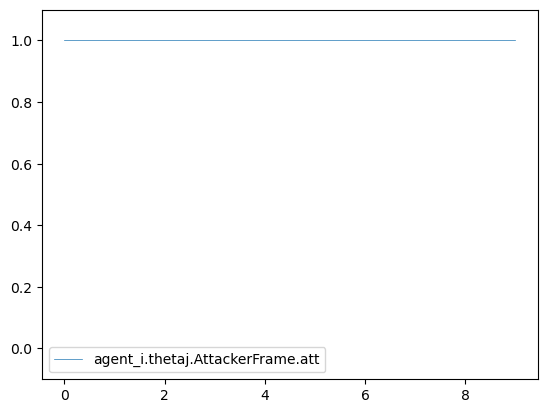

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.382131                        0.617869   
3                         0.587324                        0.412676   
4                         0.657676                        0.342324   
5                         0.647097                        0.352902   
6                         0.647115                        0.352886   
7                         0.647114                        0.352886   
8                         0.647114                        0.352886   
9                         0.647114                        0.352886   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           failure  
2                         none                           success  
3                         none                           success  
4                   user_files                           success  
5                   user_files                           success  
6                   user_files                           failure  
7                   user_files                           success  
8                   user_files                           success  
9                         none                           failure

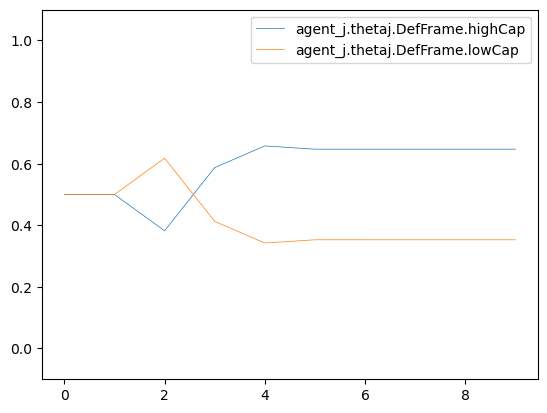

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action  agent_j.action
0                 1.0                  0.0            Nop       FileRecon
1                 1.0                  0.0            Nop    EnumAccounts
2                 1.0                  0.0   DecoyAccount    EnumAccounts
3                 1.0                  0.0            Nop      PrivEscAcc
4                 1.0                  0.0            Nop       FileRecon
5                 0.0                  1.0            Nop  ManipulateData
6                 0.0                  1.0            Nop            Exit
7                 0.0                  1.0            Nop             Nop
8                 0.0                  1.0            Nop             Nop
9                 0.0                  1.0            Nop             Nop

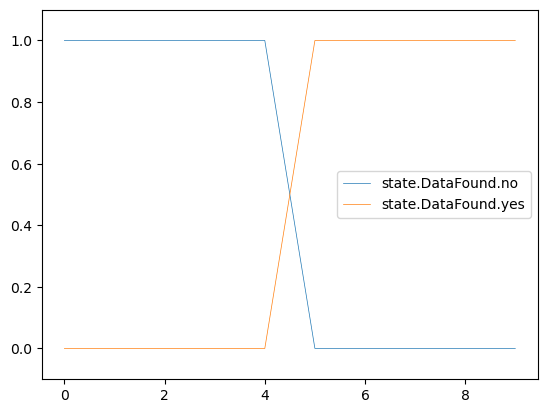

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action  agent_j.action  \
0              1.000000               0.000000            Nop       FileRecon   
1              1.000000               0.000000            Nop    EnumAccounts   
2              1.000000               0.000000   DecoyAccount    EnumAccounts   
3              1.000000               0.000000            Nop      PrivEscAcc   
4              1.000000               0.000000            Nop       FileRecon   
5              0.407781               0.592218            Nop  ManipulateData   
6              0.097687               0.902312            Nop            Exit   
7              0.047101               0.952899            Nop             Nop   
8              0.045406               0.954594            Nop             Nop   
9              0.045403               0.954597            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                        file_enum  
3                       file_write  
4                        file_enum  
5                       file_write  
6                             none  
7                             none  
8                             none  
9                        file_enum

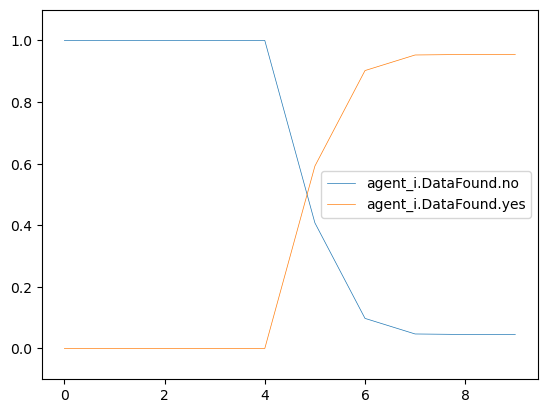

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action agent_i.action  \
0              1.000000               0.000000       FileRecon            Nop   
1              0.976974               0.023026    EnumAccounts            Nop   
2              0.976974               0.023026    EnumAccounts   DecoyAccount   
3              0.976974               0.023026      PrivEscAcc            Nop   
4              0.976974               0.023026       FileRecon            Nop   
5              0.211912               0.788088  ManipulateData            Nop   
6              0.000269               0.999731            Exit            Nop   
7              0.000269               0.999731             Nop            Nop   
8              0.000269               0.999731             Nop            Nop   
9              0.000269               0.999731             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           failure  
2                         none                           success  
3                         none                           success  
4                   user_files                           success  
5                   user_files                           success  
6                   user_files                           failure  
7                   user_files                           success  
8                   user_files                           success  
9                         none                           failure

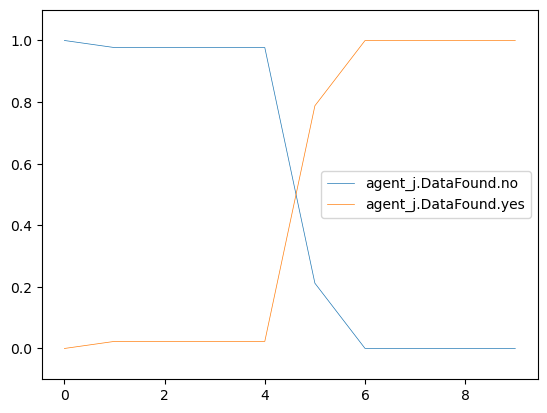

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action  \
0                    1.0                     0.0            Nop   
1                    1.0                     0.0            Nop   
2                    1.0                     0.0   DecoyAccount   
3                    1.0                     0.0            Nop   
4                    1.0                     0.0            Nop   
5                    1.0                     0.0            Nop   
6                    0.0                     1.0            Nop   
7                    0.0                     1.0            Nop   
8                    0.0                     1.0            Nop   
9                    0.0                     1.0            Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2    EnumAccounts  
3      PrivEscAcc  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

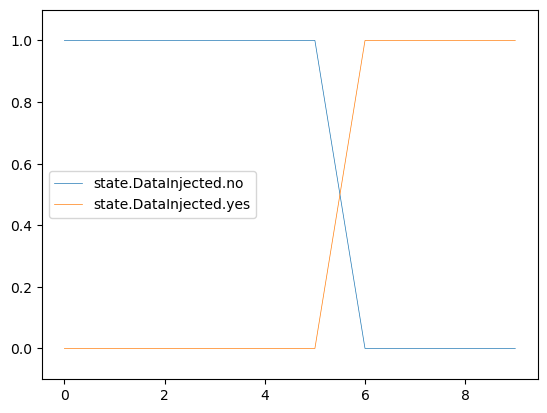

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                 1.000000                  0.000000            Nop   
1                 1.000000                  0.000000            Nop   
2                 1.000000                  0.000000   DecoyAccount   
3                 1.000000                  0.000000            Nop   
4                 1.000000                  0.000000            Nop   
5                 1.000000                  0.000000            Nop   
6                 0.149089                  0.850911            Nop   
7                 0.054019                  0.945981            Nop   
8                 0.045914                  0.954086            Nop   
9                 0.045678                  0.954322            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                       file_write  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                        file_enum

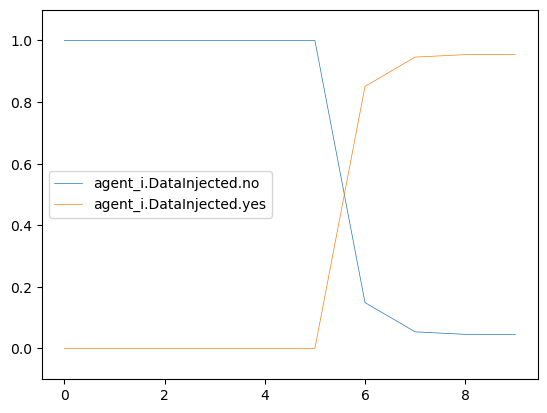

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000    EnumAccounts   
2                 1.000000                  0.000000    EnumAccounts   
3                 1.000000                  0.000000      PrivEscAcc   
4                 1.000000                  0.000000       FileRecon   
5                 1.000000                  0.000000  ManipulateData   
6                 0.000269                  0.999731            Exit   
7                 0.000269                  0.999731             Nop   
8                 0.000269                  0.999731             Nop   
9                 0.000269                  0.999731             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2   DecoyAccount                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           success  
3                           success  
4                           success  
5                           success  
6                           failure  
7                           success  
8                           success  
9                           failure

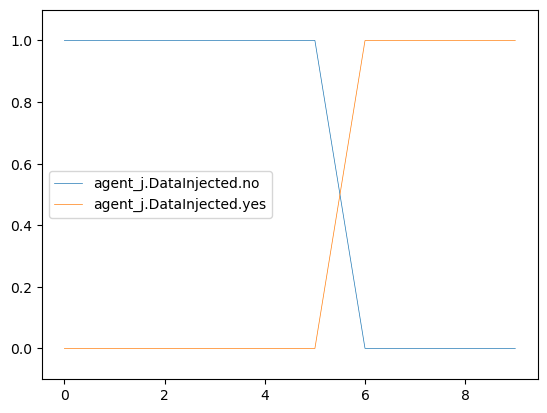

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0            Nop   
1                     0.0                     1.0            Nop   
2                     0.0                     1.0   DecoyAccount   
3                     0.0                     1.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2    EnumAccounts  
3      PrivEscAcc  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

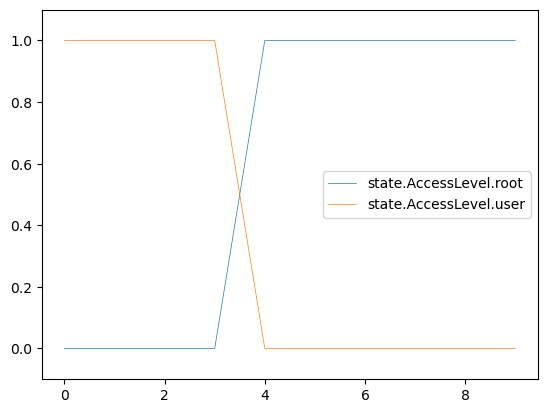

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                  0.000000                  1.000000            Nop   
1                  0.000000                  1.000000            Nop   
2                  0.000000                  1.000000   DecoyAccount   
3                  0.000000                  1.000000            Nop   
4                  0.537382                  0.462618            Nop   
5                  0.855209                  0.144792            Nop   
6                  0.959258                  0.040742            Nop   
7                  0.956052                  0.043948            Nop   
8                  0.955713                  0.044287            Nop   
9                  0.955704                  0.044296            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                       file_write  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                        file_enum

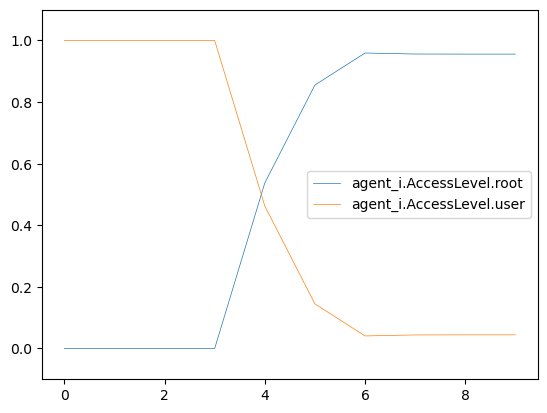

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000                  1.000000       FileRecon   
1                  0.000000                  1.000000    EnumAccounts   
2                  0.000000                  1.000000    EnumAccounts   
3                  0.000000                  1.000000      PrivEscAcc   
4                  0.999822                  0.000178       FileRecon   
5                  0.999901                  0.000099  ManipulateData   
6                  0.999943                  0.000057            Exit   
7                  0.999943                  0.000057             Nop   
8                  0.999943                  0.000057             Nop   
9                  0.999943                  0.000057             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2   DecoyAccount                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           success  
3                           success  
4                           success  
5                           success  
6                           failure  
7                           success  
8                           success  
9                           failure

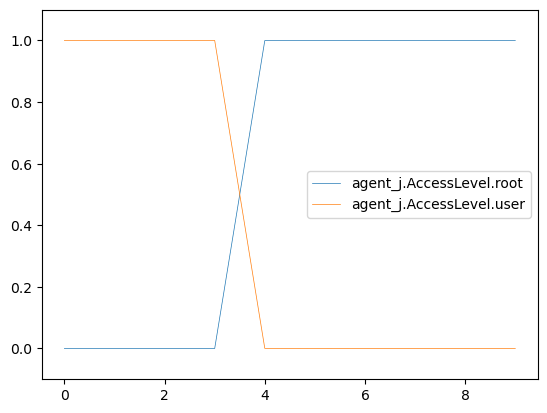

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action  agent_j.action
0                 0.0                  1.0            Nop       FileRecon
1                 0.0                  1.0            Nop    EnumAccounts
2                 0.0                  1.0   DecoyAccount    EnumAccounts
3                 0.0                  1.0            Nop      PrivEscAcc
4                 0.0                  1.0            Nop       FileRecon
5                 0.0                  1.0            Nop  ManipulateData
6                 0.0                  1.0            Nop            Exit
7                 1.0                  0.0            Nop             Nop
8                 1.0                  0.0            Nop             Nop
9                 1.0                  0.0            Nop             Nop

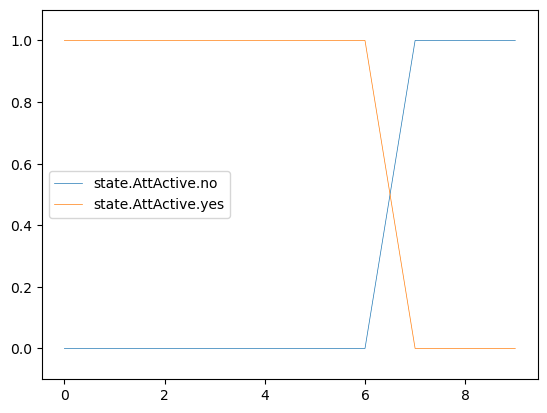

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action  agent_j.action  \
0              0.000000               1.000000            Nop       FileRecon   
1              0.000000               1.000000            Nop    EnumAccounts   
2              0.000000               1.000000   DecoyAccount    EnumAccounts   
3              0.000002               0.999998            Nop      PrivEscAcc   
4              0.022347               0.977653            Nop       FileRecon   
5              0.079663               0.920337            Nop  ManipulateData   
6              0.030186               0.969814            Nop            Exit   
7              0.982650               0.017350            Nop             Nop   
8              0.998709               0.001291            Nop             Nop   
9              0.999964               0.000036            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                        file_enum  
3                       file_write  
4                        file_enum  
5                       file_write  
6                             none  
7                             none  
8                             none  
9                        file_enum

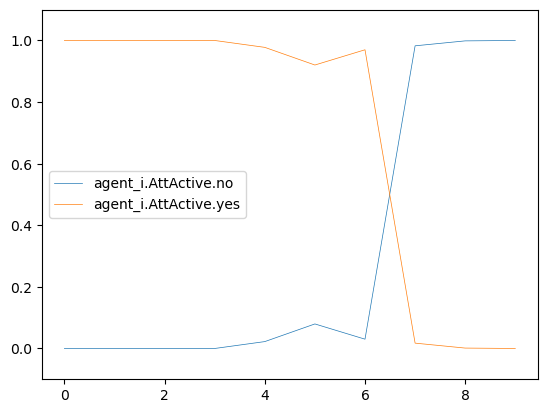

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action agent_i.action  \
0                   0.0                    1.0       FileRecon            Nop   
1                   0.0                    1.0    EnumAccounts            Nop   
2                   0.0                    1.0    EnumAccounts   DecoyAccount   
3                   0.0                    1.0      PrivEscAcc            Nop   
4                   0.0                    1.0       FileRecon            Nop   
5                   0.0                    1.0  ManipulateData            Nop   
6                   0.0                    1.0            Exit            Nop   
7                   1.0                    0.0             Nop            Nop   
8                   1.0                    0.0             Nop            Nop   
9                   1.0                    0.0             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           failure  
2                         none                           success  
3                         none                           success  
4                   user_files                           success  
5                   user_files                           success  
6                   user_files                           failure  
7                   user_files                           success  
8                   user_files                           success  
9                         none                           failure

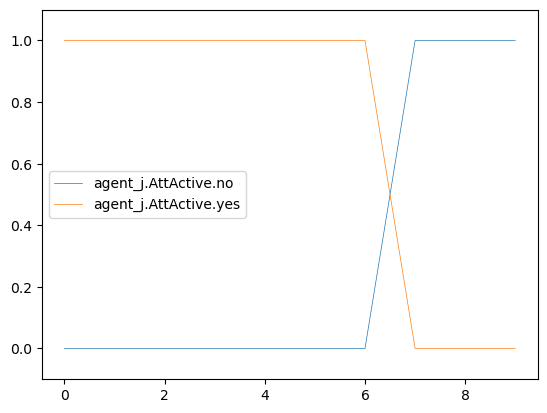

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action  agent_j.action  
0                      1.0            Nop       FileRecon  
1                      1.0            Nop    EnumAccounts  
2                      1.0   DecoyAccount    EnumAccounts  
3                      1.0            Nop      PrivEscAcc  
4                      1.0            Nop       FileRecon  
5                      1.0            Nop  ManipulateData  
6                      1.0            Nop            Exit  
7                      1.0            Nop             Nop  
8                      1.0            Nop             Nop  
9                      1.0            Nop             Nop

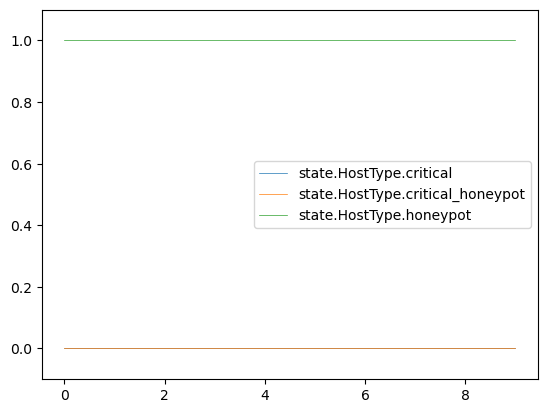

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action  agent_j.action  \
0                        1.0            Nop       FileRecon   
1                        1.0            Nop    EnumAccounts   
2                        1.0   DecoyAccount    EnumAccounts   
3                        1.0            Nop      PrivEscAcc   
4                        1.0            Nop       FileRecon   
5                        1.0            Nop  ManipulateData   
6                        1.0            Nop            Exit   
7                        1.0            Nop             Nop   
8                        1.0            Nop             Nop   
9                        1.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                        file_enum  
3                       file_write  
4                        file_enum  
5                       file_write  
6                             none  
7                             none  
8                             none  
9                        file_enum

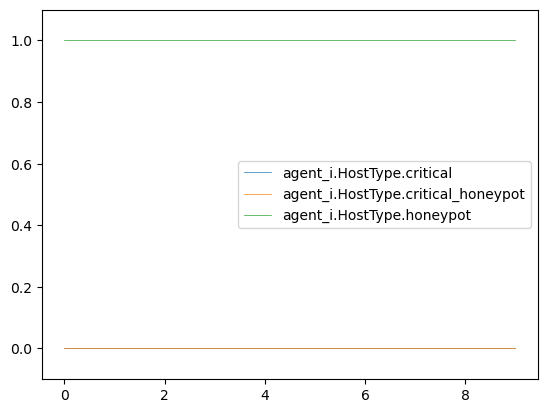

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                   0.500000                                 0.0   
1                   0.300000                                 0.0   
2                   0.191753                                 0.0   
3                   0.060228                                 0.0   
4                   0.048215                                 0.0   
5                   0.105691                                 0.0   
6                   0.105685                                 0.0   
7                   0.105685                                 0.0   
8                   0.105685                                 0.0   
9                   0.105685                                 0.0   

   agent_j.HostType.honeypot  agent_j.action agent_i.action  \
0                   0.500000       FileRecon            Nop   
1                   0.700000    EnumAccounts            Nop   
2                   0.808247    EnumAccounts   DecoyAccount   
3                   0.939772      PrivEscAcc            Nop   
4                   0.951785       FileRecon            Nop   
5                   0.894309  ManipulateData            Nop   
6                   0.894315            Exit            Nop   
7                   0.894315             Nop            Nop   
8                   0.894315             Nop            Nop   
9                   0.894315             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           failure  
2                         none                           success  
3                         none                           success  
4                   user_files                           success  
5                   user_files                           success  
6                   user_files                           failure  
7                   user_files                           success  
8                   user_files                           success  
9                         none                           failure

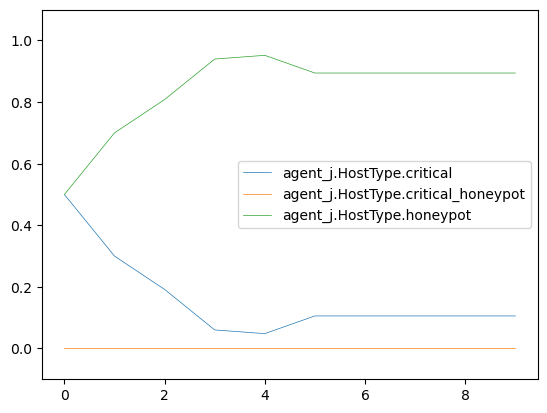

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action  agent_j.action
0                1.0                 0.0            Nop       FileRecon
1                1.0                 0.0            Nop    EnumAccounts
2                1.0                 0.0   DecoyAccount    EnumAccounts
3                0.0                 1.0            Nop      PrivEscAcc
4                0.0                 1.0            Nop       FileRecon
5                0.0                 1.0            Nop  ManipulateData
6                0.0                 1.0            Nop            Exit
7                0.0                 1.0            Nop             Nop
8                0.0                 1.0            Nop             Nop
9                0.0                 1.0            Nop             Nop

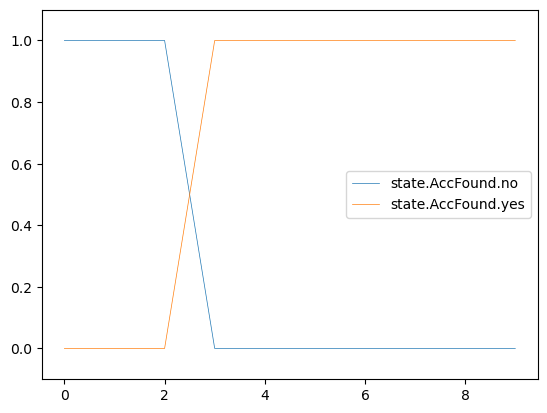

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action  agent_j.action  \
0             1.000000              0.000000            Nop       FileRecon   
1             1.000000              0.000000            Nop    EnumAccounts   
2             1.000000              0.000000   DecoyAccount    EnumAccounts   
3             0.371711              0.628289            Nop      PrivEscAcc   
4             0.358624              0.641376            Nop       FileRecon   
5             0.128763              0.871237            Nop  ManipulateData   
6             0.036058              0.963942            Nop            Exit   
7             0.039740              0.960260            Nop             Nop   
8             0.040046              0.959954            Nop             Nop   
9             0.040055              0.959946            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                        file_enum  
3                       file_write  
4                        file_enum  
5                       file_write  
6                             none  
7                             none  
8                             none  
9                        file_enum

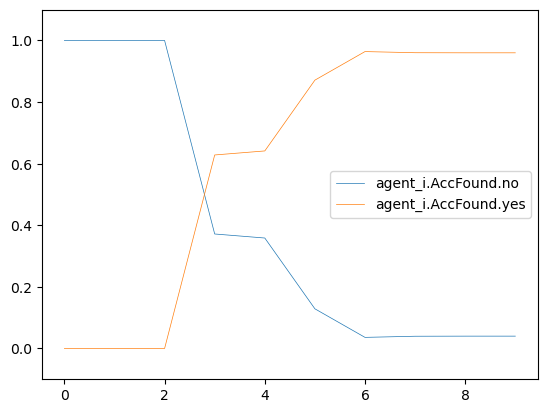

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action agent_i.action  \
0             1.000000              0.000000       FileRecon            Nop   
1             1.000000              0.000000    EnumAccounts            Nop   
2             0.900773              0.099227    EnumAccounts   DecoyAccount   
3             0.149865              0.850135      PrivEscAcc            Nop   
4             0.000177              0.999823       FileRecon            Nop   
5             0.000097              0.999903  ManipulateData            Nop   
6             0.000056              0.999944            Exit            Nop   
7             0.000056              0.999944             Nop            Nop   
8             0.000056              0.999944             Nop            Nop   
9             0.000056              0.999944             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                         none                           failure  
2                         none                           success  
3                         none                           success  
4                   user_files                           success  
5                   user_files                           success  
6                   user_files                           failure  
7                   user_files                           success  
8                   user_files                           success  
9                         none                           failure

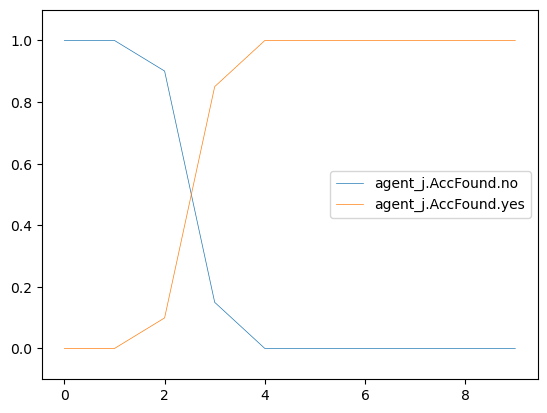

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action  agent_j.action
0                   1.0                    0.0            Nop       FileRecon
1                   1.0                    0.0            Nop    EnumAccounts
2                   1.0                    0.0   DecoyAccount    EnumAccounts
3                   0.0                    1.0            Nop      PrivEscAcc
4                   0.0                    1.0            Nop       FileRecon
5                   0.0                    1.0            Nop  ManipulateData
6                   0.0                    1.0            Nop            Exit
7                   0.0                    1.0            Nop             Nop
8                   0.0                    1.0            Nop             Nop
9                   0.0                    1.0            Nop             Nop

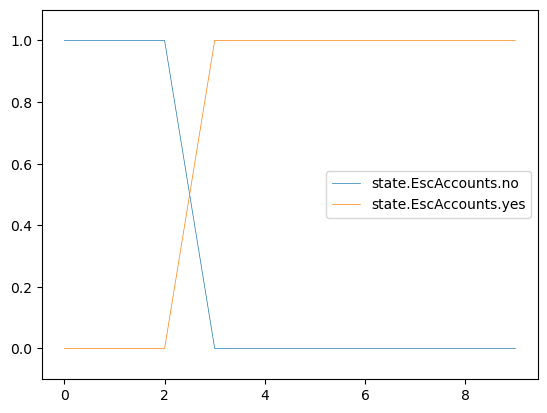

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0            Nop   
2                     1.0                      0.0   DecoyAccount   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                       file_write  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                        file_enum

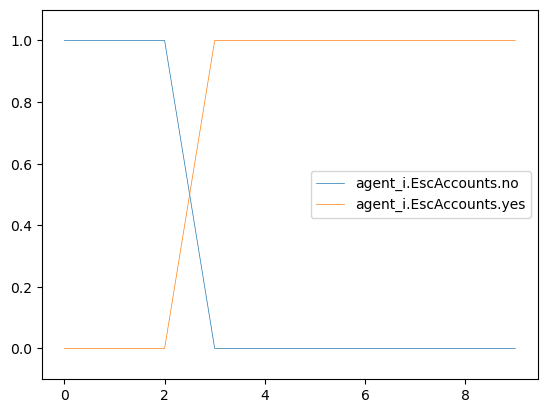

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.500000                 0.500000    EnumAccounts   
2                0.518041                 0.481959    EnumAccounts   
3                0.120323                 0.879677      PrivEscAcc   
4                0.000142                 0.999858       FileRecon   
5                0.000079                 0.999921  ManipulateData   
6                0.000046                 0.999954            Exit   
7                0.000046                 0.999954             Nop   
8                0.000046                 0.999954             Nop   
9                0.000046                 0.999954             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2   DecoyAccount                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           success  
3                           success  
4                           success  
5                           success  
6                           failure  
7                           success  
8                           success  
9                           failure

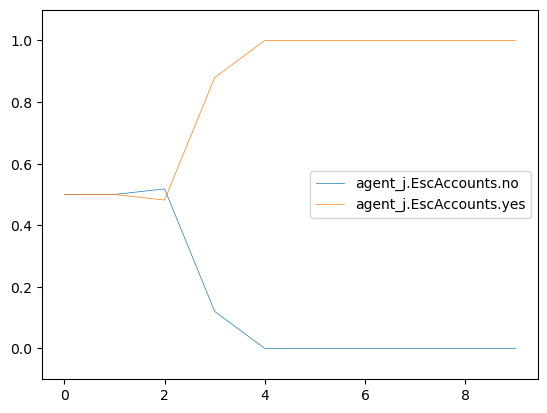

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action  agent_j.action
0                   1.0                   0.0            Nop       FileRecon
1                   1.0                   0.0            Nop    EnumAccounts
2                   1.0                   0.0   DecoyAccount    EnumAccounts
3                   1.0                   0.0            Nop      PrivEscAcc
4                   1.0                   0.0            Nop       FileRecon
5                   1.0                   0.0            Nop  ManipulateData
6                   1.0                   0.0            Nop            Exit
7                   1.0                   0.0            Nop             Nop
8                   1.0                   0.0            Nop             Nop
9                   1.0                   0.0            Nop             Nop

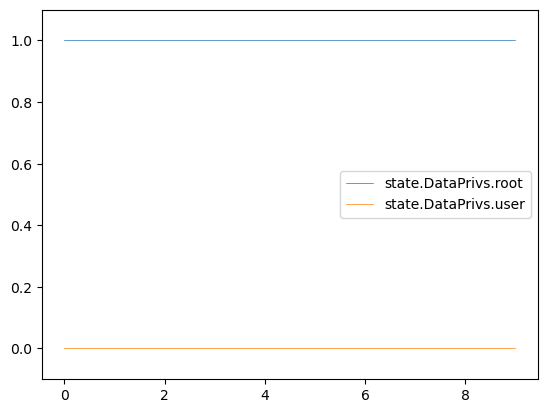

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0            Nop   
2                     1.0                     0.0   DecoyAccount   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                       file_write  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                        file_enum

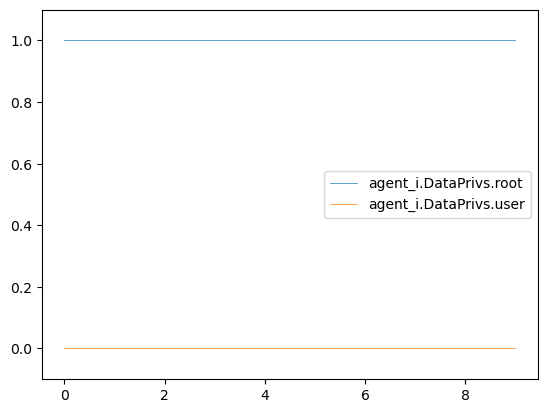

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000       FileRecon   
1                0.592105                0.407895    EnumAccounts   
2                0.592105                0.407895    EnumAccounts   
3                0.592105                0.407895      PrivEscAcc   
4                0.592105                0.407895       FileRecon   
5                0.673727                0.326273  ManipulateData   
6                0.708577                0.291424            Exit   
7                0.708577                0.291424             Nop   
8                0.708577                0.291424             Nop   
9                0.708577                0.291424             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2   DecoyAccount                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           success  
3                           success  
4                           success  
5                           success  
6                           failure  
7                           success  
8                           success  
9                           failure

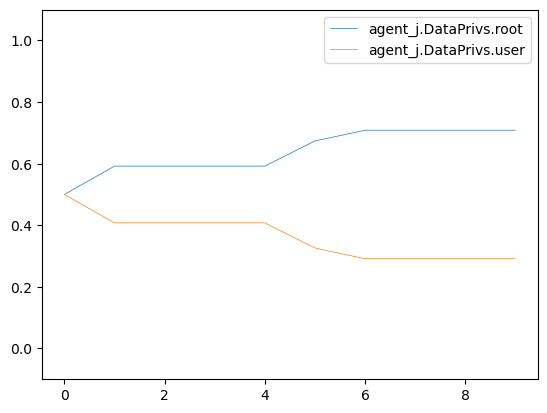

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action  agent_j.action
0                   0.0                    1.0            Nop       FileRecon
1                   0.0                    1.0            Nop    EnumAccounts
2                   0.0                    1.0   DecoyAccount    EnumAccounts
3                   0.0                    1.0            Nop      PrivEscAcc
4                   0.0                    1.0            Nop       FileRecon
5                   0.0                    1.0            Nop  ManipulateData
6                   0.0                    1.0            Nop            Exit
7                   0.0                    1.0            Nop             Nop
8                   0.0                    1.0            Nop             Nop
9                   0.0                    1.0            Nop             Nop

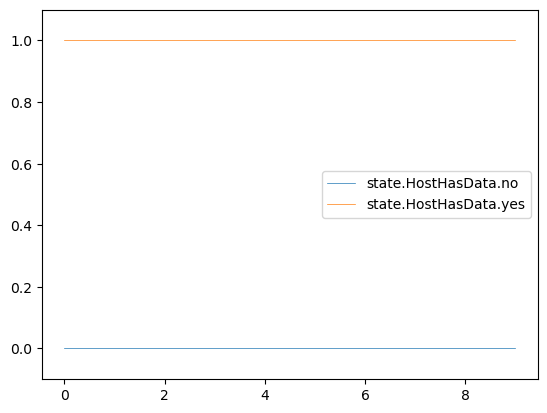

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0            Nop   
2                     0.0                      1.0   DecoyAccount   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                       file_write  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                        file_enum

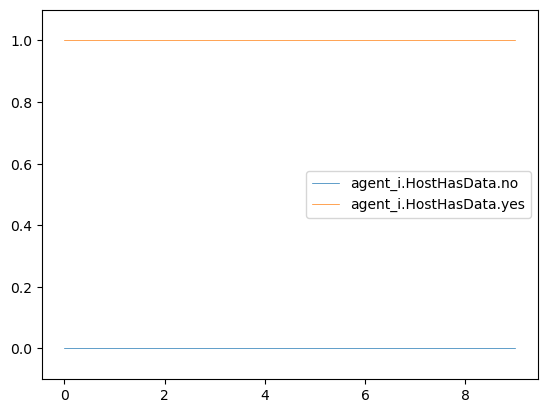

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.592105                 0.407895    EnumAccounts   
2                0.592105                 0.407895    EnumAccounts   
3                0.592105                 0.407895      PrivEscAcc   
4                0.592105                 0.407895       FileRecon   
5                0.177322                 0.822678  ManipulateData   
6                0.000225                 0.999775            Exit   
7                0.000225                 0.999775             Nop   
8                0.000225                 0.999775             Nop   
9                0.000225                 0.999775             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                         none   
2   DecoyAccount                         none   
3            Nop                         none   
4            Nop                   user_files   
5            Nop                   user_files   
6            Nop                   user_files   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           success  
3                           success  
4                           success  
5                           success  
6                           failure  
7                           success  
8                           success  
9                           failure

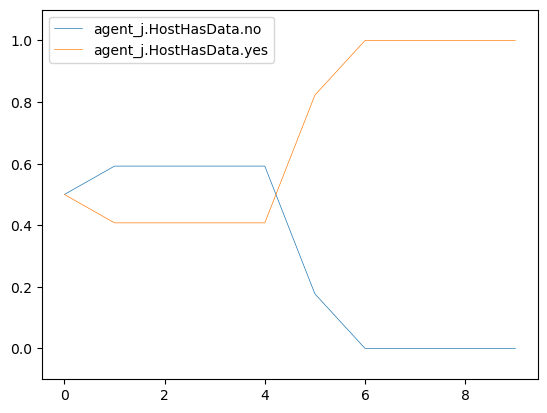

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                   login_activity
1                               1.0                       file_write
2                               1.0                        file_enum
3                               1.0                   login_activity
4                               1.0                        file_enum
5                               1.0                       file_write
6                               1.0                             none
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

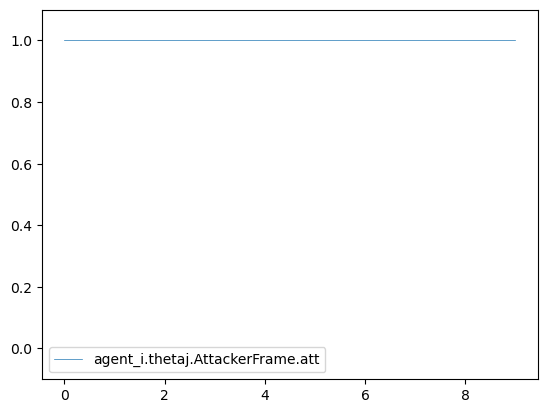

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.436364                        0.563636   
3                         0.568885                        0.431115   
4                         0.626655                        0.373345   
5                         0.647097                        0.352902   
6                         0.647115                        0.352886   
7                         0.647114                        0.352886   
8                         0.647114                        0.352886   
9                         0.647114                        0.352886   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                   user_files                           failure  
2                         none                           success  
3                         none                           success  
4                         none                           success  
5                   user_files                           success  
6                         none                           failure  
7                   user_files                           failure  
8                   user_files                           success  
9                         none                           success

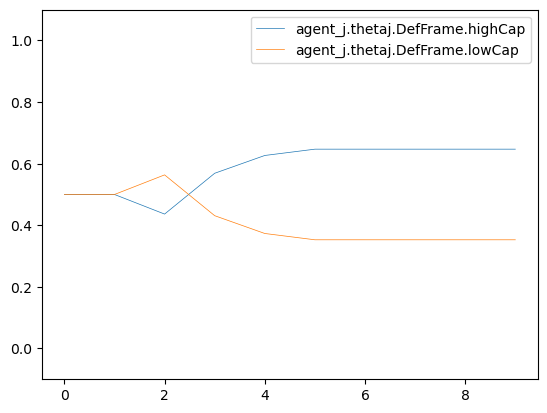

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action  agent_j.action
0                 1.0                  0.0            Nop       FileRecon
1                 1.0                  0.0            Nop    EnumAccounts
2                 1.0                  0.0   DecoyAccount    EnumAccounts
3                 1.0                  0.0            Nop      PrivEscAcc
4                 1.0                  0.0            Nop       FileRecon
5                 0.0                  1.0            Nop  ManipulateData
6                 0.0                  1.0            Nop            Exit
7                 0.0                  1.0            Nop             Nop
8                 0.0                  1.0            Nop             Nop
9                 0.0                  1.0            Nop             Nop

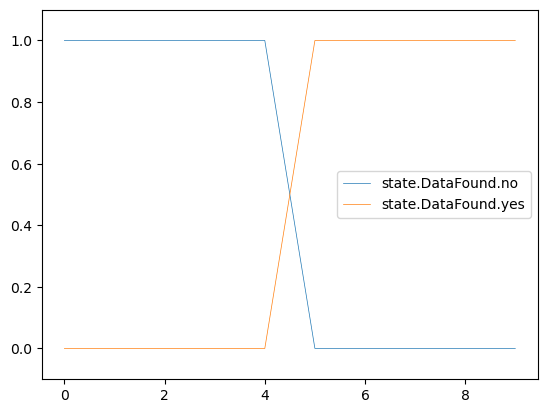

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action  agent_j.action  \
0              1.000000               0.000000            Nop       FileRecon   
1              1.000000               0.000000            Nop    EnumAccounts   
2              1.000000               0.000000   DecoyAccount    EnumAccounts   
3              1.000000               0.000000            Nop      PrivEscAcc   
4              1.000000               0.000000            Nop       FileRecon   
5              0.344855               0.655145            Nop  ManipulateData   
6              0.075559               0.924441            Nop            Exit   
7              0.019966               0.980034            Nop             Nop   
8              0.018007               0.981993            Nop             Nop   
9              0.017994               0.982006            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                   login_activity  
1                       file_write  
2                        file_enum  
3                   login_activity  
4                        file_enum  
5                       file_write  
6                             none  
7                             none  
8                             none  
9                             none

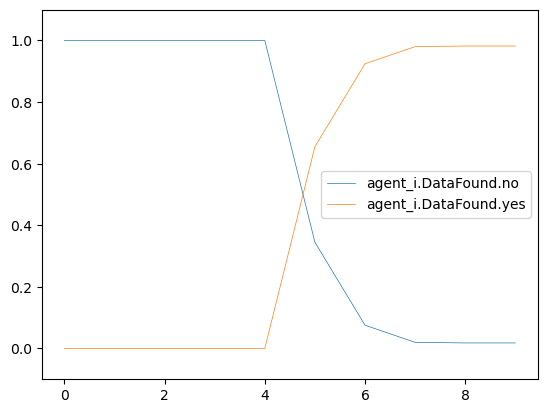

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action agent_i.action  \
0              1.000000               0.000000       FileRecon            Nop   
1              0.976974               0.023026    EnumAccounts            Nop   
2              0.976974               0.023026    EnumAccounts   DecoyAccount   
3              0.976974               0.023026      PrivEscAcc            Nop   
4              0.976974               0.023026       FileRecon            Nop   
5              0.211912               0.788088  ManipulateData            Nop   
6              0.000269               0.999731            Exit            Nop   
7              0.000269               0.999731             Nop            Nop   
8              0.000269               0.999731             Nop            Nop   
9              0.000269               0.999731             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                   user_files                           failure  
2                         none                           success  
3                         none                           success  
4                         none                           success  
5                   user_files                           success  
6                         none                           failure  
7                   user_files                           failure  
8                   user_files                           success  
9                         none                           success

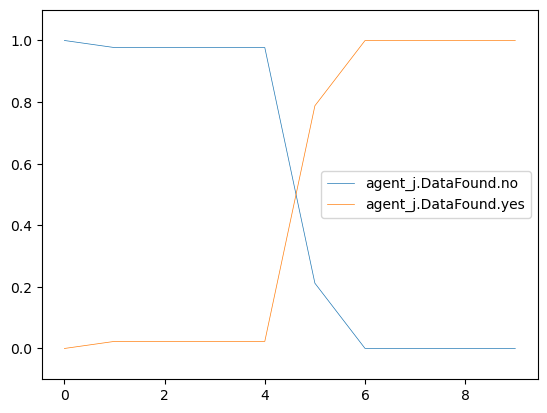

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action  \
0                    1.0                     0.0            Nop   
1                    1.0                     0.0            Nop   
2                    1.0                     0.0   DecoyAccount   
3                    1.0                     0.0            Nop   
4                    1.0                     0.0            Nop   
5                    1.0                     0.0            Nop   
6                    0.0                     1.0            Nop   
7                    0.0                     1.0            Nop   
8                    0.0                     1.0            Nop   
9                    0.0                     1.0            Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2    EnumAccounts  
3      PrivEscAcc  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

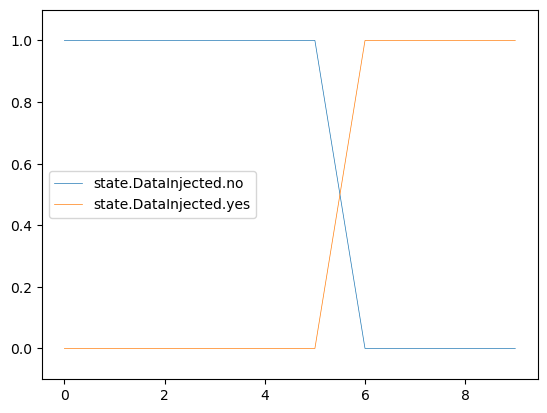

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                 1.000000                  0.000000            Nop   
1                 1.000000                  0.000000            Nop   
2                 1.000000                  0.000000   DecoyAccount   
3                 1.000000                  0.000000            Nop   
4                 1.000000                  0.000000            Nop   
5                 1.000000                  0.000000            Nop   
6                 0.127364                  0.872636            Nop   
7                 0.027202                  0.972798            Nop   
8                 0.018522                  0.981478            Nop   
9                 0.018271                  0.981729            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                   login_activity  
1    EnumAccounts                       file_write  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                   login_activity  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

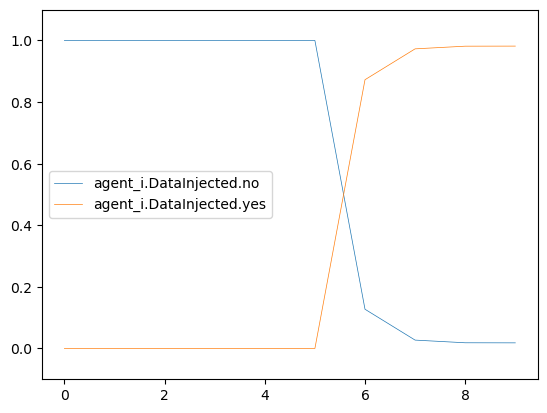

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000    EnumAccounts   
2                 1.000000                  0.000000    EnumAccounts   
3                 1.000000                  0.000000      PrivEscAcc   
4                 1.000000                  0.000000       FileRecon   
5                 1.000000                  0.000000  ManipulateData   
6                 0.000269                  0.999731            Exit   
7                 0.000269                  0.999731             Nop   
8                 0.000269                  0.999731             Nop   
9                 0.000269                  0.999731             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                   user_files   
2   DecoyAccount                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           success  
3                           success  
4                           success  
5                           success  
6                           failure  
7                           failure  
8                           success  
9                           success

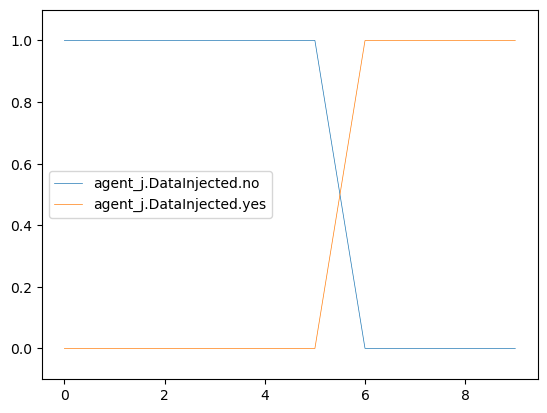

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0            Nop   
1                     0.0                     1.0            Nop   
2                     0.0                     1.0   DecoyAccount   
3                     0.0                     1.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2    EnumAccounts  
3      PrivEscAcc  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

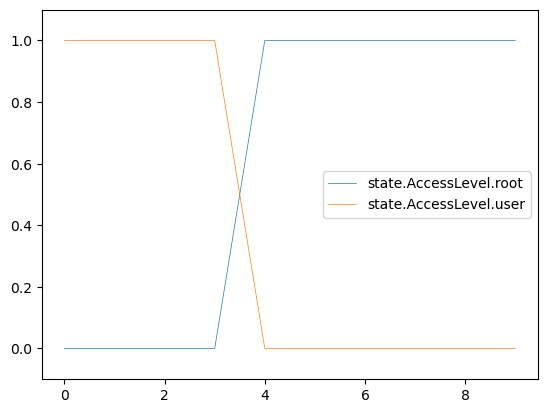

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                  0.000000                  1.000000            Nop   
1                  0.000000                  1.000000            Nop   
2                  0.000000                  1.000000   DecoyAccount   
3                  0.000000                  1.000000            Nop   
4                  0.873763                  0.126237            Nop   
5                  0.940005                  0.059995            Nop   
6                  0.984035                  0.015965            Nop   
7                  0.983213                  0.016787            Nop   
8                  0.983098                  0.016902            Nop   
9                  0.983094                  0.016906            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                   login_activity  
1    EnumAccounts                       file_write  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                   login_activity  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

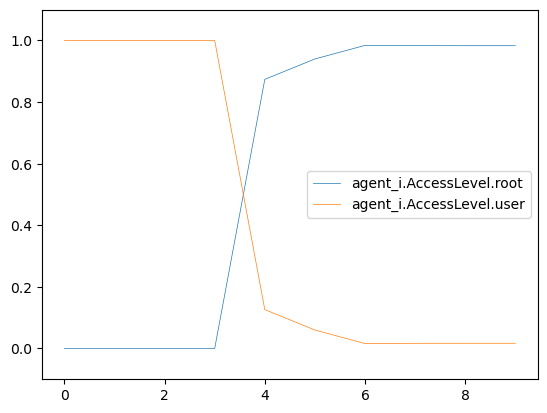

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000                  1.000000       FileRecon   
1                  0.000000                  1.000000    EnumAccounts   
2                  0.000000                  1.000000    EnumAccounts   
3                  0.000000                  1.000000      PrivEscAcc   
4                  0.999770                  0.000230       FileRecon   
5                  0.999901                  0.000099  ManipulateData   
6                  0.999943                  0.000057            Exit   
7                  0.999943                  0.000057             Nop   
8                  0.999943                  0.000057             Nop   
9                  0.999943                  0.000057             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                   user_files   
2   DecoyAccount                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           success  
3                           success  
4                           success  
5                           success  
6                           failure  
7                           failure  
8                           success  
9                           success

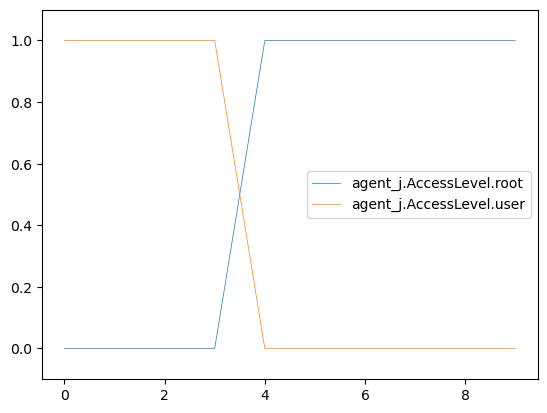

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action  agent_j.action
0                 0.0                  1.0            Nop       FileRecon
1                 0.0                  1.0            Nop    EnumAccounts
2                 0.0                  1.0   DecoyAccount    EnumAccounts
3                 0.0                  1.0            Nop      PrivEscAcc
4                 0.0                  1.0            Nop       FileRecon
5                 0.0                  1.0            Nop  ManipulateData
6                 0.0                  1.0            Nop            Exit
7                 1.0                  0.0            Nop             Nop
8                 1.0                  0.0            Nop             Nop
9                 1.0                  0.0            Nop             Nop

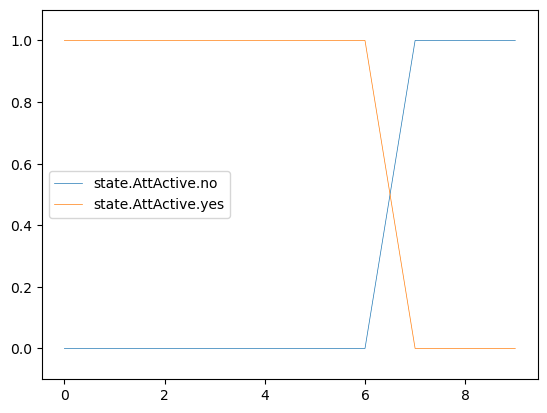

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action  agent_j.action  \
0              0.000000               1.000000            Nop       FileRecon   
1              0.000000               1.000000            Nop    EnumAccounts   
2              0.000000               1.000000   DecoyAccount    EnumAccounts   
3              0.000066               0.999934            Nop      PrivEscAcc   
4              0.002729               0.997271            Nop       FileRecon   
5              0.005787               0.994213            Nop  ManipulateData   
6              0.008232               0.991768            Nop            Exit   
7              0.982120               0.017880            Nop             Nop   
8              0.998653               0.001347            Nop             Nop   
9              0.999963               0.000037            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                   login_activity  
1                       file_write  
2                        file_enum  
3                   login_activity  
4                        file_enum  
5                       file_write  
6                             none  
7                             none  
8                             none  
9                             none

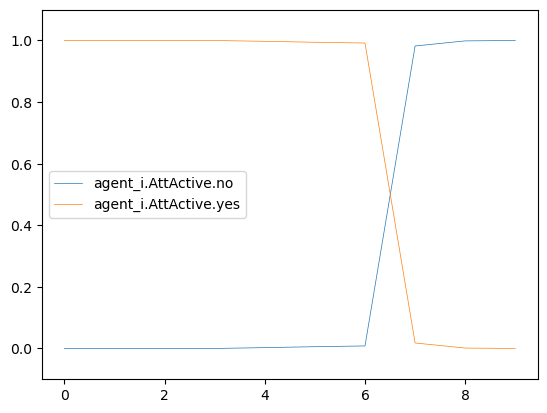

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action agent_i.action  \
0                   0.0                    1.0       FileRecon            Nop   
1                   0.0                    1.0    EnumAccounts            Nop   
2                   0.0                    1.0    EnumAccounts   DecoyAccount   
3                   0.0                    1.0      PrivEscAcc            Nop   
4                   0.0                    1.0       FileRecon            Nop   
5                   0.0                    1.0  ManipulateData            Nop   
6                   0.0                    1.0            Exit            Nop   
7                   1.0                    0.0             Nop            Nop   
8                   1.0                    0.0             Nop            Nop   
9                   1.0                    0.0             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                   user_files                           failure  
2                         none                           success  
3                         none                           success  
4                         none                           success  
5                   user_files                           success  
6                         none                           failure  
7                   user_files                           failure  
8                   user_files                           success  
9                         none                           success

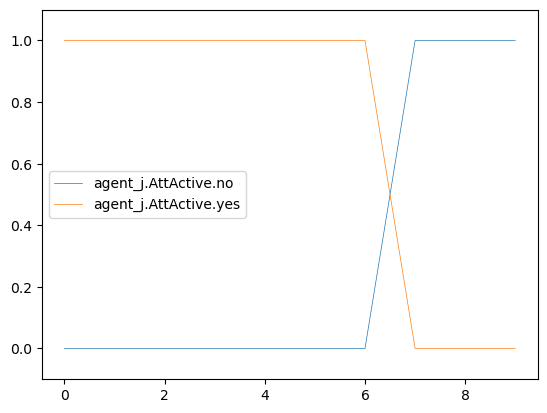

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action  agent_j.action  
0                      1.0            Nop       FileRecon  
1                      1.0            Nop    EnumAccounts  
2                      1.0   DecoyAccount    EnumAccounts  
3                      1.0            Nop      PrivEscAcc  
4                      1.0            Nop       FileRecon  
5                      1.0            Nop  ManipulateData  
6                      1.0            Nop            Exit  
7                      1.0            Nop             Nop  
8                      1.0            Nop             Nop  
9                      1.0            Nop             Nop

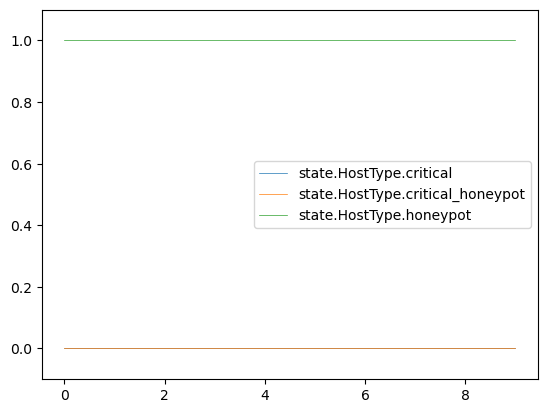

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot agent_i.action  agent_j.action  \
0                        1.0            Nop       FileRecon   
1                        1.0            Nop    EnumAccounts   
2                        1.0   DecoyAccount    EnumAccounts   
3                        1.0            Nop      PrivEscAcc   
4                        1.0            Nop       FileRecon   
5                        1.0            Nop  ManipulateData   
6                        1.0            Nop            Exit   
7                        1.0            Nop             Nop   
8                        1.0            Nop             Nop   
9                        1.0            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                   login_activity  
1                       file_write  
2                        file_enum  
3                   login_activity  
4                        file_enum  
5                       file_write  
6                             none  
7                             none  
8                             none  
9                             none

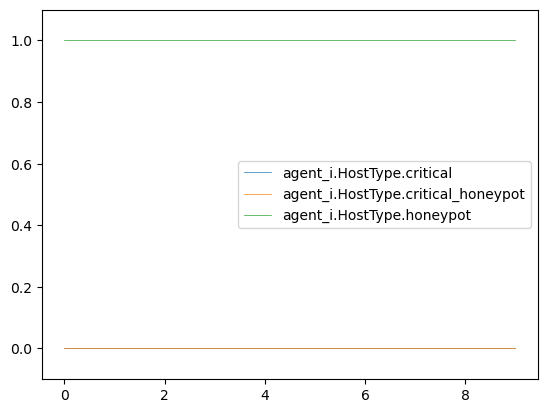

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                   0.500000                                 0.0   
1                   0.300000                                 0.0   
2                   0.563636                                 0.0   
3                   0.258669                                 0.0   
4                   0.216178                                 0.0   
5                   0.105691                                 0.0   
6                   0.105685                                 0.0   
7                   0.105685                                 0.0   
8                   0.105685                                 0.0   
9                   0.105685                                 0.0   

   agent_j.HostType.honeypot  agent_j.action agent_i.action  \
0                   0.500000       FileRecon            Nop   
1                   0.700000    EnumAccounts            Nop   
2                   0.436364    EnumAccounts   DecoyAccount   
3                   0.741331      PrivEscAcc            Nop   
4                   0.783822       FileRecon            Nop   
5                   0.894309  ManipulateData            Nop   
6                   0.894315            Exit            Nop   
7                   0.894315             Nop            Nop   
8                   0.894315             Nop            Nop   
9                   0.894315             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                   user_files                           failure  
2                         none                           success  
3                         none                           success  
4                         none                           success  
5                   user_files                           success  
6                         none                           failure  
7                   user_files                           failure  
8                   user_files                           success  
9                         none                           success

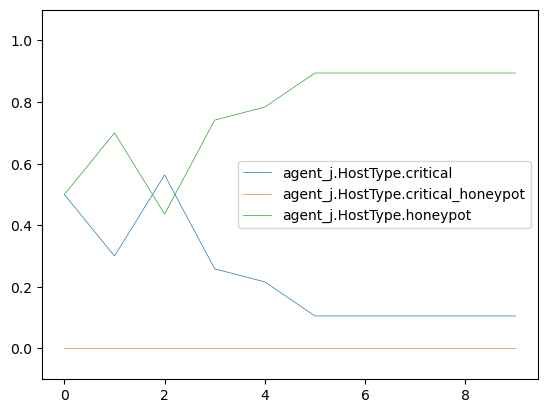

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action  agent_j.action
0                1.0                 0.0            Nop       FileRecon
1                1.0                 0.0            Nop    EnumAccounts
2                1.0                 0.0   DecoyAccount    EnumAccounts
3                0.0                 1.0            Nop      PrivEscAcc
4                0.0                 1.0            Nop       FileRecon
5                0.0                 1.0            Nop  ManipulateData
6                0.0                 1.0            Nop            Exit
7                0.0                 1.0            Nop             Nop
8                0.0                 1.0            Nop             Nop
9                0.0                 1.0            Nop             Nop

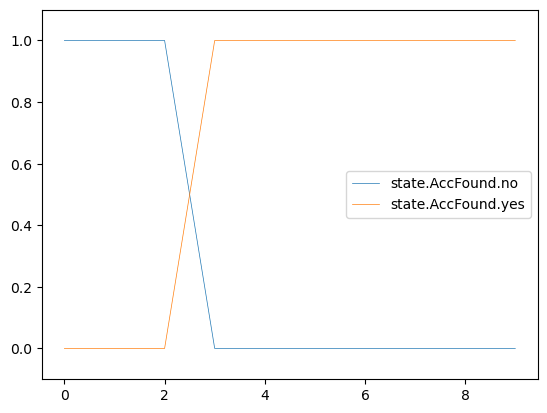

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action  agent_j.action  \
0             1.000000              0.000000            Nop       FileRecon   
1             1.000000              0.000000            Nop    EnumAccounts   
2             1.000000              0.000000   DecoyAccount    EnumAccounts   
3             0.339481              0.660519            Nop      PrivEscAcc   
4             0.090736              0.909265            Nop       FileRecon   
5             0.047345              0.952655            Nop  ManipulateData   
6             0.014157              0.985843            Nop            Exit   
7             0.015299              0.984701            Nop             Nop   
8             0.015420              0.984580            Nop             Nop   
9             0.015423              0.984577            Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                   login_activity  
1                       file_write  
2                        file_enum  
3                   login_activity  
4                        file_enum  
5                       file_write  
6                             none  
7                             none  
8                             none  
9                             none

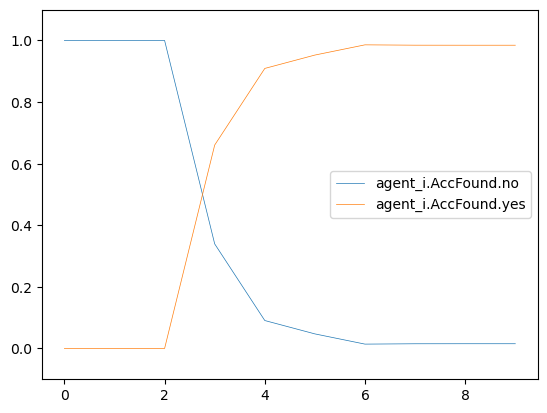

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action agent_i.action  \
0             1.000000              0.000000       FileRecon            Nop   
1             1.000000              0.000000    EnumAccounts            Nop   
2             0.920455              0.079545    EnumAccounts   DecoyAccount   
3             0.180764              0.819236      PrivEscAcc            Nop   
4             0.000223              0.999778       FileRecon            Nop   
5             0.000097              0.999903  ManipulateData            Nop   
6             0.000056              0.999944            Exit            Nop   
7             0.000056              0.999944             Nop            Nop   
8             0.000056              0.999944             Nop            Nop   
9             0.000056              0.999944             Nop            Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  
0                         none                           failure  
1                   user_files                           failure  
2                         none                           success  
3                         none                           success  
4                         none                           success  
5                   user_files                           success  
6                         none                           failure  
7                   user_files                           failure  
8                   user_files                           success  
9                         none                           success

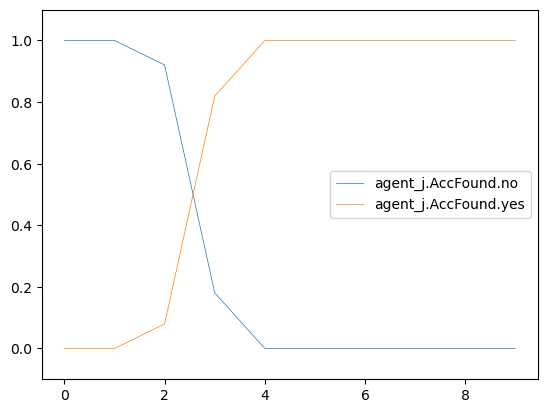

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action  agent_j.action
0                   1.0                    0.0            Nop       FileRecon
1                   1.0                    0.0            Nop    EnumAccounts
2                   1.0                    0.0   DecoyAccount    EnumAccounts
3                   0.0                    1.0            Nop      PrivEscAcc
4                   0.0                    1.0            Nop       FileRecon
5                   0.0                    1.0            Nop  ManipulateData
6                   0.0                    1.0            Nop            Exit
7                   0.0                    1.0            Nop             Nop
8                   0.0                    1.0            Nop             Nop
9                   0.0                    1.0            Nop             Nop

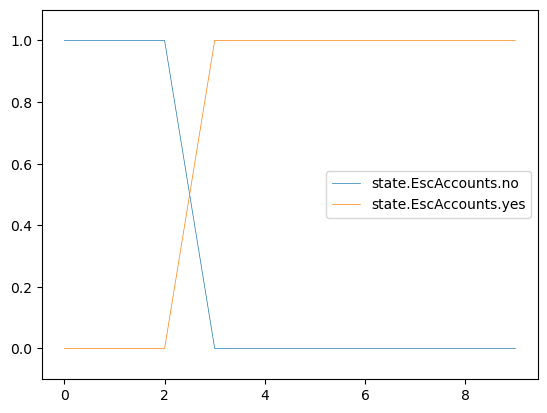

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                     1.0                      0.0            Nop   
1                     1.0                      0.0            Nop   
2                     1.0                      0.0   DecoyAccount   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                   login_activity  
1    EnumAccounts                       file_write  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                   login_activity  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

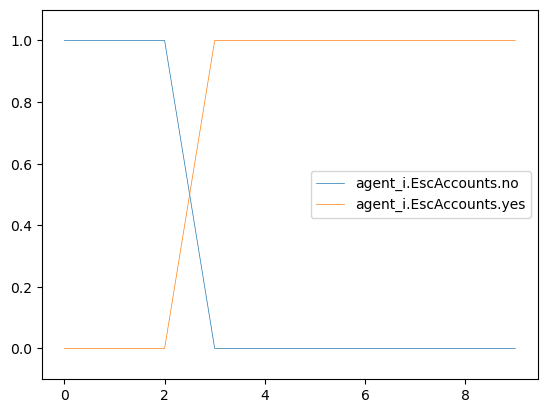

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.500000                 0.500000    EnumAccounts   
2                0.613636                 0.386364    EnumAccounts   
3                0.152296                 0.847704      PrivEscAcc   
4                0.000188                 0.999813       FileRecon   
5                0.000079                 0.999921  ManipulateData   
6                0.000046                 0.999954            Exit   
7                0.000046                 0.999954             Nop   
8                0.000046                 0.999954             Nop   
9                0.000046                 0.999954             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                   user_files   
2   DecoyAccount                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           success  
3                           success  
4                           success  
5                           success  
6                           failure  
7                           failure  
8                           success  
9                           success

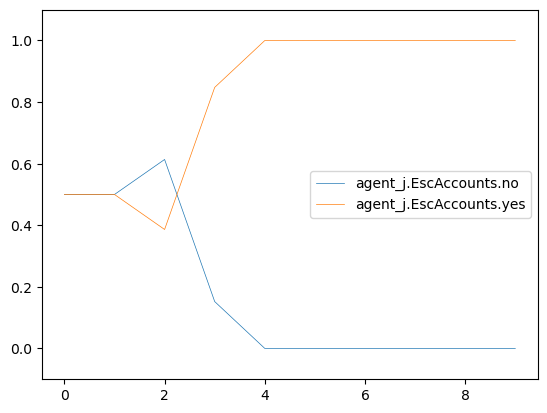

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action  agent_j.action
0                   1.0                   0.0            Nop       FileRecon
1                   1.0                   0.0            Nop    EnumAccounts
2                   1.0                   0.0   DecoyAccount    EnumAccounts
3                   1.0                   0.0            Nop      PrivEscAcc
4                   1.0                   0.0            Nop       FileRecon
5                   1.0                   0.0            Nop  ManipulateData
6                   1.0                   0.0            Nop            Exit
7                   1.0                   0.0            Nop             Nop
8                   1.0                   0.0            Nop             Nop
9                   1.0                   0.0            Nop             Nop

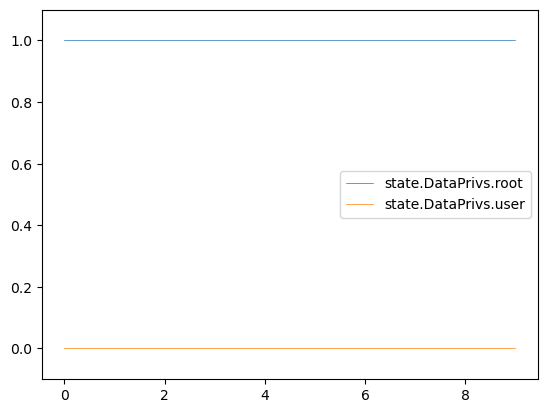

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                     1.0                     0.0            Nop   
1                     1.0                     0.0            Nop   
2                     1.0                     0.0   DecoyAccount   
3                     1.0                     0.0            Nop   
4                     1.0                     0.0            Nop   
5                     1.0                     0.0            Nop   
6                     1.0                     0.0            Nop   
7                     1.0                     0.0            Nop   
8                     1.0                     0.0            Nop   
9                     1.0                     0.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                   login_activity  
1    EnumAccounts                       file_write  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                   login_activity  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

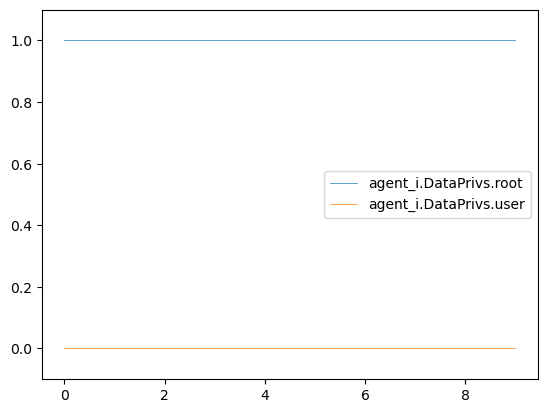

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000       FileRecon   
1                0.592105                0.407895    EnumAccounts   
2                0.592105                0.407895    EnumAccounts   
3                0.592105                0.407895      PrivEscAcc   
4                0.592105                0.407895       FileRecon   
5                0.673727                0.326273  ManipulateData   
6                0.708577                0.291424            Exit   
7                0.708577                0.291423             Nop   
8                0.708577                0.291423             Nop   
9                0.708577                0.291423             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                   user_files   
2   DecoyAccount                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           success  
3                           success  
4                           success  
5                           success  
6                           failure  
7                           failure  
8                           success  
9                           success

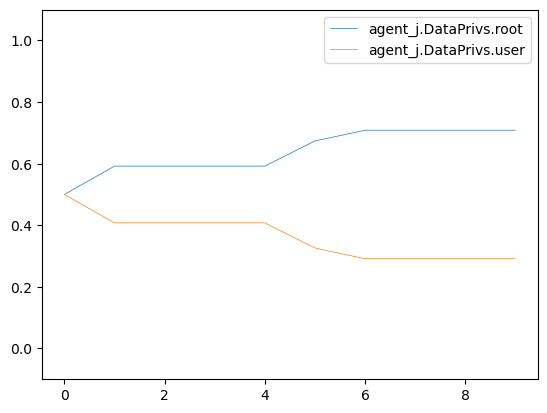

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action  agent_j.action
0                   0.0                    1.0            Nop       FileRecon
1                   0.0                    1.0            Nop    EnumAccounts
2                   0.0                    1.0   DecoyAccount    EnumAccounts
3                   0.0                    1.0            Nop      PrivEscAcc
4                   0.0                    1.0            Nop       FileRecon
5                   0.0                    1.0            Nop  ManipulateData
6                   0.0                    1.0            Nop            Exit
7                   0.0                    1.0            Nop             Nop
8                   0.0                    1.0            Nop             Nop
9                   0.0                    1.0            Nop             Nop

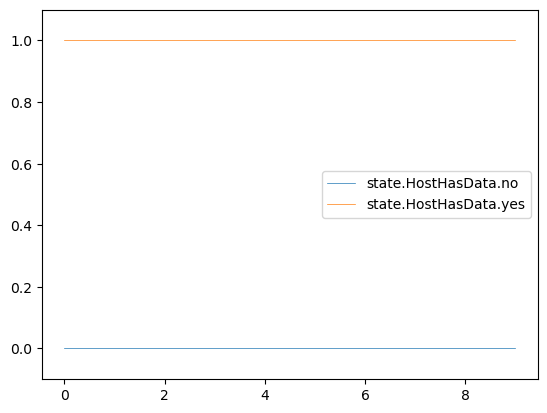

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.0                      1.0            Nop   
1                     0.0                      1.0            Nop   
2                     0.0                      1.0   DecoyAccount   
3                     0.0                      1.0            Nop   
4                     0.0                      1.0            Nop   
5                     0.0                      1.0            Nop   
6                     0.0                      1.0            Nop   
7                     0.0                      1.0            Nop   
8                     0.0                      1.0            Nop   
9                     0.0                      1.0            Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                   login_activity  
1    EnumAccounts                       file_write  
2    EnumAccounts                        file_enum  
3      PrivEscAcc                   login_activity  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

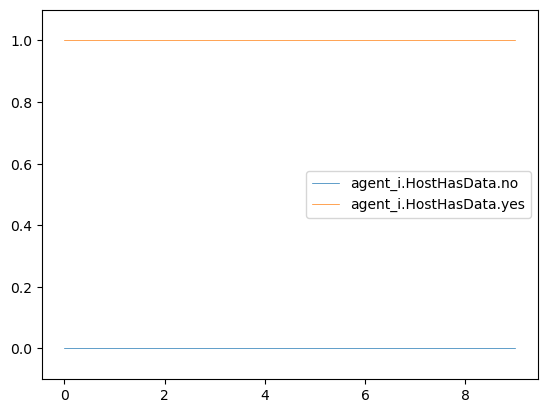

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.592105                 0.407895    EnumAccounts   
2                0.592105                 0.407895    EnumAccounts   
3                0.592105                 0.407895      PrivEscAcc   
4                0.592105                 0.407895       FileRecon   
5                0.177322                 0.822678  ManipulateData   
6                0.000225                 0.999775            Exit   
7                0.000225                 0.999775             Nop   
8                0.000225                 0.999775             Nop   
9                0.000225                 0.999775             Nop   

  agent_i.action agent_j.observation.HostObs'  \
0            Nop                         none   
1            Nop                   user_files   
2   DecoyAccount                         none   
3            Nop                         none   
4            Nop                         none   
5            Nop                   user_files   
6            Nop                         none   
7            Nop                   user_files   
8            Nop                   user_files   
9            Nop                         none   

  agent_j.observation.ActionResult'  
0                           failure  
1                           failure  
2                           success  
3                           success  
4                           success  
5                           success  
6                           failure  
7                           failure  
8                           success  
9                           success

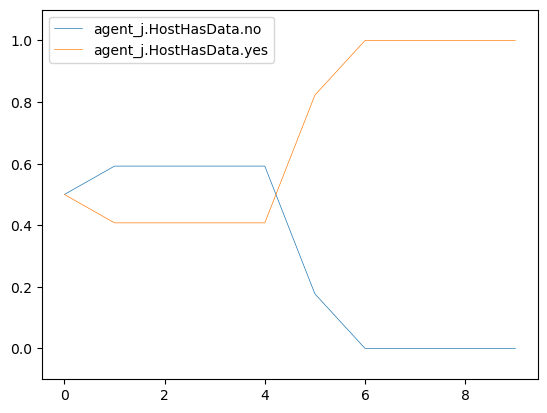

+++++++++++++++++++ End Interaction +++++++++++++++++++


In [7]:
# Get belief over opponent frames
def get_opponent_frame(dataframe):
    
    thetaj_columns = list(filter(lambda x: "thetaj" in x.split("."), dataframe))
    
    if len(thetaj_columns) > 0:
        return dataframe[thetaj_columns]
    
    else:
        return None

# Print and plot P(Theta_j)
def print_thetaj_belief(belief_thetaj_df, obs):
    df = pandas.concat([belief_thetaj_df, obs], axis=1)
    display(df)
    df.plot(linewidth=0.5)
    plotter.ylim(-0.1, 1.1)
    plotter.show()

# Summarize beliefs
def summarize_beliefs(state_vars, dataframe):
    print(f"+++++++++++++++++++ Begin Interaction +++++++++++++++++++")
    agent_i_data = filter_columns_by_agent(dataframe, "agent_i")
    agent_j_data = filter_columns_by_agent(dataframe, "agent_j")
    states = filter_columns_by_agent(dataframe, "state")
    
    actions_i = filter_columns_by_state(agent_i_data, "action")
    actions_j = filter_columns_by_state(agent_j_data, "action")
    
    obs_i = filter_columns_by_state(agent_i_data, "observation")
    obs_j = filter_columns_by_state(agent_j_data, "observation")
    
    i_belief_thetaj = get_opponent_frame(agent_i_data)
    if i_belief_thetaj is not None:
        print_thetaj_belief(i_belief_thetaj, obs_i)
    
    j_belief_thetaj = get_opponent_frame(agent_j_data)
    if j_belief_thetaj is not None:
        print_thetaj_belief(j_belief_thetaj, obs_j)
    
    for var in state_vars:
        print(f"============={var}============")
        # show state
        state_values = filter_columns_by_state(states, var)
        state_values = pandas.concat([state_values, actions_i, actions_j], axis = 1)
        display(state_values)
        state_values.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        
        # show agent i
        agent_i_beliefs = filter_columns_by_state(agent_i_data, var)
        agent_i_beliefs = pandas.concat([agent_i_beliefs, actions_i, actions_j, obs_i], axis = 1)
        display(agent_i_beliefs)
        agent_i_beliefs.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        
        # show agent j
        agent_j_beliefs = filter_columns_by_state(agent_j_data, var)
        agent_j_beliefs = pandas.concat([agent_j_beliefs, actions_j, actions_i, obs_j], axis = 1)
        display(agent_j_beliefs)
        agent_j_beliefs.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        print("==============================")
    
    print(f"+++++++++++++++++++ End Interaction +++++++++++++++++++")

# Use state data to figure out the state variables
def get_state_vars(columns):
    
    states = filter(lambda x: "state" in x.split(".") and len(x.split(".")) >= 2, columns)
    state_vars = map(lambda x: x.split(".")[1], states)
    
    return list(set(state_vars))

# Fetch dataframe with columns belonging to a particular agent
def filter_columns_by_agent(dataframe, name):
    columns = dataframe.columns
    filtered_columns = list(filter(lambda x: name in x.split("."), columns))
    
    df = dataframe[filtered_columns]
    return df

# Get columns containing the state name in the header
def filter_columns_by_state(dataframe, state):
    filtered_columns = list(filter(lambda x: state in x.split("."), dataframe.columns))
    return dataframe[filtered_columns]

# Main loop to summarize all traces
for trace in TRACE_FILES:
    data = load_json(trace)
    
    dataframe = pandas.json_normalize(data)    
    state_vars = get_state_vars(dataframe.columns)
    
    summarize_beliefs(state_vars, dataframe)

    